**CONSIGNA**
1. Dada la foto Will(Original).bmp que llevó Joyce a la estación de policía y la lista de fotos obtenidas por el sistema de búsqueda, implementar un algoritmo que permita ordenar la lista según su parecido con la foto de Will que entregó Joyce, utilizando el factor de correlación como medida de similitud. Analizar los resultados obtenidos.


En el siguiente fragmeto se cargan las imagenes de Will (original y a comparar)

In [1]:
import os
filenames = os.listdir("img")
filenames.sort()
print(filenames)

['Will(Original).bmp', 'Will_1.bmp', 'Will_2.bmp', 'Will_3.bmp', 'Will_4.bmp', 'Will_5.bmp', 'Will_Canal10.bmp', 'Will_Canal2.bmp', 'Will_Canal8.bmp', 'Will_ej2.bmp']


In [2]:
import math

def media(imagen, cuadrada=False):
    largo = len(imagen)
    ancho = len(imagen[0])
    suma = 0

    for x in range(largo):
        for y in range(ancho):
            if cuadrada:
                suma += int(imagen[x][y]) * int(imagen[x][y])
            else:
                suma += int(imagen[x][y])

    return float(suma)/(largo*ancho)

In [3]:
def desvio(imagen, media_imagen):
    """
    desvio = sqrt(<x2> - <x>2)
    """
    media_cuadrada_imagen = media(imagen,True)
    varianza = media_cuadrada_imagen - (media_imagen*media_imagen)
    desvio = math.sqrt(varianza)
    return desvio

In [4]:
def correlacion_cruzada(imagen_a,imagen_b):
    if(len(imagen_a)!= len(imagen_b) or len(imagen_a[0]) != len(imagen_b[0])):
        return

    suma_ambos = 0
    largo = len(imagen_a)
    ancho = len(imagen_a[0])
    for x in range(largo):
        for y in range(ancho):
            suma_ambos += int(imagen_a[x][y]) * int(imagen_b[x][y])

    return  float(suma_ambos)/(largo*ancho)

In [5]:
def factor_correlacion_cruzada(imagen_a,imagen_b):
    media_a = media(imagen_a)
    media_b = media(imagen_b)
    desvio_a = desvio(imagen_a, media_a)
    desvio_b = desvio(imagen_b, media_b)
    correlacion_cruzada_ambas = correlacion_cruzada(imagen_a,imagen_b)

    return round((float(correlacion_cruzada_ambas - (media_a*media_b))) / (desvio_a*desvio_b) , 5)

In [6]:
import os
import imageio

will_original = imageio.imread(os.path.join("img",filenames[0]))
will_fotos_busqueda = []
for i in range(1,6):
  #En la segunda posicion se guarda el factor de correlacion cruzada para posteriormente ordenarlo
  will_fotos_busqueda.append( imageio.imread(os.path.join("img",filenames[i])))  

will_policia = imageio.imread(os.path.join("img",filenames[-1]))

In [7]:
import numpy as np

resultados = []
i = 1
for imagen in will_fotos_busqueda:
    print("Procesado imagen " + str(i) + " ...")
    corr = factor_correlacion_cruzada(will_original,imagen)
    resultados.append(("Imagen " + str(i), corr,imagen))
    i += 1


Procesado imagen 1 ...
Procesado imagen 2 ...
Procesado imagen 3 ...
Procesado imagen 4 ...
Procesado imagen 5 ...


In [8]:
# ordenar los resultados
resultados.sort(key=lambda x: x[1], reverse=True)
for r in resultados:
    print(r[0])

Imagen 1
Imagen 2
Imagen 3
Imagen 5
Imagen 4


Populating the interactive namespace from numpy and matplotlib


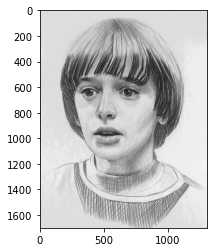

In [9]:
%pylab inline
import matplotlib.pyplot as plt
imgplot = plt.imshow(will_original,cmap='gray',vmin=0,vmax=255)
plt.show()

2- Un policía amigo de Joyce llegó a la estación de policía un rato más tarde, trayendo consigo otra foto para analizarla. El policía de guardia, para ahorrarse la búsqueda en el SIDPE, propuso estudiar las similitudes respecto a la imagen que llevó Joyce mediante esta estrategia a implementar: Obtener la distribución de intensidades de la imagen de la foto que llevó Joyce, de la foto del niño más parecido (obtenida por el sistema de búsqueda) y de la foto que tenía el policía en su billetera. Generar el histograma de cada imagen y calcular la media y el desvío de cada distribución. Analizar las similitudes y diferencias entre uno y otro indicador.

In [10]:
def distribucion_intensidad(imagen):
    #posible mejora, en ves de usar un arreglo usar otra estructura
    #como un mapa o algo asi porque hay muchos valores de intesidad 
    #que no se usan
    dist = {} #esto nose si se hace asi -> joya
    largo = len(imagen)
    ancho = len(imagen[0])
    for x in range(largo):
        for y in range(ancho):
            valor = (int)(imagen[x][y])
            if valor in dist:
                dist[valor] += 1
            else:
                dist[valor] = 1
    for key in dist:
        dist[key]=dist[key]/(largo*ancho)
    return dist


distribucion_original = distribucion_intensidad(will_original)
distribucion_parecida = distribucion_intensidad(will_fotos_busqueda[0])
distribucion_policia = distribucion_intensidad(will_policia)

print(distribucion_original)
print(distribucion_parecida)
print(distribucion_policia)

{221: 0.360416255051639, 238: 0.19880422092501124, 204: 0.08321239335428827, 187: 0.05222900763358779, 170: 0.048701841041760216, 153: 0.04666771441400988, 136: 0.04238796587337225, 119: 0.03527929950606197, 255: 0.008626852267624607, 102: 0.029128423888639426, 85: 0.025297709923664122, 68: 0.025161652447238437, 51: 0.02414683430624158, 34: 0.015194881005837449, 17: 0.004271216883700045, 0: 0.00047373147732375395}
{221: 0.4157265379434216, 238: 0.19262191288729233, 204: 0.07130848675348002, 187: 0.04102649303996408, 170: 0.041006286484059275, 153: 0.04099775482712169, 136: 0.03805253704535249, 119: 0.03213920071845532, 102: 0.0272240682532555, 255: 0.007630893578805568, 85: 0.024198473282442748, 68: 0.024454422990570275, 51: 0.023817691962281097, 34: 0.015106870229007634, 17: 0.004220925011225864, 0: 0.00046744499326448137}
{255: 0.4824301751234845, 221: 0.0699272563987427, 187: 0.06918679838347552, 170: 0.050990121239335426, 153: 0.04777503367759318, 238: 0.024907049842837897, 136: 0.

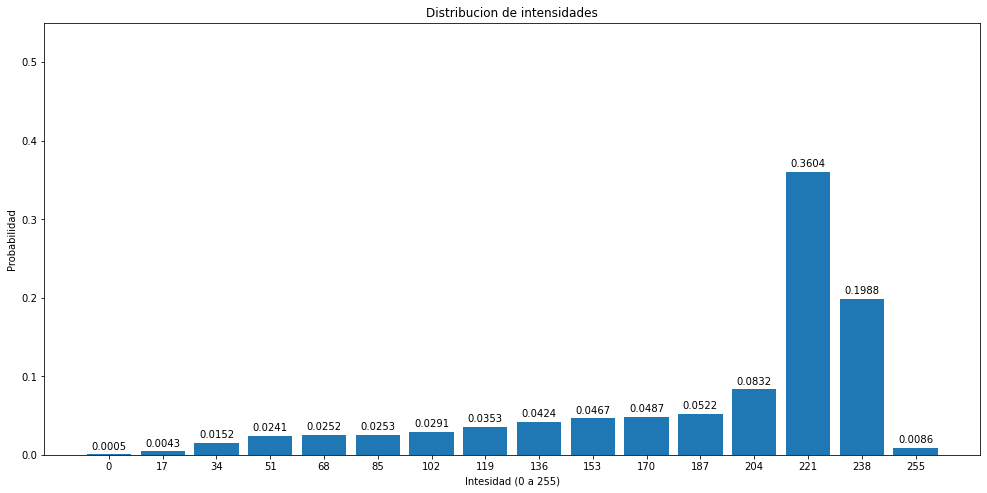

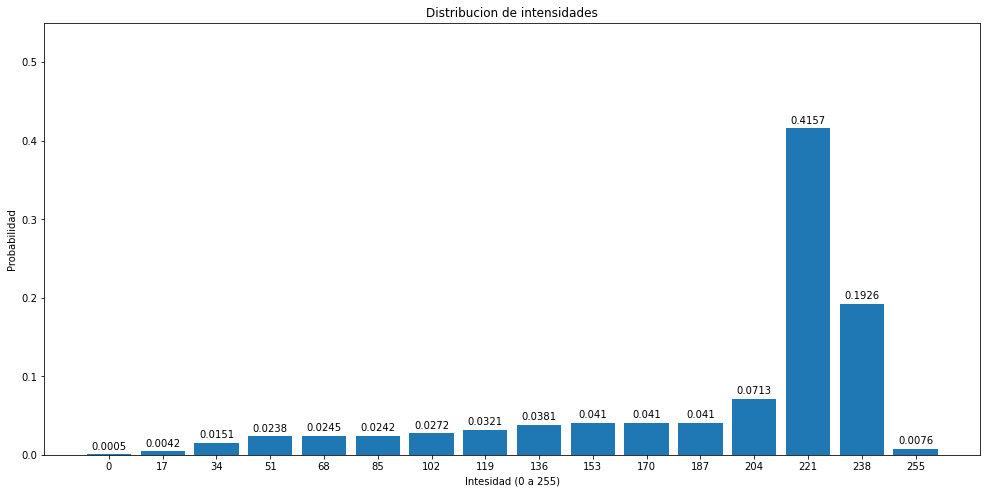

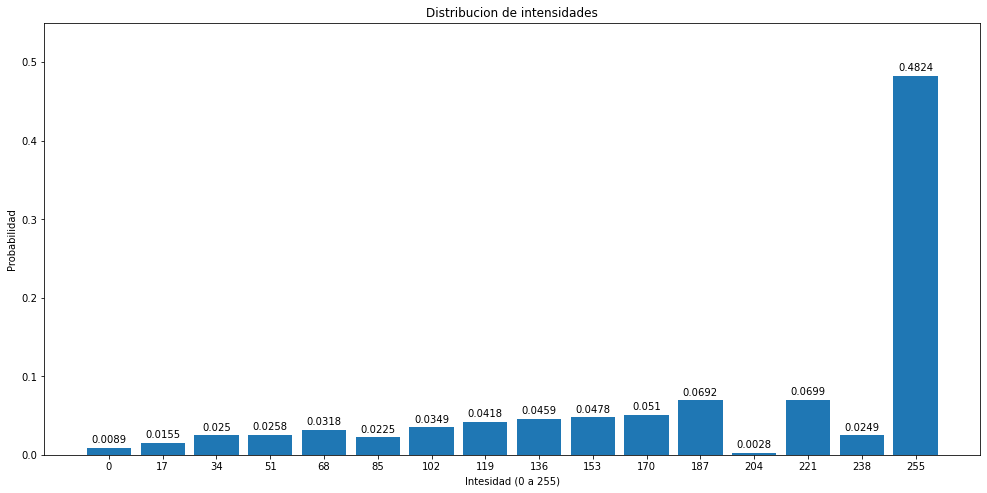

In [11]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (13,6)

# Funcion para poner el label arriba de cada barrita
def autolabel(rects,ejes):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round((float)(rect.get_height()),4)
        ejes.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=10)

# funcion para generar histograma a partir de una distribucion
def generar_histograma(distribucion):
    valores = list(distribucion.values())
    intensidades = list(distribucion.keys())

    # configuracion del plotting
    figura = plt.figure()
    ejes = figura.add_axes([0,0,1,1])
    histograma = ejes.bar(intensidades,valores,width=14)
    plt.xticks(intensidades,intensidades)

    # titulos y labels
    ejes.set_title('Distribucion de intensidades')
    ejes.set_xlabel('Intesidad (0 a 255)')
    ejes.set_ylabel('Probabilidad')
    
    # escalas 
    plt.ylim(0, 0.55) #lo seteo entre 0 y 0.55 porque conozco entre que valores se mueven los histogramas
    plt.autoscale(False)

    # generar autolabels
    autolabel(histograma,ejes)

    # Mostrar el grafico
    plt.show()

generar_histograma(distribucion_original)
generar_histograma(distribucion_parecida)
generar_histograma(distribucion_policia)


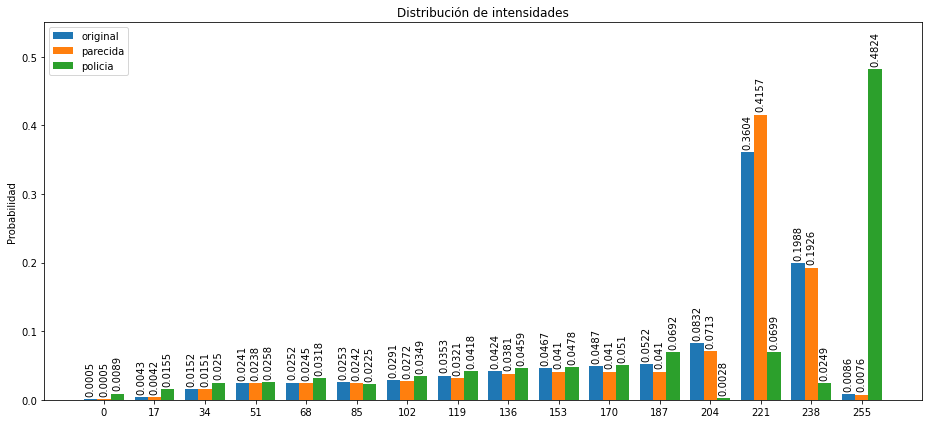

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

def autolabel(rects,ax):
    for rect in rects:
      height = round((float)(rect.get_height()),4)
      ax.annotate('{}'.format(height),
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom',fontsize=10,rotation=90)
        
def histogram_multiple(distribucion1,label1,distribucion2,label2,distribucion3,label3):
    
    #ordenamos los diccionarios por clave (intensidades)
    d1 = OrderedDict(sorted(distribucion1.items()))
    d2 = OrderedDict(sorted(distribucion2.items()))
    d3 = OrderedDict(sorted(distribucion3.items()))
    b = OrderedDict(sorted(distribucion_original.items()))

    #obtenemos las intensidades a partir de cualquier diccionario
    intensidades = list(d1.keys())
    
    #obtenemos los valores
    d1_valores = list(d1.values())
    d2_valores = list(d2.values())
    d3_valores = list(d3.values())


    ind = np.arange(len(intensidades))  # the x locations for the groups
    width = 0.525  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar((ind - width/2)*2, d1_valores, width,
                    label=label1)
    rects2 = ax.bar((ind)*2, d2_valores, width,
                    label=label2)
    rects3 = ax.bar((ind + width/2)*2, d3_valores, width,
                    label=label3)
    # escalas 
    plt.ylim(0, 0.55) #lo seteo entre 0 y 0.55 porque conozco entre que valores se mueven los histogramas

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Probabilidad')
    ax.set_title('Distribución de intensidades')
    ax.set_xticks(ind*2)
    ax.set_xticklabels(intensidades)
    ax.legend()
    
    autolabel(rects1,ax)
    autolabel(rects2,ax)
    autolabel(rects3,ax)

    fig.tight_layout()

    plt.show()
    
histogram_multiple(distribucion_original,'original',distribucion_parecida,'parecida',distribucion_policia,'policia')

In [13]:
import math

def media_dist(dist, cuadrada=False):
    suma = 0.0
    for x in dist:
        if(cuadrada):
            suma += x*x*dist[x]
        else:
            suma += x*dist[x]
    return float(suma)

def desvio_dist(dist, media_distribucion):
    media_cuadrada_dist = media_dist(dist,True)
    varianza = media_cuadrada_dist - (media_distribucion*media_distribucion)
    return math.sqrt(varianza)

distribuciones = [(distribucion_original,"Dist original"), (distribucion_parecida,"Dist parecida"), (distribucion_policia,"Dist policia")]
for dist, nombre in distribuciones:
    media_distribucion = media_dist(dist)
    desvio_distribucion = desvio_dist(dist, media_distribucion)
    print(nombre)
    print(media_distribucion)
    print(desvio_distribucion)
    print("************")
    

Dist original
189.9449923664122
55.70177307571604
************
Dist parecida
192.4244961832061
55.15561366734102
************
Dist policia
195.15137404580153
73.83400301980652
************


3. Implementar un algoritmo que permita codificar una imagen mediante el método de Huffman y posteriormente reconstruirla mediante otro algoritmo decodificador (el archivo comprimido deberá contener la secuencia de bits codificados junto con los datos necesarios para la reconstrucción de la imagen original). Con dicho algoritmo codificador:
    - a) Comprimir con Huffman semi-estático la imagen original.
    - b) Comprimir la imagen del resultado más parecido con el código de Huffman asociado a la imagen original.
    - c) Comprimir la imagen que trajo el policía con el código de Huffman asociado a la imagen original.
    - d) Comprimir la imagen que trajo el policía utilizando Huffman semi-estático, esta vez utilizando el código generado para  la propia imagen. Comparar con el resultado del inciso anterior.
    - e) Comparar las tasas de compresión obtenidas por las compresiones en los ejercicios (a), (b), (c) y (d).
Nota: el algoritmo decodificador deberá permitir reconstruir los datos generados por el codificador y obtener la imagen original.

In [14]:
class Tree:
    def __init__(self,simbolo=None, prob=None, left=None, right=None):
        self.simbolo = simbolo
        self.prob = prob
        self.left = left
        self.right = right

    def is_leaf(self):
        return (self.left is None and self.right is None) 

    #def get_leaves(self):
    #  return self.__leaves(self)

    def get_leaves(self):
        if self.is_leaf():
            return [self]
        else:
            aux = []
        if self.left is not None:
            aux += self.left.get_leaves()
        if self.right is not None:
            aux += self.right.get_leaves()
        return aux

    def __repr__(self):
        return "<%s,%s>" % (self.simbolo, self.prob)

    def __str__(self):
        return "<%s,%s>" % (self.simbolo, self.prob)

In [15]:
#Actualiza los codigos de los nodos que fusiono
def actualizar_codigos(codigos,nodo1,nodo2):
    for hoja in nodo1.get_leaves() :
        codigos[hoja.simbolo] = '0' + codigos[hoja.simbolo]
    for hoja in nodo2.get_leaves() :
        codigos[hoja.simbolo] = '1' +codigos[hoja.simbolo]

#Fusiona los dos nodos de menor prob y los elimina de los nodos
def fusionar_nodos(nodos,nodo1,nodo2):
    nodos.remove(nodo1)
    nodos.remove(nodo2)
    grupo = Tree("grupito",nodo1.prob+nodo2.prob,nodo1,nodo2)
    nodo1.parent = grupo
    nodo2.parent = grupo
    return grupo

#Genera el codigo de huffman y su arbol correspondiente
def generar_codigo_huffman(dist):
    nodos = []
    codigos = {}
    for key in dist:
        nodos.append(Tree(key,dist[key]))
        codigos[key] = ""
    while len(nodos) != 1:
        nodos = sorted(nodos, key=lambda x: x.prob)
        nodo1, nodo2 = nodos[0], nodos[1]
        grupo = fusionar_nodos(nodos,nodo1,nodo2)
        actualizar_codigos(codigos,nodo1,nodo2)
        nodos.append(grupo)
    return codigos,nodos[0]

In [16]:
codigos_will_original,arbol_will_original=generar_codigo_huffman(distribucion_original)

def print_arbol(nodo, level):
    if nodo.is_leaf():
        print("----"*level + "   => "+ str(nodo.simbolo) + " | " + str(nodo.prob))
    else:
        level = level+1
        print("----"*level + "1")
        print_arbol(nodo.left,level)
        print("----"*level + "0")
        print_arbol(nodo.right,level)
    
print_arbol(arbol_will_original,0)
print(codigos_will_original)

----1
--------1
------------1
----------------1
----------------   => 136 | 0.04238796587337225
----------------0
----------------   => 153 | 0.04666771441400988
------------0
----------------1
----------------   => 170 | 0.048701841041760216
----------------0
--------------------1
--------------------   => 51 | 0.02414683430624158
--------------------0
--------------------   => 68 | 0.025161652447238437
--------0
--------   => 238 | 0.19880422092501124
----0
--------1
------------1
----------------1
----------------   => 187 | 0.05222900763358779
----------------0
--------------------1
--------------------   => 85 | 0.025297709923664122
--------------------0
------------------------1
----------------------------1
--------------------------------1
--------------------------------   => 0 | 0.00047373147732375395
--------------------------------0
--------------------------------   => 17 | 0.004271216883700045
----------------------------0
----------------------------   => 255 | 0.0086268

In [17]:
def guardar_bits_a_archivo(lista_de_bits, nombre_archivo):
           
    lista_de_bytes = []

    # cada 8 bits, tengo que armar un char
    for i in range(0, len(lista_de_bits), 8):
        
        # me quedo con 8 caracteres de la lista de bits
        ocho_bits = lista_de_bits[i:i+8]
        
        # necesito primero convertirlo a entero (4 bytes!) y después a chr (8 bits)
        # PATCH: para evitar problemas de codificación UNICODE / UTF-8 / etc, mapeamos
        # ese char que generamos a un byte en codificaciones ASCII extendido (en Python
        # la llaman latin1).
        byte = bytes(chr(int(''.join([str(bit) for bit in ocho_bits]), 2)), encoding="latin1")
        
        # lo pongo en mi lista de bytes
        lista_de_bytes.append(byte)

    # y los escribo en mi archivo como datos en bytes
    with open(nombre_archivo, 'wb') as f:
        for byte in lista_de_bytes:
            f.write(byte)

def leer_bits_de_archivo(nombre_archivo):
    # inicializo la lista de bytes
    lista_de_bytes = []

    # ahora leo el archivo, poniendo cada byte que leo en la lista
    with open(nombre_archivo, 'rb') as f:
        while True:
            byte = f.read(1)
            if byte:
                lista_de_bytes.append(byte)
            else:
                break

    # recorro la lista de bytes y voy convirtiendo el char a binario
    result = []
    for byte in lista_de_bytes:
        bits = bin(ord(byte))[2:]
        bits = '00000000'[len(bits):] + bits
        result.extend([int(b) for b in bits])
    
    return result

In [18]:
# Formato del header:
# [0,7] #simbolos 
# [8,10] bits_extra 
# [11,50] ancho 
# [51,51 + #simbolos * 40 - 1] (simbolo, freq) 
# datos  
# tantos bits en 0 como diga bits_extra
# ----------------------------------------------
# Definicion de tamaños del header
HEADER_CANT_SIMBOLOS = 8
HEADER_BITS_EXTRA = 3
HEADER_ANCHO = 40
HEADER_SIMBOLO = 8
HEADER_FREQ = 32

# Funcion que dado un valor retorna la representacion 
# de ese valor en una lista de bits de longitud 
# cantidad_deseada
def get_bitlist(valor,cantidad_deseada):
    lista_bits = [int(x) for x in bin(valor)[2:]]
    if len(lista_bits) < cantidad_deseada:
        lista_bits = [0]*(cantidad_deseada - len(lista_bits)) + lista_bits   
    return lista_bits

# Funcion que crea el header a partir de los datos
# de la distribucion, ancho, largo y bits_extra
def crear_header(dist,ancho,largo,bits_extra):
    
    # Se obtiene la lista de bits para #simbolos
    bits_simbolos = get_bitlist(len(dist),HEADER_CANT_SIMBOLOS)
    
    # Se obtine la lista de bits para bits_extra
    bits_extra = get_bitlist(bits_extra,HEADER_BITS_EXTRA)
    
    # Se obtiene la lista de bits para el ancho
    bits_ancho = get_bitlist(ancho,HEADER_ANCHO)

    # Se crea la lista de bits para la distribucion
    # de frecuencias
    bits_dist = []
    for key in dist:
        bits_dist += get_bitlist(key,HEADER_SIMBOLO)
        bits_dist += get_bitlist((int)(dist[key]*ancho*largo),HEADER_FREQ)
    
    # Se concatenan las listas de bits
    bits_header = bits_simbolos + bits_extra + bits_ancho + bits_dist
  
    return bits_header

def generar_codigo(imagen,codigo):
    codificacion = []
    for i in range(len(imagen)):
        for j in range(len(imagen[i])):
            for c in codigo[imagen[i][j]]:
                codificacion.append((int)(c))
    return codificacion

def preorder(arbol):
    if( arbol is not None):
        print(arbol.simbolo)
        preorder(arbol.left)
        preorder(arbol.right)

def codificar_imagen(imagen,distribucion):
    
    # Se crea el codigo de huffman asociado a la distribucion
    diccionario,arbol = generar_codigo_huffman(distribucion)
    
    print(diccionario)
    preorder(arbol)
    
    # Se crea la parte de datos del archivo
    datos = generar_codigo(imagen, diccionario)
    
    # Bits extra son los bits que hay que agregar para que el
    # tamaño de datos sea multiplo de 8
    bit_sobra = (3+len(datos))%8
    bit_extra = 0
    if(bit_sobra != 0):
        bit_extra = 8-bit_sobra
    
    # Si hay que agregar bits se agregan
    for i in range(0,bit_extra):
        datos.append(0)
    
    # Se crea el header
    header = crear_header(distribucion,len(imagen[0]),len(imagen),bit_extra)
    
    # Se retorna la lista de bits del archivo para guardarla
    return header + datos;
    
    
    

In [19]:
# Funcion que dada una lista de bits
# retorna el valor asociado a esta
def get_int_value(lista_de_bits):
    value = 0
    for bit in lista_de_bits:
        value = (value << 1) | bit
    return value


# Funcion que dada una lista de bits del tipo
# de archivo '.teoinfo' devuelve la distribucion
# los datos y el ancho
def separar_header(lista_de_bits):
        
    # Se lee #simbolos
    inicio = 0
    fin = HEADER_CANT_SIMBOLOS
    simbolos = get_int_value(lista_de_bits[inicio:fin])
    
    # Se lee bits_extra
    inicio = fin
    fin = inicio + HEADER_BITS_EXTRA
    bit_extra = get_int_value(lista_de_bits[inicio:fin])
    
    # Se lee ancho
    inicio = fin
    fin = inicio + HEADER_ANCHO
    ancho = get_int_value(lista_de_bits[inicio:fin])
    
    # Variables para rearmar la distribucion 
    dist = {}
    acum = 0
    
    # Se lee la distribucion que se encuentra en el header
    inicio_simbolo = fin
    fin_simbolo = inicio_simbolo + HEADER_SIMBOLO
    inicio_freq = fin_simbolo
    fin_freq = inicio_freq + HEADER_FREQ
    offset = HEADER_SIMBOLO + HEADER_FREQ
    for i in range(0,simbolos):
        simb = get_int_value(lista_de_bits[inicio_simbolo:fin_simbolo])
        freq = get_int_value(lista_de_bits[inicio_freq:fin_freq])
        dist[simb] = freq
        acum += freq
        inicio_simbolo += offset
        fin_simbolo += offset
        inicio_freq += offset
        fin_freq += offset
    
    # Como viene dada por la frecuencia se divide por el total
    # para obtener probabilidades
    for key in dist:
        dist[key] = dist[key]/acum
    
    # Se leen los datos sin leer los bits extra
    inicio = HEADER_CANT_SIMBOLOS + HEADER_BITS_EXTRA + HEADER_ANCHO + simbolos*offset
    datos = lista_de_bits[inicio:-bit_extra]
    
    return dist,datos,ancho

# Funcion que dado las datos, el arbol de Huffman
# y el ancho decodifica los datos en la imagen 
# correspondiente
def decodificar_valores(raiz, datos, ancho):
    imagen = [[]]
    index_datos = 0
    index_columna = 0
    index_fila = 0
    arbol = raiz
    while index_datos < len(datos):            
        if index_columna >= ancho:
            index_fila += 1
            imagen.append([])
            index_columna = 0
                    
        while arbol.is_leaf() == False and index_datos < len(datos):
            if int(datos[index_datos]) == 0:
                arbol = arbol.left
            else:
                arbol = arbol.right
            index_datos += 1
        
        imagen[index_fila].append(arbol.simbolo)
        index_columna += 1
        arbol = raiz
        
        if index_datos % 100000 == 0:
            print(str(index_datos),' de ',str(len(datos)))
    return imagen

# Lee una imagen guardada en el formato '.teoinfo'
def decodificar(nombre_archivo):
    
    # Obtengo lista de bits
    bits = leer_bits_de_archivo(nombre_archivo)

    # Separo los datos del header (distribución y el ancho de la imagen) 
    dist, datos, ancho = separar_header(bits)

    # Armo el árbol para hacer la decodificación de los datos
    codigos,raiz = generar_codigo_huffman(dist)

    # Armo la imagen a partir del arbol, los datos y el ancho
    imagen = decodificar_valores(raiz, datos, ancho)

    return imagen



In [20]:
import os
lista_de_bits = codificar_imagen(will_original,distribucion_original)
guardar_bits_a_archivo(lista_de_bits, "will_original.teoinfo")


bits = leer_bits_de_archivo("will_original.teoinfo")
print('Tamaño de archivo: {} bytes'.format(os.path.getsize('will_original.teoinfo')))
print('Tamaño de codificacion: {} bytes'.format((int)(len(bits)/8)))
print("El tamaño de lista de bits antes de guardar en disco: {} bits".format(len(lista_de_bits)))
print("El tamaño de lista de bits despues de leer archivo: {} bits".format(len(bits)))
for i in range(0,len(bits)):
    if(bits[i] != lista_de_bits[i]):
        print("i: {} valor en bits: {} valor en lista_de_bits: {}".format(i,bits[i],lista_de_bits[i]))
        print("i: {} tipo en bits: {} tipo en lista_de_bits: {}".format(i,type(bits[i]),type(lista_de_bits[i])))

deco_dist,deco_datos,deco_ancho = separar_header(bits)
print(deco_dist)
print(distribucion_original)
deco_codigos,deco_raiz = generar_codigo_huffman(dist)
imagen = decodificar_valores(deco_raiz, deco_datos, deco_ancho) 

{221: '11', 238: '01', 204: '1011', 187: '1000', 170: '0010', 153: '0001', 136: '0000', 119: '10101', 255: '1001101', 102: '10100', 85: '10010', 68: '00111', 51: '00110', 34: '100111', 17: '10011001', 0: '10011000'}
grupito
grupito
grupito
grupito
136
153
grupito
170
grupito
51
68
238
grupito
grupito
grupito
187
grupito
85
grupito
grupito
grupito
0
17
255
34
grupito
grupito
102
119
204
221
Tamaño de archivo: 861887 bytes
Tamaño de codificacion: 861887 bytes
El tamaño de lista de bits antes de guardar en disco: 6895096 bits
El tamaño de lista de bits despues de leer archivo: 6895096 bits
{221: 0.360416255051639, 238: 0.19880422092501124, 204: 0.08321239335428827, 187: 0.05222900763358779, 170: 0.048701841041760216, 153: 0.04666771441400988, 136: 0.04238796587337225, 119: 0.03527929950606197, 255: 0.008626852267624607, 102: 0.029128423888639426, 85: 0.025297709923664122, 68: 0.025161652447238437, 51: 0.02414683430624158, 34: 0.015194881005837449, 17: 0.004271216883700045, 0: 0.0004737314

In [21]:
for i in range(len(imagen)):
    for j in range(len(imagen[0])):
        if imagen[i][j] != will_original[i][j]:
            print(imagen[i][j], will_original[i][j])

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221


238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
238 221
238 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
170 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
170 221
68 221
238 221
238 221
238

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
238 221
238 221
238 221
238 221
238 221
85 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
23

68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
170 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
23

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221


238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
68 221
238 221
238 221
238 221
2

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
238 221
238 221
238 221
238 221
238 221
119 221
255 221
238 221
238 221
238 221
238 221
238 221
85 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
238 221
238 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
119 221
255 221
68 221
238 221
238 221
238 221
238 221
238 221
255 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
238 221
238 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221


238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221


238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221


238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
85 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
2

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221


238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221


238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
2

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
23

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
119 221
255 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221


238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221


238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221


238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
119 221
238 221
238 221
238 221
238 221
238 221
255 221
119 221
238 221
255 221
119 238
238 221
238 221
238 221
238 221
238 221
255 221
119 221
238 221
238 221
238 221
238 221
136 221
119 221
238 221
136 221
119 221
238 221
255 238
119 238


238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
68 221
255 221
119 221
238 221
255 221
238 221
238 221
238 221
68 221
255 221
119 221
136 221
119 221
238 221
136 221
119 221
68 221
238 221
85 221
119 221
187 221
255 221
153 221
153 221
153 221
153 221
255 221
255 221
153 221
153 221
153 221
153 221
170 221
255 221
255 221
153 221
153 221
153 221
153 221
153 221
255 221
255 221
153 221
153 221
153 221
153 221
170 221
255 221
255 221
153 221
153 221
153 221
153 221
153 221
153 221
153 221
68 221
255 221
102 221
255 221
153 221
153 221
153 221
68 221
255 221
119 221
238 221
136 221
119 221
238 221
136 221
119 221
238 221
136 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
119 221
238 221
136 221
119 221
238 221
238 221
255 221
119 221
238 221
136 221
119 22

238 221
238 221
238 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
170 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
85 221
238 221
238 221
238 221
238 221
238 221
85 221
238 221
68 221
238 221
238 221
255 221
119 221
238 221
238 221
255 221
119 221
238

68 221
255 221
119 221
187 221
255 221
153 221
153 221
153 221
153 221
153 221
153 221
153 221
153 221
68 221
255 221
102 221
255 221
68 221
255 221
119 221
238 221
238 221
238 221
238 221
255 221
238 221
238 221
68 221
255 221
119 221
238 221
238 221
255 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
238 221
68 221
238 221
136 221
238 221
238 221
238 221
238 221
238 221
238 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 2

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
85 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
2

153 238
255 221
255 221
153 221
170 221
187 221
153 221
255 221
255 221
255 221
255 221
255 221
34 221
153 221
153 221
153 221
153 221
255 221
255 221
153 221
153 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
153 221
153 221
153 221
153 221
153 221
153 221
170 221
255 221
255 221
255 221
255 221
255 221
153 221
187 238
255 238
0 238
255 238
255 221
255 221
255 221
187 221
255 221
68 221
136 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
187 221
255 221
255 221
204 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
170 221
119 221
34 221
255 221
255 221
153 221
68 221
255 221
187 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
153 221
187 221
255 221
68 221
255 221
238 221
0 221
255 221
255 221
255 221
255 221
153 221
34

255 221
255 221
153 221
170 221
85 221
255 221
255 221
255 221
255 221
153 221
153 221
153 221
255 221
34 221
255 221
255 221
170 221
255 221
255 221
85 221
119 221
187 221
255 221
68 221
136 221
187 221
153 221
170 221
255 221
255 221
68 221
238 221
136 221
102 221
255 221
153 221
153 221
153 221
153 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
153 221
170 221
119 221
136 221
119 221
136 221
102 221
255 221
153 221
68 221
255 221
119 221
187 221
255 221
153 221
153 221
153 221
68 221
255 221
119 221
187 221
255 221
153 221
68 221
255 221
119 221
187 221
255 221
153 221
153 221
68 221
255 221
238 221
68 221
255 221
119 221
238 221
255 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
119 221
238 221
238 221
238 221
136 221
238 221
238 221
238 221
238 221
238 221
85 221
119 221
238 221
136 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 

255 221
255 221
153 221
153 221
68 221
255 221
85 221
187 221
170 221
255 221
255 221
68 221
255 221
187 221
153 221
170 221
238 221
68 221
255 221
238 221
119 221
238 221
34 221
170 221
255 221
153 221
255 221
255 221
255 221
255 221
34 221
153 221
153 221
68 221
255 221
119 221
187 221
255 221
68 221
255 221
85 221
119 221
238 221
255 221
119 221
238 221
255 221
119 221
187 221
255 221
68 221
255 221
119 221
238 221
255 221
119 221
238 221
238 221
255 221
119 221
238 221
238 221
238 221
136 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
119 221
238 221
238 221
238 221
238 221
136 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
23

255 221
255 221
255 221
255 221
153 221
153 221
255 221
255 221
255 221
255 221
153 221
34 221
153 221
68 221
255 221
238 221
68 221
255 221
255 221
255 221
153 221
153 221
153 221
153 221
255 221
255 221
255 221
153 221
187 221
255 221
255 221
187 221
255 221
255 221
255 221
170 221
85 221
187 221
153 221
170 221
255 221
255 221
68 221
255 221
238 221
0 221
255 221
153 221
255 221
255 221
153 221
153 221
153 221
255 221
153 221
34 221
255 221
255 221
153 221
170 221
255 221
255 221
153 221
68 221
255 221
119 221
187 221
255 221
68 221
255 221
255 221
255 221
153 221
153 221
153 221
68 221
255 221
119 221
187 221
255 221
153 221
153 221
68 221
238 221
255 221
119 221
238 221
136 221
119 221
238 221
136 221
119 221
238 221
136 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 

255 221
255 221
153 221
153 221
153 221
153 221
255 221
255 221
153 221
255 221
34 221
255 221
255 221
153 221
153 221
153 221
153 221
153 221
153 221
170 221
255 221
255 221
68 221
136 221
255 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
255 221
119 221
187 221
255 221
68 221
255 221
102 221
255 221
255 221
255 221
153 221
255 221
34 221
255 221
255 221
170 221
255 221
255 221
68 221
136 221
187 221
153 221
255 221
153 221
34 221
153 221
68 221
255 221
102 221
255 221
68 221
255 221
119 221
238 221
238 221
255 221
119 221
187 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
153 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
153 221
255 221
34 221
153 221
68 221
255 221
255 221
255 221
153 221
153 221
255 221
255 221
153 221
170 221
255 221
255 221
153 221
153 221
68 221
255 221
119 221
136 221
119 221
238 221
136 221
119 221
238 221
238 221
238 221
255 22

255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
34 221
255 221
255 221
153 221
255 221
153 221
34 221
255 221
255 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
255 221
170 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
153 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
153 221
153 221
153 221
255 221
153 221
255 221
255 221
153 221
255 221
255 221
255 221
153 221
34 221
255 221
255 221
170 221
255 221
255 221
0 221
255 221
255 221
255 221
255 221
153 221
255 221
170 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
170 221
119 221
187 221
255 221
255 221
255 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
187 221
255 221
68 221
255 221
255 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
153 221
153 221
153 221
255 221

255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
119 221
187 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 238
255 221
255 221
136 221
102 221
255 221
255 221
255 221
153 221
153 221
170 221
255 221
255 221
153 221
255 221
255 221
153 221
255 221
153 221
153 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
34 221
153 221
255 221
255 221
153 221
255 221
153 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
187 221
255 221
153 221
255 221
255 221
153 221
153 221
255 221
153 221
255 221
255 221
255 238
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
153 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
170 221
51 221
51 238
221 238
255 238
255 221
170 221
187 221
170 221
255 221
153 221
255 221
255 221
255 221

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
119 221
255 221
238 221
238 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221


255 221
153 221
255 221
34 221
153 221
204 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
85 221
255 221
255 221
255 238
255 238
255 221
153 221
187 221
255 221
85 221
102 221
255 221
68 221
238 221
255 238
255 238
255 221
255 221
255 221
255 221
153 221
34 221
255 221
255 221
153 221
153 221
170 221
255 221
255 221
255 221
255 221
153 221
255 221
153 221
255 221
170 221
153 221
153 221
34 221
255 221
255 221
153 221
170 221
255 221
255 221
153 221
153 221
153 221
68 221
136 221
102 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
153 221
153 221
170 221
255 221
255 221
153 221
153 221
153 221
255 221
255 221
153 221
170 221
255 221
255 221
153 221
153 221
68 221
255 221
238 221
85 221
119 221
136 221
119 221
238 221
238 221
136 221
119 221
238 221
136 221
238 221
238 221
238 221
238 221
119 221
238 221
255 221
238 221
68 221
238 221
238 221
238 221
238 221
238 221
23

255 221
255 221
170 221
255 221
255 221
34 221
170 221
255 221
255 221
255 221
255 221
187 221
255 221
255 221
255 221
153 221
255 221
255 221
170 221
153 221
187 221
255 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
170 221
255 221
255 221
170 221
153 221
187 221
255 221
255 221
255 221
153 221
153 221
255 221
255 221
187 221
170 221
170 221
255 221
255 221
34 221
255 221
255 221
255 221
187 221
255 221
255 221
255 221
170 221
34 221
153 221
255 221
255 221
34 221
170 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
153 221
255 221
170 221
255 221
255 221
153 221
255 221
255 221
255 221
153 221
153 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
153 2

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 238
119 221
238 221
136 221
119 221
221 238
221 238
238 221
136 221
102 221
255 221
153 221
255 221
255 221
153 221
170 221
255 221
255 221
153 221
68 221
255 238
119 221
34 221
255 221
255 221
153 221
170 221
255 221
255 221
85 221
119 221
34 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
34 221
153 221
153 221
153 221
153 221
68 221
255 221
102 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
119 221
255 221
187 221
255 221
68 221
255 221
255 221
255 221
153 221
255 221
255 221
153 221
255 221
255 221
170 221

255 221
17 221
255 221
17 221
187 221
255 221
255 221
255 221
153 221
153 221
170 221
255 221
255 221
68 221
255 221
119 221
187 221
255 221
153 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
238 221
255 221
119 221
136 221
119 221
238 221
255 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 

153 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
153 221
255 221
153 221
153 221
255 221
255 221
255 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
255 221
170 221
255 221
187 221
170 221
255 221
170 221
170 221
255 221
153 221
153 221
255 221
153 221
153 221
153 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
153 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
153 221
153 221
170 221
255 221
255 221
153 221
255 221
255 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
255 221
170 221
255 221
153 221
136 221
119 221
187 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
25

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
238 221
85 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
68 221
255 221
119 221
136 221
119 221
238 221
187 221
255 221
153 221
153 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
136 221
102 221
255 221
153 221
255 221
255 221
153 221
255 221
153 221
34 221
68 221
119 221
204 221
153 221
255 221
255 221
255 221
255 221
34 221
153 221
153 221
255 221
255 221
153 221
255 22

255 221
153 221
187 221
255 221
68 221
255 221
255 221
255 221
68 221
238 221
187 221
255 221
255 221
255 221
153 221
153 221
153 221
255 221
34 221
255 221
255 221
153 221
153 221
153 221
170 221
255 221
255 221
85 221
187 221
153 221
255 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
187 221
255 221
68 221
238 221
255 221
119 221
187 221
255 221
255 221
255 221
153 221
153 221
170 221
255 221
255 221
68 221
255 221
102 221
255 221
153 221
153 221
68 221
255 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
119 221
238 221
238 221
238 221
238 221
238 221
255 221
238 221
85 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221


255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
153 221
153 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
255 221
170 221
153 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
170 221
255 221
170 221
255 221
170 221
255 221
255 221
255 221
255 221
0 221
204 221
170 221
255 221
255 221
170 221
255 221
170 221
255 221
255 221
34 221
255 221
255 221
136 221
255 221
170 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 2

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
119 221
255 221
238 221
119 221
255 221
238 221
238 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221


170 221
153 221
255 238
255 221
255 221
255 221
255 221
170 221
153 221
255 221
153 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
153 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
255 238
255 221
255 221
255 221
255 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
255 221
153 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
187 221
255 221
153 221
68 221
255 221
102 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
153 221
34 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
255 221
153 221
136 221
255 221
170 

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
85 221
238 221
238 221
238 221
68 221
255 221
119 221
136 221
119 221
238 221
238 221
255 221
119 221
136 221
187 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
119 221
187 221
255 221
68 221
255 221
238 221
119 221
187 221
255 221
153 221
153 221
153 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
51 221
255 221
255 221
255 221
34 221
170 221
153 221
255 221
153 221
68 221
255 221
119 221
238 221
255 221
187 221
153 221
255 221
34 221
153 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
102 221
255 221
255 221
255 221
153 221
255 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
153 221
255 221
255 221
255 221
255 221
187 221
255 221
34 221
255 221
255 221
255 221


255 221
34 221
68 221
238 221
255 221
187 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
153 221
170 221
255 221
255 221
153 221
255 221
255 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
187 221
255 221
85 221
102 221
255 221
255 221
255 221
255 221
153 221
153 221
153 221
34 221
153 221
68 221
34 221
255 221
255 221
255 221
187 221
255 221
68 221
187 221
255 221
68 221
85 221
17 221
187 221
255 221
255 221
255 221
153 221
153 221
153 221
255 221
153 221
34 221
68 221
187 221
255 221
255 221
255 221
153 221
255 221
153 221
34 221
255 221
255 221
255 221
153 221
34 221
153 221
153 221
153 221
153 221
153 221
153 221
153 221
153 221
153 221
153 221
153 221
153 221
68 221
255 221
255 221
255 221
153 221
153 221
153 221
153 221
68 221
255 221
238 221
85 221
119 221
238 221
238 221
136 221
119 221
238 221
136 221
238 221
238 221
238 221
68 221
238 221
238 221
238 221
238 221
238 221
136

255 221
255 221
255 221
255 221
170 221
255 221
153 221
136 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
187 221
255 221
0 221
255 221
255 221
255 221
255 221
153 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
187 221
255 221
255 221
17 221
153 221
153 221
255 221
255 221
255 221
255 221
153 221
153 221
255 221
170 221
255 221
153 221
187 221
255 221
255 221
34 221
255 221
255 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
170 221
187 221
153 204
255 204
255 204
170 221
255 221
153 221
255 204
255 221
255 221
255 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
34 221
170 221
34 221
255 221
255 221
153 221
255 221
255 221
170 221
255 221
34 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
255 221
170 221
255 221
170 221
255 221
2

238 221
255 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221


255 221
34 221
255 221
255 221
255 238
255 221
255 221
255 221
255 221
255 221
255 221
255 221
68 221
255 221
255 221
255 221
187 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
34 221
153 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
34 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
170 221
255 221
153 221
187 238
255 221
255 221
255 221
170 221
17 221
255 221
255 221
170 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
34 221
170 221
153 221
255 221
170 221
255 221
255 221
255 221
153 221
255 221
170 221
255 221
255 221
34 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
34 221
255 221
255 221
136 221
255 221
170 221
17 221
255 221
255 221
170 221
255 221
255 221
255 221
170

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221


255 221
170 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
255 221
34 238
34 221
34 221
170 221
255 221
170 238
255 221
170 221
255 221
170 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
34 221
34 221
170 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
153 221
255 221
170 221
255 221
34 221
34 221
34 221
34 221
34 221
34 221
34 221
170 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
136 221
170 221
255 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
255 221
170 221
34 221
153 221
119 221
153 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
34 221
255 221
102 221
255 221
255 221
255 221
170 22

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221


170 221
255 221
170 221
153 221
255 221
170 221
255 221
255 221
255 221
187 221
255 221
255 221
255 221
153 221
255 221
187 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
102 221
136 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
102 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 204
255 204
255 221
255 221
255 221
255 221
255 221
170 221
187 221
170 221
153 221
255 221
255 221
255 221
68 221
187 221
255 221
255 221
255 221
255 221
153 221
187 221
255 221
255 221
255 204
153 204
255 221
153 221
34 221
153 204
255 204
255 204
255 204
255 204
34 204
255 204
255 204
136 221
255 204
170 204
17 204
255 204
221 204
255 204
255 204
170 204
153 204
34 204
255 221
255 221
255 221
255 221
187 221
170 221
255 221
170 221
204 221
119 221
153 221
255 221
34 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
187 221
255 221
255 22

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 204
238 204
238 221
238 221
238 221
238 221
238 221
238 204
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 204
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 204
238 204
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 204
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221


255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 204
255 204
34 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
187 221
170 221
255 221
170 221
34 204
34 221
17 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
255 221
170 221
255 221
34 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
170 221
255 221
34 221
170 221
255 221
170 221
255 221
255 221
255 221
255 221
187 221
255 221
255 221
153 221
255 221
255 221
153 221
153 221
255 221
170 221
255 221
34 221
34 221
170 221
255 221
255 221
255 221
34 221
34 221
170 221
255 221
170 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
187 221
170 221
255 221
170 221
34 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
170 221
153 221
255 221
255 221
255 221
51 221
136 221
102 221
255 221
255 221
255 

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
170 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221


255 221
255 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
153 221
255 221
170 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
187 221
170 221
255 221
170 221
34 221
17 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
153 221
255 221
170 221
255 221
255 221
34 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
136 221
255 221
170 221
17 221
255 221
255 221
255 221
255 221
34 221
170 221
153 221
153 221
255 221
34 221
170 221
255 221
170 221
255 221
170 221
153 221
255 221
170 221
187 221
170 221
255 221
170 221
255 221
170 221
170 221
255 221
255 221
255 221
170 221
255 221
255 221
34 221
34 221
170 221
255 221
170 221
34 221
68 221
255 221
187 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
17 221
255 221
153 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221


255 221
170 221
255 221
255 221
255 221
255 221
34 221
170 221
255 221
170 221
255 221
255 221
255 221
255 221
170 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
187 221
170 221
255 221
170 221
255 221
170 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
170 221
255 221
153 221
255 221
170 221
255 221
34 221
34 221
34 221
34 221
170 221
153 221
255 221
170 221
51 221
51 221
255 221
255 221
153 221
187 221
153 221
255 221
34 221
255 221
255 221
255 221
255 221
255 221
34 221
170 221
187 221
255 221
255 221
170 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
102 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
153 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
170 221
2

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 204
238 221
238 221
238 221
238 221
238 221
238 204
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 204
238 221
238 204
238 221
238 204
238 204
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 221
238 204
238 204
238 204
238 204
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 204
238 221
238 221
238 204
238 204
238 204


255 204
255 204
255 204
170 204
221 204
255 204
221 204
255 204
153 187
255 170
255 170
255 187
255 187
153 187
153 187
255 187
255 187
255 187
255 187
255 204
255 204
255 204
255 204
221 204
187 204
255 204
255 204
255 187
255 187
255 187
170 204
153 204
255 204
255 204
255 204
255 204
153 204
153 204
34 204
255 204
255 204
153 221
255 221
255 204
170 204
221 204
255 204
221 204
255 221
255 221
255 204
221 204
255 221
187 221
153 221
136 221
255 221
153 221
255 221
255 204
255 221
255 221
153 221
255 221
255 221
170 204
153 204
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 204
170 204
153 204
255 204
255 221
255 221
255 221
153 221
255 221
170 221
255 221
255 221
170 221
255 221
255 221
255 204
255 204
255 204
255 221
255 221
255 221
255 221
170 221
187 221
153 221
102 221
136 221
170 221
255 221
153 221
255 221
153 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
34 221
170 221
255 221
170 221
255 221
255 221
255 221
34 221
170

255 221
255 221
153 221
255 221
153 221
34 221
153 221
153 221
153 221
255 221
255 221
153 221
153 221
170 221
255 221
255 221
153 221
68 221
136 221
102 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
153 221
68 221
255 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
85 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
85 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 2

255 221
255 221
255 221
255 221
255 221
255 221
153 221
85 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
153 221
153 221
153 221
153 221
170 221
238 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
119 221
34 221
170 221
255 221
153 221
187 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
187 221
255 221
153 221
255 221
255 221
153 221
255 221
153 221
153 221
153 221
153 221
187 221
255 221
68 221
187 221
255 221
255 221
255 221
153 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
17 221
187 221

153 221
255 221
170 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
153 221
153 221
255 221
153 221
153 221
255 221
170 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
153 221
153 221
153 221
255 221
170 221
34 221
119 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
153 221
34 221
255 221
255 221
153 221
153 221
153 221
153 221
255 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
153 221
102 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
187 221
255 221
153 221
255 221
255 221
153 221
255 221
187 221
255 221
153 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
238 221
119 221
34 221
255 221
255 221
255 221
153 221
34 221
153 221
68 221
255 221

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
85 221
238 221
85 221
238 221
238 221
238 221
238 221
85 221
119 221
238 221
136 221
119 221
238 221
255 221
119 221
187 221
255 221
153 221
68 221
255 221
238 221
68 221
255 221
255 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
255 221
119 221
187 221
255 221
68 221
255 221
119 221
238 221
153 221
153 221
34 221
153 221
255 221
255 221
153 221
255 221
153 221
34 221
17 221
255 221
238 221
255 221
119 221
187 221
255 221
153 221
68 221
255 221
187

255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
170 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
34 221
34 221
34 221
34 221
34 221
170 221
153 221
34 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
255 221
170 221
255 221
153 221
255 221
153 221
68 221
255 221
187 221
255 221
153 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
153 221
255 221
170 221
255 221
255 221
170 221
153 221
255 221
170 221
255 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
153 221
153 221
153 221
255 221
255 221
255 221
255 221
153 221
153 221
153 221
34 221
153 221
153 221
153 221
68 221
153 221
255 221
255 221
255 221
102 221
255 221
255 221
170 221
170 221
255 221
255 221
153 221
153

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
170 221
238 221
238 221
238 221
238 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
238 221
238 221
238 204
238 221
68 221
238 221
238 

255 221
170 221
221 204
255 221
153 221
255 221
255 204
255 204
255 204
153 204
255 204
255 204
255 204
255 204
153 204
255 204
170 204
255 221
153 221
34 221
255 221
255 221
255 221
221 204
255 204
221 204
255 204
153 187
255 187
255 187
255 187
255 187
255 187
255 187
255 187
255 153
34 136
255 136
255 153
255 187
221 187
255 187
255 204
34 204
34 204
170 204
255 221
255 221
255 221
255 187
255 153
255 170
255 187
255 187
153 170
255 170
255 204
255 238
255 221
255 170
255 136
255 153
255 170
221 187
255 187
221 187
255 187
255 170
221 170
255 153
221 136
255 153
221 170
255 170
221 170
255 170
221 170
255 170
221 170
255 170
221 187
255 153
221 153
255 187
221 204
255 170
255 153
34 187
170 204
255 221
170 221
153 187
255 153
170 136
255 153
170 187
221 238
255 238
255 187
170 136
153 102
255 102
170 119
255 136
255 136
255 170
102 170
136 170
153 204
255 204
255 170
255 170
255 170
255 221
102 204
187 153
255 102
255 136
255 170
255 187
255 153
255 153
153 187
153 204
255 204
255 2

85 187
119 204
221 204
221 204
221 204
187 204
255 204
153 221
255 221
255 221
153 221
153 221
170 204
255 170
255 170
255 187
255 221
153 221
170 221
255 204
255 221
68 221
255 204
238 204
119 187
221 187
221 204
238 204
136 204
238 204
68 204
255 187
119 170
221 170
221 187
221 187
221 204
221 204
221 204
221 204
221 204
221 187
221 187
238 187
238 204
221 187
221 187
221 187
34 204
153 204
153 221
68 221
255 221
102 221
255 204
68 204
238 204
221 204
221 204
221 204
187 204
255 204
255 204
255 204
153 204
255 204
153 204
255 204
255 204
255 204
170 204
238 204
68 187
255 187
255 187
255 204
68 204
255 204
119 204
136 221
119 221
238 204
136 204
119 204
221 204
221 204
238 204
238 204
238 204
238 204
238 204
238 204
136 221
238 221
85 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 204
238 204
238 204
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 204
2

68 221
238 221
255 221
102 221
255 221
255 221
255 221
153 221
255 221
255 221
170 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
119 221
187 221
255 221
153 221
153 221
255 221
255 204
153 204
255 221
34 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
153 221
255 221
153 221
153 221
34 221
255 221
255 221
170 221
255 221
255 221
153 221
68 221
255 221
255 221
255 221
153 221
153 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
34 221
255 221
255 221
170 221
255 221
255 221
68 221
187 204
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
68 221
255 221
187 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
153 221
255 221
153 221
153 221
255 221
255 221
255 221
255 221
153 221
153 221
255 221
255 221
255 221
255 221
2

255 221
153 221
153 221
34 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
34 221
34 221
170 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
153 221
255 221
255 221
255 221
255 221
153 221
153 221
255 221
170 221
255 221
170 221
255 221
187 221
170 221
204 221
255 221
34 221
255 221
255 221
136 221
255 221
136 221
255 221
153 221
170 221
187 221
255 221
255 221
255 221
34 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
170 221
255 221
153 221
255 221
255 221
255 238
153 238
153 221
255 221
255 221
170 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
153 221
136 221
187 221
153 221
255 221
153 221
34 221
153 221
255 221
255 221
153 221
170 221
255 221
255 221
255 221
255 221
170 221
17 221
255 221
255 221
34 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
170 221
255 221
153

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
119 221
238 221
255 221
119 221
136 221
119 221
187 221
255 221
255 221
255 221
153 221
170 221
119 221
34 221
255 221
255 221
255 221
255 221
153 221
68 221
136 221
102 221
255 221
153 221
153 221
68

170 221
255 221
170 221
255 221
170 221
153 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
136 221
255 221
153 221
170 221
255 221
255 221
255 221
255 221
170 221
17 221
255 221
255 221
170 221
255 221
170 221
255 221
187 221
153 221
187 221
255 221
102 221
255 221
153 221
187 221
153 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
153 221
255 221
170 221
255 221
255 221
255 221
255 221
34 221
170 221
255 221
170 221
255 221
170 221
255 221
255 221
170 221
255 221
170 221
255 221
170 221
153 221
255 221
170 221
255 221
34 221
170 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
255 238
255 238
170 221
153 221
255 221
255 221
255 221
255 221
34 221
153 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
34 221
255 221
255 221
255 221
153 221
255 221
170 221
153 221
255 221
255 221
255 2

255 221
119 221
238 221
255 221
119 221
238 221
136 221
187 221
255 221
255 221
153 221
255 221
17 221
119 221
238 221
255 221
119 221
238 221
136 221
238 221
238 221
238 221
85 221
119 221
238 221
238 221
238 221
238 221
255 221
119 221
238 221
238 221
255 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
170 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 

255 221
255 221
153 221
255 221
255 221
153 221
255 221
153 221
238 221
187 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
153 221
153 221
255 221
153 221
255 221
170 221
153 221
34 221
153 221
153 221
153 221
153 221
255 221
255 221
153 221
255 221
153 221
153 221
187 221
255 221
68 221
255 221
102 221
255 221
153 221
255 221
255 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
238 221
0 221
255 221
255 221
255 221
170 221
255 221
255 221
68 221
255 221
119 221
187 221
255 221
153 221
255 221
255 221
153 221
255 221
153 221
153 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
153 221
255 221
153 221
153 221
34 221
255 221
255 221
153 221
255 221
153 221
34 221
153 221
153 221
153 221
255 221
255 221
153 221
255 221
153 221
255 221
255 221
255 221
170 221
255 221
255 221
153 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 204
1

255 221
255 204
255 204
255 204
255 204
255 204
153 204
153 204
255 204
255 204
255 204
255 204
255 221
255 221
255 221
255 204
153 204
34 204
255 204
255 204
153 204
255 187
153 187
255 187
34 187
34 153
170 153
187 153
255 170
102 170
255 153
255 170
255 170
255 204
255 204
255 204
255 187
255 170
255 153
255 170
255 204
170 221
221 204
255 187
153 204
51 204
187 204
102 221
102 221
255 238
255 136
153 102
170 119
221 170
255 204
153 204
255 170
153 187
255 187
255 170
255 153
255 170
255 136
170 119
255 136
153 187
255 187
255 153
255 136
170 153
255 153
255 153
255 136
255 136
255 170
153 204
255 238
255 221
255 170
255 119
153 102
221 102
255 119
221 153
255 170
34 153
255 136
204 136
170 119
255 119
34 119
170 119
153 136
153 136
34 153
255 136
255 119
170 136
119 136
187 119
255 102
255 119
255 170
153 187
255 170
153 136
34 119
255 136
255 170
153 170
255 170
153 170
255 153
170 153
255 153
255 170
170 136
153 102
34 102
255 102
255 102
255 136
221 170
255 136
221 119
255 119
1

238 119
238 136
238 153
238 136
238 119
238 119
238 136
238 153
238 136
238 136
238 119
238 119
238 136
238 153
238 170
238 153
238 153
238 153
238 136
238 187
238 170
238 153
238 119
238 119
238 153
238 170
238 170
238 187
238 204
238 170
238 153
238 136
238 119
238 119
238 119
238 119
238 136
238 170
238 204
238 204
238 204
238 187
238 170
238 153
238 136
238 153
238 187
238 204
238 187
238 170
238 170
238 187
238 187
238 187
238 187
238 170
238 170
238 170
238 153
238 153
238 170
238 170
238 170
238 170
238 187
238 170
238 170
238 187
238 187
238 204
238 204
255 153
170 136
238 153
238 153
238 170
238 187
238 204
238 187
238 170
238 204
238 187
238 136
238 136
238 170
238 221
238 221
238 187
238 170
238 170
238 170
238 204
238 204
238 204
238 187
238 153
238 136
238 136
238 153
238 204
238 204
238 221
238 221
238 204
238 204
238 204
238 204
238 204
238 187
238 204
238 187
238 153
238 153
238 170
238 170
238 170
238 153
238 153
238 170
238 170
238 153
238 187
238 204
238 204
238 221


255 204
255 221
255 221
255 221
255 204
255 204
255 204
153 204
153 221
34 221
255 221
255 221
153 204
153 204
255 204
34 204
255 221
255 221
153 221
255 221
153 221
255 221
170 221
153 221
187 221
255 221
153 221
255 221
255 221
255 221
187 221
153 221
136 221
255 221
153 221
51 221
153 221
255 221
255 221
255 221
255 221
255 221
255 204
255 221
170 204
119 221
153 221
255 221
170 221
153 221
255 221
255 221
255 204
153 204
153 204
255 221
153 221
153 221
153 221
153 221
153 221
34 221
255 204
255 221
153 221
153 221
255 204
255 221
170 221
255 221
170 221
221 204
255 221
153 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
153 221
255 204
153 221
255 221
170 221
255 221
255 221
153 204
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
153 221
255 221
153 221
255 221
170 221
255 221
255 221
170 221
153 221
34 221
255 221
255 221
153 221
255 221
153 221
255 221
170 221
255 221
255 221
170 221
187 221
153 221
136 221
255 22

170 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
68 221
255 221
187 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
255 221
255 221
255 221
153 221
255 221
170 221
255 221
170 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
34 221
255 221
255 221
153 221
170 221
255 221
255 221
255 221
255 221
153 221
255 221
153 221
153 221
153 221
34 221
68 221
255 221
119 221
136 221
255 221
255 221
255 221
255 221
255 221
153 221
34 221
68 221
255 221
119 221
136 221
187 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
17 221
255 221
34 221
255 221
255 221
153 221
153 221
170 221
255 221
255 221
68 221
255 221
85 221
119 221
119 221
119 221
34 221
255 221
255 221
153 221
153 221
153 221
153 221
170 

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
238 221
238 221
238 221
238 221
238 221
238 221
68 221
255 221
238 221
238 221
238 221
68 221
255 221
119 221
238 221
34 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
187 221
255 221
85 221
119 221
187 221
255 221
153 221
153 221
153 221
68 221
255 221
119 221
238 221
238 221
255 221
119 221
136 221
119 221
238 221
255 221
255 221
255 221
153 221
153 221
17 221
255 221
136 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
34 221
255 221
255 221
170 221
255 221
255 221
153 221
153 221
68 221
255 221
238 221
0 221
255 221
255 221
255 221
255 221
34 221
153 221
153 221
68 221
255 221
255 221
255 221
68 221
255 221
119 221
238 221
255 221
102 221
255 221
255 221
255 221
153 221
255 221
153 221
153 221
153 221
153 221
255 221
255 221
255 221
255 221
136 221
119 221
136 221
119 221
187 221
255 221
255 221
255 221
170 221
255 221
255 221
153 221
255 221
255 221
255 221
153 221
255 2

255 221
255 221
255 221
255 221
153 221
255 221
170 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
170 221
17 221
255 221
255 221
170 221
34 221
68 221
255 221
187 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
255 238
34 238
34 221
170 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
153 221
255 221
153 221
153 221
153 221
153 221
34 221
153 221
153 221
255 221
255 221
170 221
17 221
255 221
255 221
170 221
255 221
170 221
255 221
255 221
153 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
153 221
255 221
187 221
255 221
187 221
170 221
0 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
51 221
255 221
255 221
153 221
34 221
51 221
51 221
255 221
170 221
34 221
255 221
255 221
170 221
0 221
255

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
119 221
255 221
170 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
85 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
170 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238

255 221
153 221
68 221
34 204
255 204
255 221
255 221
34 221
255 204
255 204
153 204
153 204
255 204
221 204
255 204
221 204
255 204
153 204
187 204
255 221
153 221
255 204
255 204
153 204
153 204
153 187
255 187
153 170
153 170
34 187
255 204
255 170
170 136
0 119
255 136
153 204
255 187
255 187
255 187
255 187
255 187
255 204
255 187
153 170
153 170
255 170
34 153
153 187
255 238
255 238
255 238
255 187
170 187
221 170
255 170
255 170
34 136
170 102
255 102
255 136
255 204
255 238
255 221
255 204
255 204
170 221
255 221
255 238
255 221
255 204
153 170
153 136
170 153
255 153
255 170
153 204
153 204
153 187
255 136
255 119
255 136
221 170
255 170
221 170
255 153
255 153
255 187
255 187
170 187
187 136
255 153
255 187
255 187
153 170
255 153
255 136
170 153
255 170
170 187
255 187
255 187
255 187
255 187
255 187
255 187
255 187
255 170
255 119
170 119
255 102
34 119
170 102
34 85
153 102
255 187
255 170
255 136
153 119
255 153
170 187
221 170
255 102
255 51
170 85
153 136
34 153
255 11

255 153
255 153
34 153
153 136
255 102
255 136
255 221
255 238
34 204
255 153
255 136
153 136
153 136
153 136
255 136
153 136
255 153
153 187
255 187
255 170
255 170
255 153
255 153
255 170
255 187
255 187
255 187
255 170
255 170
255 170
34 170
68 187
136 187
153 187
255 170
153 170
255 170
170 153
221 136
255 136
221 170
221 153
34 170
255 170
255 187
255 204
153 170
255 153
255 153
255 187
255 170
34 170
85 170
119 204
221 204
221 187
221 204
221 187
221 187
221 170
221 153
34 153
255 170
255 153
255 153
255 136
255 119
255 119
255 170
34 204
153 221
68 221
255 221
119 221
221 204
221 204
221 204
221 204
221 187
238 153
255 136
102 153
255 170
153 187
68 187
255 187
119 187
221 187
221 170
221 153
136 153
119 153
187 153
255 153
255 153
255 153
153 170
170 187
238 204
68 204
255 221
119 221
221 204
221 170
221 153
221 170
238 170
221 187
221 170
221 187
221 187
221 187
221 187
221 170
221 170
221 170
221 187
221 187
221 204
221 204
221 204
136 204
119 204
221 204
221 204
221 204
221 

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 204
238 221
238 221
238 221
238 221
238 221
238 204
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
119 221
238 221
136 221
119 221
136 221
102 221
255 221
68 221
255 221
255 221
34 221
255 221
255 221
255 221
255 221
170 221
153 221
255 221
153 221
68 221
136 221
102 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
153 221
68 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
17 221
68 221
255 221
119 221
238 221
238 221
136 221
119 221
187 221
255 221
255 221
255 221
153 221
153 221
153 221
170 221
255 221
255 221
153 221
153 221
153 221
68 221
255 221
119 221
187 221
255 221
68 221
255 221
119 221
187 221
255 221
68 221
255 221
119 221
136 221
255 221
255 221
255 221
255 221
153 221
2

51 221
255 221
255 221
255 221
255 221
153 221
153 221
255 221
153 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
255 221
34 221
255 221
255 221
136 221
255 221
153 221
255 221
136 221
119 221
34 221
255 221
255 221
255 221
153 221
255 221
170 221
255 221
170 221
34 221
255 221
170 221
255 221
170 221
255 221
153 221
136 221
153 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
153 221
187 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 

119 221
119 221
187 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
68 221
136 221
119 221
238 221
187 221
255 221
255 221
255 221
153 221
170 221
119 221
136 221
119 221
187 221
255 221
153 221
68 221
255 221
238 221
68 221
255 221
119 221
238 221
238 221
238 221
238 221
136 221
119 221
238 221
119 221
187 221
153 221
255 221
255 221
255 221
255 221
255 221
238 221
136 221
238 221
68 221
238 221
255 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
170 221
68 221
238 221
238 221
238 221
238 221
238 221
255 221
238 221
238 221
238 221
85 221
170 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221

255 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
238 221
255 221
102 221
255 221
153 221
68 221
255 221
119 221
136 221
187 221
153 221
255 221
153 221
153 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
85 221
255 221
255 221
255 221
255 221
255 221
153 221
34 221
153 221
153 221
153 221
68 221
102 221
153 221
170 221
170 221
255 221
102 221
136 221
170 221
255 221
170 221
255 221
255 221
255 221
255 221
153 221
153 221
153 221
255 221
34 221
255 221
255 221
170 221
17 221
255 221
153 221
255 221
255 221
255 221
153 221
153 221
255 221
255 221
170 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
153 221
153 221
255 221
170 221
34 221
153 221
255 221
255 221
255 221
255 221
255 221
34 221
170 221
153 221
34 221
255 221
255 221
153 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
34 221
153 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
68 221
187 221
255 221
255 

255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
153 221
153 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
187 221
255 221
255 221
255 221
170 221
17 221
255 221
255 221
170 221
153 221
187 221
255 221
153 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
255 221
170 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
153 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
17 221
153 221
255 221
255 221
255 221
255 221
34 221
170 221
255 221
255 221
255 221
170 221
187 221
170 221
34 221
204 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
153 221
153 221
255 221
170 221
255 221
255 221
170 221
255 221
170 221
153 221
187 221
255 221
119 221
153 221
255 221
170 2

238 187
238 187
238 187
238 170
238 170
238 187
238 170
238 153
238 153
238 204
238 221
238 187
238 136
238 85
119 85
255 102
68 170
238 221
238 204
238 170
238 170
238 153
238 170
238 187
238 170
238 153
238 153
238 136
238 119
238 119
238 119
238 170
238 221
238 221
238 187
238 153
238 153
238 187
238 187
238 170
238 153
238 136
238 136
238 136
238 136
238 153
238 204
238 204
238 187
238 153
238 119
136 119
238 136
238 187
238 170
238 153
238 136
238 119
238 136
238 170
238 204
238 204
238 187
238 153
238 136
238 136
238 119
238 119
238 119
238 153
238 153
238 153
238 153
238 136
238 136
238 119
238 119
238 153
238 204
238 204
238 136
238 102
238 102
119 102
238 119
238 136
238 153
238 136
238 119
255 119
238 136
238 153
238 153
238 136
238 85
238 68
170 85
68 85
238 85
238 85
238 85
238 85
238 102
238 119
238 119
238 119
238 153
238 170
238 170
238 136
238 119
238 85
238 119
238 153
238 170
238 187
238 170
238 136
238 119
238 102
238 119
238 153
238 153
238 153
238 153
238 136
238 1

255 170
255 170
255 187
221 187
68 170
119 153
221 136
34 136
255 170
255 187
255 187
255 170
255 187
255 187
255 187
255 153
255 136
255 153
255 153
255 153
255 136
255 136
255 153
255 153
255 153
255 187
170 221
119 221
187 170
255 136
255 119
255 187
170 238
255 238
255 170
153 119
255 119
255 153
255 204
153 221
255 187
255 170
255 153
255 153
255 170
153 170
85 153
255 153
255 119
170 153
255 204
255 204
255 187
136 187
153 170
255 153
255 136
153 136
34 170
68 170
255 170
255 187
255 221
255 221
255 204
255 204
255 204
170 221
153 221
255 221
255 221
255 204
255 187
255 204
170 187
255 170
34 170
170 153
34 136
153 187
255 221
255 238
255 221
153 204
34 170
255 170
255 170
170 153
170 153
255 153
136 170
255 204
153 204
255 221
255 221
68 221
187 204
255 204
255 187
255 170
255 170
255 187
255 187
255 187
255 187
255 187
255 204
255 204
170 187
255 187
255 187
153 204
255 204
255 221
255 221
153 221
153 204
255 204
255 204
255 204
255 204
255 204
170 204
153 204
255 204
153 204
1

255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
102 221
255 221
255 221
255 221
255 221
153 221
255 221
170 221
255 221
153 221
255 221
153 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
153 221
153 221
153 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
68 221
255 221
119 221
34 221
170 221
255 221
153 221
255 221
170 221
255 221
255 221
170 221
34 221
68 221
187 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 2

238 221
238 221
238 221
238 221
238 221
170 221
170 221
68 221
238 221
238 221
136 221
170 221
170 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
170 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
119 221
238 221
136 221
119 221
238 221
136 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
119 221
238 221
187 221
255 221
153 221
68 221
136 221
119 221
238 221
255 221
102 221
255 221
255 221
255

153 221
255 221
255 221
255 221
153 221
153 221
153 221
153 221
255 221
170 221
255 221
153 221
187 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
170 221
255 221
255 221
153 221
153 221
153 221
255 221
255 221
255 221
153 221
34 221
153 221
68 221
255 221
102 221
255 221
255 221
255 221
170 221
0 221
255 221
255 221
255 221
136 221
153 221
255 221
255 221
34 221
153 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
255 221
255 221
255 221
255 221
187 221
255 221
153 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
170 221
187 221
170 221
170 221
255 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
170 221
255 221
255 221
68 221
153 221
255 221
34 221
255 221
255 221
136 221
34 221
255 221
255 221
85 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255

153 221
255 221
170 221
255 221
153 221
153 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 238
255 238
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
34 221
85 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
187 221
255 221
136 221
255 221
153 221
255 221
255 221
170 221
153 221
187 221
255 221
255 221
255 221
255 221
255 221
170 221
153 221
255 221
17 221
102 221
255 221
255 221
255 221
255 221
153 221
255 221
170 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
153 221
153 221
238 221
187 221
255 221
17 221
102 221
255 221
255 221
255 221
255 221
255 221
170 221
153 221
255 221
153 221
238 221
68 221
255 221
119 221
136 221
119 221
187 221
255 221
68 221
255 221
119 221
136 221
119 221
238 221
255 221
119 221
238 221
238 221
238 22

238 204
238 204
238 204
136 204
119 204
221 204
238 204
238 204
136 204
119 204
238 204
221 204
221 204
221 204
221 204
221 204
221 204
238 221
255 221
119 221
221 204
221 204
238 204
238 221
221 204
221 170
221 136
221 136
221 170
238 204
221 204
255 204
153 204
68 221
255 221
119 221
136 204
119 204
221 187
221 187
238 187
255 153
255 119
255 136
255 170
153 238
255 238
255 170
255 119
255 136
255 187
255 204
170 204
119 204
34 204
255 170
255 153
255 170
34 187
153 170
85 136
102 136
255 187
153 221
255 187
255 170
170 153
255 153
255 136
68 136
136 119
187 136
255 153
68 204
119 238
221 204
221 170
221 136
221 136
119 136
221 119
221 119
221 119
221 119
136 153
119 204
221 204
221 187
221 153
221 136
221 170
136 221
119 221
187 170
255 136
68 136
255 136
119 153
221 170
221 170
221 153
221 136
221 136
221 153
221 187
221 187
221 187
221 170
221 170
221 153
187 153
255 153
153 136
68 119
255 119
119 136
221 153
187 136
255 136
153 170
153 170
153 170
153 136
68 119
136 119
102 136
2

255 153
255 136
255 153
153 136
255 136
255 119
255 136
255 153
255 136
255 153
255 170
255 187
221 170
255 136
221 136
255 153
255 136
170 119
153 119
34 119
255 153
255 204
255 221
153 221
187 204
255 153
68 119
255 119
119 136
34 170
255 170
255 170
255 170
255 170
170 153
255 153
255 136
255 119
255 136
255 153
255 187
255 187
255 187
255 170
255 204
170 204
255 187
255 170
255 136
255 119
238 102
255 136
102 187
255 221
153 187
68 136
255 119
187 136
153 170
255 187
255 153
255 136
255 153
255 153
255 136
255 119
255 153
255 170
255 187
255 170
255 119
255 119
255 170
255 204
255 221
255 221
255 221
255 204
255 170
255 136
255 136
255 153
255 170
255 170
255 187
255 187
255 170
255 136
153 136
255 153
170 187
153 221
255 221
255 204
255 187
255 153
255 153
255 153
255 170
255 187
255 204
255 221
255 204
255 170
255 153
255 187
255 204
255 221
255 204
255 187
255 204
255 221
255 221
170 221
255 238
255 238
255 204
255 187
255 170
153 170
85 170
255 153
255 153
153 170
153 204
153 2

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
85 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
119 221
255 221
170 221
85 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 

255 221
170 221
255 221
255 221
153 221
255 221
255 221
153 221
255 221
153 221
153 221
34 221
153 221
153 221
68 221
34 221
255 221
255 221
255 221
153 221
153 221
34 221
153 221
68 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
153 221
34 221
255 221
255 221
170 221
255 221
255 221
153 221
153 221
153 221
153 221
255 221
255 221
153 221
170 221
255 221
255 221
255 221
255 221
153 221
255 221
153 221
34 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
153 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
153 221
255 221
255 221
170 221
255 221
153 221
187 221
255 221
255 221
255 221
170 221
170 221
255 221
255 221
255 221
153 221
153 221
255 221
255 221
255 221
153 221
255 221
170 221
255 221
255 221
255 221
1

255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
255 221
170 221
255 221
255 221
255 221
68 221
255 221
102 221
255 221
68 221
255 221
255 221
255 221
153 221
153 221
153 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 238
153 238
153 221
153 221
153 221
255 221
170 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
153 221
34 221
153 221
255 221
255 221
255 221
255 221
255 221
153 221
34 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
34 221
255 221
255 221
153 221
170 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
17 221
204 221
255 221
170 221
255 221
170 221
255 221
255 221
170 221
153 221
255 221
68 221
255 221
255 221
153 221
170 221
255 221
255 221
255 221
255 221
255 221


238 221
238 221
238 221
136 221
238 221
238 221
238 221
238 221
85 221
68 221
238 221
136 221
68 221
136 221
170 221
170 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
119 221
255 221
170 221
68 221
238 221
136 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
68 221
255 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221

34 204
255 204
255 221
153 221
153 204
153 187
153 204
255 221
153 221
153 204
255 136
170 119
255 170
255 204
255 221
136 187
34 170
34 187
255 204
170 204
34 221
17 221
255 221
153 221
255 221
255 221
255 221
255 187
34 119
68 136
255 204
102 238
255 238
255 204
255 153
255 102
153 119
153 136
153 136
153 170
255 187
255 187
255 204
255 204
255 153
119 153
221 170
153 204
255 187
170 136
255 136
255 170
255 221
255 221
255 204
255 170
255 170
170 153
255 153
255 187
153 221
255 204
255 204
255 221
255 187
255 136
255 119
255 119
255 136
153 170
255 204
255 221
255 204
255 170
153 136
153 119
34 119
255 153
255 187
170 204
255 187
255 170
68 136
255 119
119 136
238 153
255 170
255 187
187 204
170 187
34 136
170 119
255 136
255 170
221 170
34 136
255 119
255 136
221 204
255 221
255 204
136 153
51 136
187 136
255 153
255 204
170 221
255 204
255 136
255 119
255 102
170 119
255 136
255 153
170 136
221 136
255 119
153 136
255 119
153 119
68 102
255 119
102 136
255 153
255 119
255 102
153 1

255 170
255 170
255 153
255 119
255 102
255 136
153 170
153 187
255 170
153 170
187 153
255 153
255 136
102 68
255 51
153 68
255 119
255 153
255 204
255 170
153 136
255 119
170 136
255 153
255 153
170 136
255 136
170 119
255 153
170 204
34 221
255 187
136 153
187 153
153 170
255 170
255 153
255 153
255 153
255 170
255 187
153 187
102 170
255 136
255 102
255 85
255 119
255 170
255 170
255 153
255 136
34 136
255 136
255 170
255 187
255 136
170 119
221 153
255 187
153 204
255 221
255 187
255 153
238 204
68 204
255 170
119 136
221 136
221 170
221 187
221 204
221 204
238 221
255 238
255 221
255 204
221 136
255 119
187 136
255 153
51 153
255 153
68 153
68 187
255 204
119 204
221 170
238 153
255 153
119 170
221 187
221 204
221 204
221 204
221 204
221 204
221 204
221 204
136 204
119 204
221 204
221 204
221 204
221 170
221 170
221 187
221 204
221 204
221 170
221 153
221 153
221 153
221 170
221 187
221 204
221 204
221 204
221 204
221 187
221 187
238 187
221 170
136 187
119 187
221 204
221 204
22

238 204
238 204
238 204
238 204
238 204
238 221
238 221
238 221
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 204
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 204
119 204
221 204
238 221
255 221
238 221
238 221
238 221
238 221
119 221
187 221
255 221
153 221
153 221
153 221
68 221
136 221
255 221
204 221
255 221
255 221
255 221
255 221
255 221
136 221
187 221
153 221
153 221
153 221
255 221
34 221
153 221
238 221
153 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
255 221
238 221
68 221
255 221
102 221
255 221
68 221
255 221
119 221
238 221
187 221
255 221
153 221
153 221
153 221
153 221
68 221
255 221
119 221
187 221
255 221
153 221
153 221
68 221
255 221
119 221
187 221
255 221
153 221
153 221
68 221
255 221
119 221
187 221
255 221
153 221
153 221
153 221


255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
153 221
170 221
51 221
51 221
187 221
170 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
136 221
255 221
102 221
255 221
17 221
34 221
170 221
255 221
255 221
170 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
68 221
68 221
255 221
255 221
255 221
153 221
255 221
255 221
153 221
153 221
255 221
153 221
34 221
153 221
0 221
255 221
34 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
255 221
255 221
255 221
153 221
68 221
255 221
187 221
153 221
255 221
153 221
153 221
153 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
153 221
68 221
255 221
102 221
255 221
255 221
255 221
153 221
255 221
34 221
255 221
255 221
255 221
153 221
153 221
153 221
255 221
170 221
255 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
170 221


255 221
255 221
255 221
255 221
170 221
0 221
255 221
255 221
255 221
255 221
153 221
255 221
170 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
170 221
238 221
68 221
255 221
119 221
85 221
255 221
170 221
153 221
255 221
255 221
255 221
17 221
102 221
255 221
153 221
68 221
255 221
119 221
238 221
238 221
255 221
119 221
238 221
238 221
238 221
238 221
255 221
238 221
68 221
255 221
255 221
255 221
255 221
255 221
170 221
119 221
136 221
119 221
238 221
238 221
238 221
255 221
102 221
255 221
153 221
153 221
68 221
238 221
255 221
238 221
238 221
238 221
255 221
136 221
102 221
255 221
153 221
153 221
68 221
255 221
119 221
238 221
238 221
255 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
2

153 221
153 221
153 221
153 221
153 221
153 221
68 221
255 221
119 221
238 221
255 221
187 221
153 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
34 221
153 221
68 221
136 221
102 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
255 221
187 221
153 221
255 221
34 221
255 221
255 221
153 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
153 221
255 221
255 221
153 221
255 221
153 221
34 221
153 221
68 221
255 221
102 221
255 221
153 221
153 221
68 221
255 221
102 221
255 221
153 221
255 221
255 221
170 221
255 221
255 221
68 221
255 221
187 221
153 221
255 221
34 221
255 221
255 221
170 221
255 221
255 221
204 221
255 221
255 221
255 221
170 221
255 221
170 221
153 221
187 221
255 221
68 221
255 221
187 221
153 221
255 221
153 221
153 221
153 221
153 221
153 221
34 221
255 221
255 221
153 221
255 221
153 221
255 221
255 204
255 204
255 221
187 221
255 221
153 221
170 204
255 204
34 221
34 221
255 221
255 221

255 204
255 170
255 170
255 204
255 204
255 187
255 187
255 187
255 170
255 170
255 153
255 136
255 136
255 153
255 153
255 221
255 221
255 153
255 136
255 170
255 187
153 170
153 136
221 153
255 204
221 238
255 204
255 136
255 136
255 170
255 187
153 204
153 170
153 119
153 119
255 153
255 204
255 204
255 153
255 136
255 136
255 136
255 153
34 187
255 221
255 221
153 204
255 170
255 136
170 136
221 136
255 119
34 119
68 119
255 153
255 204
255 221
255 204
255 170
255 153
221 153
255 170
255 153
255 153
255 170
255 221
187 221
255 170
255 136
255 119
153 136
170 153
255 170
255 187
68 204
255 187
119 170
255 119
255 119
255 136
255 136
255 170
255 136
170 136
255 119
170 119
255 102
170 102
255 119
255 136
255 153
255 153
119 153
255 187
255 187
170 153
17 136
255 136
153 119
255 119
255 102
255 85
255 85
255 102
255 119
255 153
255 170
255 136
170 85
221 85
255 119
255 153
170 153
255 136
170 85
187 85
255 102
255 102
187 119
255 119
170 102
221 68
255 51
255 102
170 136
153 136
34 15

238 102
238 136
238 170
238 153
238 119
238 102
238 85
238 102
238 136
238 170
238 136
238 85
238 68
238 102
238 136
238 170
238 187
238 187
85 170
238 136
238 119
238 119
238 136
238 153
238 136
238 102
238 85
238 119
238 187
238 221
238 204
238 153
238 119
238 136
238 153
238 153
238 119
238 102
238 119
238 153
238 187
238 221
238 204
238 170
238 102
238 85
238 119
238 170
68 170
238 119
238 102
255 102
68 119
238 153
238 204
238 187
238 153
238 119
238 136
238 153
255 204
68 204
238 170
221 153
238 136
238 119
238 102
238 102
238 119
238 170
238 204
238 187
238 136
221 136
255 170
238 187
238 187
238 153
238 119
238 85
238 102
238 136
238 187
238 170
238 153
238 136
238 136
238 136
238 153
238 187
238 187
119 187
238 153
238 119
238 102
136 153
68 221
238 221
238 204
238 204
255 187
68 187
238 187
238 187
238 204
238 204
238 187
238 153
238 136
238 170
238 221
238 221
238 221
238 204
238 187
238 153
238 119
238 119
238 153
238 187
238 221
238 221
238 221
238 221
238 204
238 187
238 

34 204
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
153 204
34 221
153 221
153 221
153 221
153 221
255 221
255 221
153 221
255 221
34 221
153 221
255 221
255 221
153 221
153 221
153 221
153 221
170 221
187 221
153 221
255 221
255 221
170 221
255 204
221 204
255 221
153 221
187 221
255 221
68 221
255 221
102 221
255 221
255 221
255 221
255 221
153 221
153 221
34 221
255 221
255 221
170 221
255 221
255 221
153 221
153 221
255 221
255 221
153 221
255 221
255 221
170 221
255 221
153 221
255 221
170 221
187 221
170 221
153 221
255 221
153 221
170 221
17 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
153 221
153 221
153 221
255 221
153 221
153 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
153 221
255 221
255 221
153 221
153 221
255 221
153 221
187 221
255 221
68 221
255 221
119 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
1

255 221
255 221
153 221
153 221
255 221
255 221
255 238
255 221
255 221
255 221
255 221
255 221
153 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
238 221
187 221
255 221
255 221
255 221
255 221
255 221
170 221
153 221
187 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
153 221
68 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
255 221
255 221
153 221
187 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
255 221
255 221
255 221
153 221
255 221
170 221
153 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
187 221
51 221
255 221
187 221
255 221
255 221
255 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
187 221
170 221
17 221
255 221
255 221
170 221
153 221
187 221
255 221
136 221
255 221
170

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
170 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
119 221
238 221
238 221
238 221
255 221
119 221
238 221
255 221
238 221
119 221
136 221
119 221
221 238
238 221
187 221
255 221
255 221
255 221
170 221
255 221
255 221
153 221
68 221
238 221
255 221
2

255 221
255 221
255 221
255 221
153 221
255 221
34 221
255 221
255 221
170 221
255 221
255 221
68 221
255 221
255 221
255 221
153 221
153 221
153 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
170 221
119 221
187 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
187 221
255 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
170 221
187 221
153 221
136 221
255 221
170 221
255 221
170 221
153 221
255 221
255 221
187 221
255 221
119 221
187 221
255 221
153 221
68 221
255 221
255 221
255 221
68 221
255 221
255 221
255 221
68 221
255 221
187 221
170 221
255 221
255 221
153 221
255 221
255 221
153 204
255 221
187 221
170 221
170 221
255 204
255 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
255 221
25

255 187
255 187
170 187
255 187
255 187
153 204
153 204
68 204
255 204
187 204
170 204
0 204
255 204
170 221
34 238
153 238
255 204
255 153
170 136
255 170
255 221
153 221
255 204
255 221
153 221
255 204
255 204
170 221
255 238
170 238
255 221
255 187
255 204
255 221
255 204
255 136
255 136
255 170
153 187
153 204
255 221
255 204
255 187
255 153
255 136
255 153
255 187
255 221
255 221
255 204
255 204
170 221
255 187
255 153
255 153
255 187
255 221
255 187
170 136
255 153
170 204
255 238
255 221
255 170
255 153
255 153
255 153
255 136
255 136
221 153
255 187
153 187
0 187
68 204
255 170
255 170
17 170
255 187
255 170
170 153
255 136
170 136
153 170
255 204
255 204
255 204
255 136
255 136
153 170
255 238
255 238
255 153
153 102
153 119
187 136
255 153
204 153
153 136
255 153
255 204
255 204
255 204
153 204
221 187
204 170
255 153
255 136
255 136
255 119
170 136
221 153
255 187
221 204
255 170
187 153
255 153
85 170
255 187
255 204
255 204
255 187
255 170
255 119
255 85
255 85
255 170
255

255 102
68 170
238 204
238 187
238 170
221 170
255 136
238 85
119 51
255 119
238 221
238 221
238 187
238 136
85 153
68 153
238 153
136 153
170 153
170 102
238 85
85 102
170 102
170 119
68 136
238 136
238 136
238 136
170 153
85 153
238 136
238 119
238 119
238 136
238 153
238 170
238 170
238 136
170 119
170 119
170 136
170 153
170 136
238 136
238 136
238 119
238 136
238 170
238 170
238 153
238 153
238 170
119 170
255 170
238 136
238 119
238 119
238 136
238 153
170 119
238 85
238 153
238 204
238 204
238 170
238 119
238 119
238 153
238 187
238 187
238 153
238 102
238 85
238 136
238 187
238 204
238 204
238 170
238 136
238 136
238 153
238 136
238 153
238 153
238 153
238 136
238 136
238 136
238 136
238 136
238 170
238 187
238 187
238 153
238 136
238 136
238 136
238 136
238 136
238 153
238 153
238 170
238 153
238 136
238 136
238 153
238 170
238 187
238 204
238 187
238 153
238 136
238 136
238 170
255 170
238 153
238 136
238 136
238 153
238 170
238 187
238 204
238 204
238 204
238 204
238 221
238

255 187
68 187
255 187
170 204
17 204
255 221
153 221
255 204
255 204
255 204
255 204
34 204
153 187
255 187
255 187
153 204
255 204
153 204
187 204
255 204
68 204
255 204
119 204
221 204
221 204
238 204
255 204
255 204
255 204
255 204
255 204
170 204
255 204
255 204
68 221
255 221
187 221
255 221
153 221
255 221
255 221
255 221
153 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
187 221
255 221
68 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
34 221
255 221
255 221
255 221
153 221
187 221
255 221
0 221
255 221
170 221
51 221
51 221
255 221
255 221
255 221
187 221
255 221
255 221
255 221
85 221
255 221
255 221
255 221
255 221
255 221
34 221
204 221
255 221
255 221
255 221
136 221
255 221
153 221
255 221
170 221
255 221
255 221
153 221
153 221
34 221
153 221
153 22

0 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
187 221
255 221
68 221
255 221
102 221
255 221
153 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
34 221
34 221
170 221
34 221
68 221
136 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
153 221
255 221
153 221
85 221
187 221
153 221
255 221
187 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
170 221
255 221
153 221
34 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
187 221
255 221
85 221
102 221
255 221
255 221
255 221
153 221
153 221
170 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
136 221
255 221
170 221
17 221
255 221
34 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
170 221
255 22

255 221
255 221
255 221
255 221
153 221
153 221
187 221
255 221
102 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
68 221
255 221
119 221
187 221
255 221
153 221
68 221
255 221
119 221
187 221
255 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
170 221
255 221
255 221
68 221
255 221
119 221
136 221
119 221
136 221
119 221
238 221
255 221
119 221
238 221
255 221
119 221
136 221
119 221
238 221
238 221
255 221
187 221
153 221
255 221
187 221
255 221
119 221
238 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
34 221
153 221
85 221
119 221
238 221
238 221
187 221
255 221
153 221
255 221
255 221
170 221
255 221
255 221
68 221
136 221
102 221
255 221
17 221
51 221
255 221
153 221
255 221
34 221
170 221
255 221
153 221
255 221
187 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
23

255 221
255 221
34 221
153 221
68 221
255 221
255 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
153 221
255 221
255 221
153 221
255 221
34 221
68 221
255 221
187 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
153 221
85 221
102 221
255 221
255 221
255 221
170 221
255 221
255 221
68 221
255 221
255 221
255 221
153 221
153 221
153 221
153 221
153 221
153 221
153 221
153 221
153 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
153 221
255 221
170 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
187 221
255 221
68 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
34 221
68 221
187 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
170 221
170 221
255 221
102 221
255 221
204 221
187 221
153 221
170 221
255 221
255 221
204 221
187 221
153 221
255 221
255 221
153 221
170 221
102 221
255 221
255 221
255 221
153 221
255 221
153 221
255 221
25

255 221
153 221
170 221
255 221
255 221
68 221
136 221
187 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 204
153 204
153 204
255 204
255 204
153 204
255 204
255 204
255 204
255 204
255 221
255 204
170 204
221 204
255 204
221 204
255 204
153 204
255 221
255 221
255 204
255 204
255 187
255 187
255 187
255 204
255 221
170 221
153 221
255 204
255 187
255 170
255 170
153 187
34 204
153 204
153 204
255 187
255 187
255 187
221 204
255 204
221 204
255 204
153 204
255 204
153 204
85 221
102 204
255 221
153 238
68 238
221 170
187 119
255 102
255 136
255 187
153 204
153 187
153 170
119 187
221 204
17 221
153 221
255 204
170 204
255 221
170 221
255 204
255 170
255 136
255 119
34 136
255 204
255 238
255 221
153 204
34 187
255 170
255 187
153 221
255 238
255 221
170 187
255 204
170 221
255 221
170 153
153 119
153 119
34 170
255 170
255 153
153 187
255 204
153 204
153 170
221 187
153 221
221 187
255 136
255 136
34 170
255 204
255 204
255 187
255 170
85 153
187 170
255 187
221 170
25

238 136
238 136
238 187
238 221
238 221
221 204
221 170
238 153
238 119
238 136
238 187
238 204
238 170
238 153
238 136
238 119
238 102
238 102
238 136
85 187
68 204
136 187
170 187
238 187
238 170
85 119
68 102
238 102
238 119
238 136
238 153
238 153
221 136
238 119
238 119
238 136
238 136
238 119
238 102
238 119
238 136
255 119
170 119
170 136
238 170
238 187
238 153
238 136
238 119
238 119
238 102
170 102
238 119
238 153
238 153
238 170
119 153
238 102
238 85
221 102
255 153
68 153
170 119
170 102
238 85
85 102
170 102
170 119
238 119
170 119
68 136
238 136
238 119
238 119
238 119
238 136
238 119
238 85
238 85
238 119
238 136
238 119
238 85
238 85
238 102
255 119
170 85
238 51
119 51
238 102
238 153
238 136
238 136
238 119
255 119
238 102
238 85
238 85
238 102
238 136
238 119
238 102
238 102
85 119
68 136
238 136
238 136
255 136
68 102
136 85
238 119
238 187
238 221
238 187
238 136
238 85
238 102
238 119
238 153
238 153
238 102
238 85
238 102
238 153
238 136
238 119
238 102
238 136


221 136
221 136
221 136
136 153
119 136
187 153
255 136
255 136
255 170
153 187
255 170
255 153
68 119
255 119
102 153
255 187
68 204
255 187
119 170
221 153
187 153
255 170
255 170
255 136
170 119
255 136
255 136
136 153
255 119
255 102
221 102
255 102
153 119
255 187
255 238
255 221
34 170
153 136
153 170
255 187
255 170
255 170
255 153
153 170
153 204
153 221
153 221
153 204
68 204
255 204
102 221
255 204
153 170
68 136
255 136
255 170
255 204
255 221
255 221
153 204
170 136
255 119
255 136
68 170
255 204
255 204
255 204
255 204
255 221
255 204
255 221
170 204
153 204
153 204
153 187
255 170
255 170
255 170
255 187
255 204
255 204
255 204
153 170
255 187
255 204
153 221
153 221
255 204
255 204
255 204
255 221
153 221
255 221
255 221
255 221
255 221
187 204
255 204
153 204
255 204
255 204
170 204
255 204
255 204
153 204
255 204
255 204
255 204
255 221
170 204
255 187
170 187
255 170
221 187
255 187
255 187
255 187
255 170
136 170
153 187
255 204
170 204
255 221
255 221
153 204
255 20

255 221
255 221
255 221
255 221
170 221
255 221
153 221
153 221
255 221
255 221
187 221
255 221
204 221
153 221
255 221
255 221
255 221
255 221
187 221
255 221
153 221
153 221
255 221
255 221
153 221
153 221
255 221
34 221
255 221
255 221
153 221
153 221
170 221
102 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
153 221
255 221
170 221
255 221
153 221
187 221
255 221
153 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
187 221
255 221
68 221
187 221
255 221
255 221
255 221
153 221
255 221
153 221
153 221
153 221
153 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
153 221
255 221
153 221
187 221
255 221
204 221
255 221
153 221
238 221
34 221
34 221
255 221
255 22

68 221
238 221
238 221
238 221
255 221
170 221
68 221
238 221
238 221
255 221
238 221
238 221
238 221
238 221
238 221
119 221
255 221
238 221
170 221
68 221
238 221
238 221
255 221
119 221
255 221
170 221
170 221
238 221
238 221
119 221
255 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
68 221
238 221
238 221
255 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
85 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
68 221
238 221
238 221
238 221
238 221
238 221


255 221
136 221
204 221
51 221
255 221
204 221
255 221
255 221
153 221
170 221
187 221
255 221
255 221
255 221
255 221
102 221
187 238
255 238
136 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 238
119 238
187 221
255 221
255 221
255 221
153 221
153 221
153 221
170 221
255 221
255 221
68 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
153 221
34 221
153 221
153 221
255 221
255 221
153 221
153 221
170 221
119 221
187 221
255 221
68 221
255 221
255 221
255 221
153 221
153 221
68 221
255 221
102 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
187 221
255 221
153 221
153 221
170 221
51 221
51 221
255 221
34 221
255 221
255 221
170 221
255 221
255 221
170 221
51 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
34

153 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
68 221
255 221
102 221
255 221
68 221
255 221
119 221
136 221
187 221
170 221
17 221
255 204
34 204
17 204
255 221
153 221
221 204
255 221
221 204
255 204
153 204
255 221
221 204
255 204
255 204
255 204
255 221
170 221
187 221
170 204
17 204
255 204
255 204
255 204
255 221
255 221
255 204
153 187
68 187
255 187
187 204
153 221
255 221
255 204
221 153
255 170
255 187
170 204
255 204
255 204
255 204
255 187
255 187
255 204
255 204
68 204
255 204
102 204
255 204
153 221
255 221
255 221
255 204
153 204
255 187
255 187
255 187
170 204
255 204
255 187
255 153
255 153
153 187
255 221
153 221
153 204
255 204
255 204
255 204
255 221
255 221
255 204
255 187
255 170
153 170
34 170
255 170
255 204
255 204
153 204
34 187
153 187
119 170
221 153
255 170
34 187
221 187
255 187
221 187
153 187
221 153
255 136
221 119
255 170
255 221
153 170
255 153
68 153
255 153
255 187
255 170
153 170
255 187
153 

238 170
238 204
238 187
238 136
238 153
85 170
68 170
238 204
238 204
238 153
136 102
68 102
221 187
255 204
170 136
85 119
170 136
238 170
238 187
238 187
238 170
238 153
238 153
238 170
170 153
170 136
170 136
170 153
238 187
238 187
170 153
238 136
238 136
238 153
85 187
68 187
136 187
68 170
238 136
136 119
68 102
238 85
238 102
238 170
238 170
136 153
238 170
238 153
85 136
238 119
238 119
238 136
238 153
238 153
68 153
238 153
238 153
238 136
238 119
238 102
238 119
221 153
255 136
68 102
238 85
221 102
255 153
68 204
238 204
136 187
170 136
68 102
238 68
238 136
238 204
238 204
238 153
238 102
238 102
238 119
238 119
238 153
238 153
238 119
238 102
238 102
238 119
221 136
255 153
170 119
238 102
238 102
170 119
238 153
85 136
170 119
68 85
238 85
238 102
238 119
238 102
238 85
238 68
238 102
238 153
238 153
238 119
238 68
238 51
238 85
238 119
238 102
238 68
238 68
238 102
238 136
238 153
238 153
238 136
238 119
238 136
238 153
238 153
238 119
238 85
238 85
136 85
238 85
238 85


17 136
255 136
187 136
255 136
170 153
221 153
255 136
255 136
170 153
187 136
255 136
119 153
34 170
255 170
255 102
153 102
119 187
221 136
221 51
187 68
255 153
68 187
255 170
119 136
221 102
221 102
187 102
255 119
255 136
255 119
153 119
153 136
170 153
85 187
187 170
153 119
255 102
153 119
255 136
170 102
221 102
255 153
153 221
221 187
34 153
255 153
255 170
170 187
255 187
255 170
255 170
255 204
153 187
255 136
153 119
187 136
255 170
136 187
255 170
153 136
255 119
255 136
255 153
255 153
255 136
34 136
255 119
255 153
255 170
255 187
170 187
255 170
34 170
34 170
170 153
255 153
255 187
255 221
255 221
238 170
255 136
119 136
34 187
170 204
221 204
255 204
255 204
34 221
34 221
255 204
255 170
255 136
170 153
255 153
102 170
221 204
255 221
255 221
153 204
255 187
255 170
255 153
255 153
255 153
34 170
153 187
68 204
255 221
255 204
255 204
255 204
255 204
153 204
255 221
34 204
153 187
153 170
153 170
153 187
153 170
153 170
68 187
255 187
119 204
187 204
255 204
255 204
2

153 221
153 221
68 204
255 204
119 187
221 187
221 187
221 187
187 204
255 221
153 221
153 204
153 204
153 221
255 221
255 221
255 204
153 136
153 187
255 204
170 221
153 221
255 221
255 204
255 204
170 204
102 204
255 204
255 204
255 204
255 204
221 204
255 204
221 204
255 221
153 221
187 204
255 204
255 221
255 221
255 221
153 221
255 204
255 204
255 204
255 221
255 221
255 221
255 204
255 204
255 204
255 204
255 221
255 221
34 221
68 221
255 221
187 221
153 221
255 221
153 221
153 221
187 221
255 221
119 221
187 204
255 204
68 221
255 221
119 221
136 221
187 221
153 221
255 221
255 221
255 221
255 221
68 221
187 221
255 221
153 221
255 221
255 221
170 221
255 221
255 221
204 221
255 221
153 221
255 221
255 221
255 221
170 221
119 221
34 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
255 221
170 221
255 221
34 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
255 221
255 221
255 221
255 221
34 221
0 221
255 221
255 221
255 221
170 221
25

238 221
85 221
170 221
170 221
170 221
238 221
238 221
170 221
170 221
238 221
85 221
170 221
68 221
238 221
238 221
238 221
238 221
136 221
170 221
170 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
238 221
238 221
238 221
170 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 

255 221
255 221
34 221
68 221
34 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
170 221
255 238
255 221
153 221
0 221
255 221
170 221
153 221
255 221
255 221
255 221
170 221
255 221
255 221
153 221
255 221
255 221
170 221
153 221
255 221
136 221
153 221
255 221
255 238
187 238
255 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
170 221
255 221
255 238
255 238
255 238
170 238
170 238
255 238
187 221
255 221
85 221
153 221
221 238
255 238
255 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
85 221
187 221
153 221
255 221
153 221
34 221
153 221
153 221
255 221
255 221
170 221
255 221
255 221
153 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
153 221
255 221
34 221
68 221
255 221
119 221
34 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
255 221
187 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221

255 221
153 221
255 221
153 221
187 221
255 221
238 221
204 221
255 221
153 221
255 221
255 221
255 221
170 221
255 221
255 221
0 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
68 221
187 221
255 221
255 221
255 221
255 221
255 221
170 221
153 221
136 221
238 221
153 221
255 221
255 221
255 221
153 221
187 221
255 221
68 221
255 221
255 221
255 221
255 221
255 221
170 204
255 204
255 221
68 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
153 221
255 221
255 221
153 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
17 221
187 221
170 221
0 221
255 221
34 221
170 221
255 221
255 204
255 221
255 221
255 221
255 221
255 221
170 221
119 221
153 221
153 221
153 221
255 221
170 221
153 221
2

255 204
255 204
255 221
153 221
187 221
255 221
85 221
102 204
255 204
153 221
255 221
255 221
153 221
153 221
153 221
17 221
68 221
255 221
238 221
68 221
238 221
136 221
85 221
119 221
221 204
238 204
255 204
119 204
136 204
119 204
119 204
255 204
102 204
255 204
255 221
255 204
153 204
187 204
255 221
221 204
238 170
238 170
238 170
238 187
238 187
238 170
238 153
238 170
238 204
238 204
238 221
238 204
238 204
238 187
238 187
238 187
238 187
238 187
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 221
238 221
238 221
238 221
238 221
238 204
238 187
238 170
136 187
170 204
85 221
238 204
238 187
238 170
170 187
68 187
238 170
238 153
238 170
238 204
238 221
238 204
255 221
238 204
85 187
238 187
170 187
238 187
238 187
238 170
238 170
85 170
238 153
238 170
85 187
170 221
68 238
255 221
170 204
238 187
85 170
68 170
238 187
221 204
238 221
238 204
136 187
170 136
238 119
170 136
238 187
119 204
255 204
170 204
238 204
238 204
238 187
85 17

255 119
153 170
68 187
136 187
255 187
255 187
255 170
255 153
68 187
136 204
119 204
255 187
153 170
255 136
255 136
153 170
170 204
255 221
255 221
68 204
255 170
119 170
221 187
221 204
221 204
221 204
221 187
221 187
221 170
221 153
221 153
221 136
221 119
221 136
238 153
221 170
34 170
255 153
255 153
255 170
255 153
238 153
119 170
255 187
153 187
153 170
68 153
255 136
119 170
221 187
221 187
221 153
187 153
255 136
34 102
68 85
136 102
119 153
221 187
238 170
255 187
255 204
255 204
255 170
255 119
153 119
255 119
187 170
255 187
68 187
255 153
119 136
221 136
187 136
255 136
68 136
255 153
119 153
221 136
221 136
221 119
221 119
221 170
221 238
221 170
221 119
221 119
187 102
255 85
153 102
68 153
255 221
119 221
34 119
255 102
255 102
170 153
255 153
255 119
68 102
187 136
255 136
255 153
255 187
255 204
34 102
153 102
136 119
255 136
153 119
255 102
255 102
255 119
255 136
255 153
221 153
238 119
255 102
255 119
68 153
255 102
119 51
34 51
255 68
255 85
153 68
170 85
255 119

255 136
255 119
255 102
255 119
85 119
255 136
255 187
51 238
153 102
170 51
255 85
255 119
153 136
255 136
255 119
153 102
255 85
255 102
170 153
255 153
170 119
255 102
170 119
255 85
34 68
170 102
153 136
255 153
170 119
255 102
153 136
221 153
255 170
34 187
255 221
255 204
119 170
187 136
255 170
68 187
255 136
119 102
187 119
255 102
255 85
255 85
153 119
255 170
34 204
255 170
255 153
153 136
153 119
170 102
255 102
255 119
153 136
85 136
119 136
255 153
255 153
255 136
255 136
136 153
170 153
255 170
238 153
68 136
255 85
255 85
255 119
255 187
255 221
153 187
153 136
153 136
153 170
153 204
255 238
153 238
255 153
255 68
255 34
255 68
187 153
255 187
153 187
68 119
255 119
119 153
255 187
153 136
153 102
68 102
255 119
119 136
221 170
255 153
153 136
255 153
255 153
255 119
153 119
255 170
255 238
255 238
255 187
34 102
255 85
255 119
255 153
153 170
34 170
255 204
255 204
153 187
153 170
255 153
221 153
255 170
221 170
255 153
255 153
255 136
255 102
255 102
255 119
255 170
2

255 136
153 136
102 136
255 153
255 153
255 170
255 187
255 204
170 221
255 204
170 204
34 204
85 204
255 204
255 204
255 204
255 204
255 187
34 153
17 136
255 153
34 187
170 187
221 187
255 204
255 204
255 204
255 221
255 221
255 204
255 204
255 221
255 204
221 204
102 204
170 204
17 204
255 204
34 221
255 221
17 221
34 221
255 221
255 204
255 204
153 204
34 204
153 204
153 204
255 204
255 204
153 221
153 221
170 221
255 221
255 221
136 204
34 204
255 204
255 204
255 204
255 204
170 204
153 204
255 204
255 221
255 221
255 221
153 204
153 204
153 204
255 204
255 221
255 238
170 221
255 170
255 119
68 136
136 153
255 204
255 204
255 204
255 204
170 204
255 204
255 204
68 204
221 204
221 204
136 204
119 204
34 204
255 204
255 204
170 204
238 204
68 204
255 204
119 204
238 204
255 204
187 221
153 221
255 204
153 221
34 221
153 221
68 221
255 221
119 204
221 204
221 204
221 204
221 204
238 221
136 221
119 221
238 221
238 221
255 221
102 221
255 221
255 221
255 221
255 221
34 221
68 221
238

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
119 221
255 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
68 221
238 221
238 221
255 221
238 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
85 221
119 221
238 221
238 221
255 221
238 221
238 221
238 221
68 221
255 221
119 221
238 221
238 221
238 221
238 221
238 221
255 221
119 221
238 221
238 221
238 221
136 221
119 221
187 221
255 221
153 221
68 221
34 221
255 221
255 221
255 221
153 221
34 221
153 221
153 221
68 221
255 221
238 221
153 221
255 221
255 221
153 221
255 221
187 221
255 221
85 221
119 221
187 221
255 221
153 221
255 221
255 221
153 221
255 221
34 221
153 221
68 221
187 221
255 221
255 221
255 221
15

153 221
255 221
255 221
153 221
255 221
255 221
170 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
153 221
153 221
255 221
255 221
153 221
170 221
119 221
187 221
255 221
170 221
51 221
255 221
255 221
255 221
136 221
17 221
102 221
153 221
255 221
153 221
255 221
34 221
170 221
255 221
170 221
34 221
153 221
153 221
153 221
153 221
153 221
255 221
255 221
153 221
170 221
255 221
255 221
153 221
153 221
153 221
153 221
153 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
153 221
255 221
34 221
153 221
68 221
255 221
102 221
255 221
153 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
170 221
17 221
255 221
153 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
255 221
153 221
17 221
153 221
51 221
51 221
255 221
170 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 238
170 221
255 221
34 221
255 221
255 221
136 221
153 221
255 221

255 221
255 221
255 221
255 221
170 221
102 221
255 221
153 221
153 221
153 221
255 221
255 221
153 221
153 221
153 238
153 238
170 221
255 221
255 221
153 221
153 221
255 221
255 221
153 221
255 238
34 221
255 221
255 221
170 221
255 221
255 221
255 238
255 221
153 221
170 221
255 221
255 221
68 221
255 221
102 221
255 221
255 221
255 221
170 221
17 221
255 221
255 221
170 221
34 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
153 221
187 221
255 221
68 221
102 221
153 221
255 221
187 221
255 221
68 221
255 221
119 221
187 221
255 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
153 221
255 221
153 221
153 221
153 221
255 221
255 238
255 238
255 238
255 221
255 221
255 221
255 221
255 221
255 221
255 238
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
153 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
153 238
255 238
153 221
153 221
34 221
255 221
255 221
170 221
85 221
187 221
153 221
255 221
255 221
255 221
255

102 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
136 221
119 221
187 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
238 221
255 221
119 221
238 221
255 221
119 221
238 221
255 221
102 221
255 221
255 221
255 221
255 221
153 221
187 221
255 221
238 221
119 221
34 221
255 221
255 221
153 221
153 221
153 221
170 221
85 221
119 221
136 221
238 221
85 221
119 221
136 221
238 221
238 221
85 221
119 221
221 204
85 221
187 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
34 221
153 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 204
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 204
238 204
238 221
238 221
136 221
68 221
238 221
238 221
238 221
238 221
221 204
255 204
68 204
238 204
238 204
238 204
238 204
255 204
238 204
238 204
238 204
238 204
238 204
23

255 204
255 204
255 221
153 221
255 221
255 221
255 204
255 187
255 170
255 153
255 170
255 187
255 187
68 204
255 204
238 204
0 204
255 221
255 204
255 204
153 204
170 221
255 221
255 204
238 204
68 187
255 170
102 153
255 136
255 153
255 136
153 170
170 221
68 221
255 187
119 204
221 204
221 187
221 204
221 204
221 187
221 170
221 170
221 170
221 170
221 170
221 153
238 119
187 119
255 153
153 187
153 187
68 187
255 170
238 170
119 170
221 170
221 153
187 136
255 153
255 170
255 187
153 187
255 170
255 153
68 153
255 153
119 170
221 153
221 153
238 170
255 204
255 204
255 204
255 187
255 204
153 204
170 187
255 136
255 119
85 102
221 170
221 204
221 187
34 187
255 170
255 153
153 119
170 119
255 136
255 187
85 238
119 204
221 153
221 85
221 85
221 136
221 136
221 136
221 170
221 170
221 170
221 170
187 170
255 187
153 204
68 187
255 136
102 119
255 119
153 136
153 136
153 136
119 153
34 153
255 153
255 153
255 153
34 170
255 153
255 119
153 102
153 136
255 187
153 238
34 187
68 136
1

153 119
170 136
255 153
255 136
68 102
255 102
255 102
255 136
255 170
255 170
153 102
255 85
153 136
255 187
255 187
255 136
255 153
255 170
255 170
255 136
255 119
34 102
153 102
153 136
255 136
255 136
170 102
255 102
255 119
255 136
255 136
170 136
255 153
255 153
68 153
255 153
187 170
170 187
0 170
255 102
255 85
255 119
255 170
34 187
255 187
255 187
153 170
255 119
255 102
170 102
255 85
170 85
255 102
255 136
255 170
255 153
255 153
255 153
255 153
255 136
34 153
255 170
255 187
153 187
255 136
153 119
255 119
255 119
255 119
255 119
255 136
255 153
255 170
255 170
255 170
170 187
255 170
255 136
255 102
136 119
204 102
255 136
221 187
187 238
255 204
68 119
255 68
119 68
221 102
221 136
221 136
221 119
221 102
221 119
221 170
221 187
221 153
221 136
204 119
255 136
34 170
34 187
170 153
34 136
68 102
255 102
255 102
255 102
255 102
255 153
255 204
153 204
153 187
153 136
34 119
68 136
238 187
255 187
119 153
187 136
255 153
153 136
153 136
255 153
255 170
170 187
255 170
255 

170 204
119 204
238 204
187 204
255 204
255 204
255 204
255 221
255 221
170 204
153 204
187 204
255 204
153 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
170 221
255 204
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 204
153 204
170 221
255 238
255 238
119 187
34 153
255 119
255 170
255 204
153 238
34 221
153 204
255 204
255 204
170 204
255 204
255 204
68 204
255 204
119 204
221 204
238 204
255 221
255 221
255 221
255 204
255 204
153 204
255 204
255 204
255 204
255 204
170 204
238 204
68 204
255 221
238 204
0 204
255 221
255 221
255 221
255 221
34 221
153 221
238 204
68 221
255 221
119 204
221 204
238 221
238 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
68 221
238 221
255 221
102 221
255 221
153 221
255 221
255 221
153 221
153 238
255 221
187 221
255 221
68 221
238 221
136 221
119 221
238 221
136 221
119 221
238 221
238 221
238 221
238 221
136 221
119 221
238 221
85 221
136 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 2

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
119 221
136 221
119 221
238 221
238 221
238 221
238 221
238 221
136 221
119 221
238 221
255 221
255 221
255 221
255 221
255 238
255 221
153 221
34 221
153 221
68 221
255 221
119 221
153 221
153 221
255 221
153 221
85 221
119 221
187 221
255 221
255 238
255 238
255 238
153 221
34 221
153 221
119 221
187 238
255 221
68 221
136 221
102 221
255 221
255 221
255 221
170 221
255 221
255 221
68 221
187 221
255 221
153 221
255 221
255 221
170 221
255 221
255 221
68 221
255 221
119 221
238 221
255 221
102 221
255 221
255 221
255 221
255 221
153 221
187 221
255 221
85 221
119 238
136 221
187 221
153 221
255 221
34 221
153 221
68 221
187 221
255 221
153 221
153 221
68 221
255 221
102 221
255 221
153 221
68 221
34 221
255 221
255 221
153 221
255 221
153 221
153 221
153 221
153 221
153 221
34 221
68 221
255 221
102 221
255 221
255 221


255 221
170 221
255 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
153 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
255 221
153 221
187 221
255 221
68 221
255 221
119 221
187 221
255 221
0 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
68 221
255 221
119 221
187 221
255 221
119 221
153 221
255 221
255 221
255 221
136 221
153 221
255 221
255 221
34 221
255 221
255 221
255 221
255 221
187 221
170 221
170 221
255 221
170 221
255 221
255 221
102 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
255 221
170 221
255 221
187 221
170 221
255 221
170 221
153 221
255 221
102 221
187 221
255 221
187 221
255 221
255 221
187 221
255 238
221 238
187 221
255 221
68 221
255 221
102 221
255 221
153 221
68 221
255 221
119 221
187 221
255 238
255 221
255 221
153 221
255 221
153 221
34 221
68 221
255 221
187 221
153 221
136 221
153 221
255 221
15

102 221
255 221
153 221
68 221
255 221
255 221
255 221
68 221
255 221
119 221
187 221
255 221
68 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
68 221
255 221
102 221
255 221
255 221
255 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 238
255 238
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
34 221
68 221
187 221
255 238
255 238
255 238
255 221
153 221
34 221
68 221
255 221
119 221
238 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
170 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
238 221
255 221
102 221
255 221
153 221
153 221
68 221
255 221
25

255 221
255 221
255 221
153 221
153 221
170 221
238 221
68 221
255 221
238 221
119 221
136 221
119 204
221 204
238 204
238 221
238 221
238 221
255 221
119 204
221 204
221 204
238 204
119 221
102 221
255 221
255 221
255 204
153 204
255 204
153 204
255 221
255 221
255 221
255 204
34 204
153 204
68 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 221
238 204
238 204
238 204
238 204
238 221
238 153
238 119
238 119
238 153
238 204
238 204
238 204
238 221
238 204
238 187
238 170
238 187
238 204
238 204
85 204
68 187
238 187
238 204
238 204
238 204
238 204
238 221
238 204
238 204
238 204
238 204
221 204
255 204
170 221
68 238
255 221
170 221
238 204
238 187
238 170
85 170
68 153
238 170
238 170
238 187
238 204
238 204
238 204
238 204
238 204
238 204
255 204
170 204
68 204
238 204
238 204
255 204
238 204
85 204
170 204
85 204
170 204
238 204
238 204
238 204
238 204
119 204
255 204
68 204
238 204
238 204
221 204
255 204
68 204
238 204
136 204
170 187
238 187
238 1

119 170
221 187
187 204
255 204
255 204
255 170
255 119
153 51
255 51
255 119
255 187
170 204
85 204
119 204
221 187
221 204
221 187
136 170
221 85
221 119
221 153
221 136
221 136
221 153
238 136
255 102
119 102
187 136
255 187
255 204
255 170
119 204
221 187
221 136
221 102
221 119
221 153
221 170
221 170
221 170
221 153
187 136
255 153
68 170
255 170
119 187
221 187
221 170
136 119
187 102
153 136
255 187
34 221
153 221
85 204
119 187
221 187
221 153
187 119
255 119
255 153
255 204
170 221
255 187
255 119
153 119
68 119
255 136
119 153
221 170
221 153
221 136
221 119
221 153
221 187
221 204
221 187
221 153
221 136
221 136
221 136
136 153
102 119
255 102
255 102
255 153
170 187
255 153
255 136
153 136
153 119
255 136
153 136
255 136
153 136
153 136
153 136
255 119
255 102
255 85
255 85
255 119
255 153
255 170
255 170
255 187
153 119
153 136
255 204
255 187
255 136
153 85
255 85
255 119
255 136
255 119
187 102
255 119
68 136
255 153
119 187
221 204
221 187
136 153
255 119
255 119
255 1

221 136
221 153
34 170
255 187
255 153
255 119
34 119
255 153
255 136
153 102
153 136
153 136
170 119
255 119
255 153
153 170
68 153
255 170
119 170
221 153
34 102
255 102
255 119
255 136
255 153
153 170
34 136
255 136
255 153
255 136
153 136
255 136
170 136
221 136
255 119
221 119
255 119
153 119
255 153
255 170
255 170
255 153
255 119
221 102
255 119
255 153
153 187
102 221
136 187
153 170
255 153
255 153
255 153
255 170
255 153
255 119
102 136
136 170
34 204
17 204
255 153
187 119
153 119
102 119
255 119
255 153
85 170
255 187
255 187
153 170
68 170
255 187
119 187
221 204
221 204
221 204
221 187
221 153
221 153
221 187
119 204
153 221
170 221
255 204
255 204
255 187
136 187
153 187
255 204
255 204
255 204
255 204
255 204
255 204
153 221
34 221
255 221
255 204
153 187
170 153
255 153
255 187
153 204
68 221
255 221
102 204
255 204
153 204
153 204
153 204
153 204
255 204
255 204
153 221
255 221
34 204
153 187
153 187
153 187
68 204
255 204
255 204
255 221
153 221
68 204
255 204
119 20

255 221
170 221
153 221
255 221
153 204
119 204
34 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
119 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
85 221
119 221
187 221
255 221
68 221
102 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
170 221
255 221
255 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
153 221
238 221
255 221
119 221
238 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
34 221
255 221
255 221
153 221
255 221
153 221
34 221
153 221
85 221
187 221
153 221
255 221
255 221
170 221
153 221
153 221
153 221
153 221
187 221
255 221
255 221
136 221
255 221
255 221
255 221
255 221
153 221
153 221
153 221
153 221
170 221
255 221
255 221
68 221
255 221
119 221
136 221
102 221
255 221
255 221
255 221
255 221
153 221
153 221
187 221
255 221
85 221
238 221
153 221
255 221
255 221
153 221
255 221
153 221
18

238 221
238 221
85 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
238 221
238 221
238 221
170 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
119 221
238 221
238 221
238 221
238 221
136 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
68 221
255 221
119 221
238 221
255 221
119 221
238 221
238 221
255 221
119 221
238 221
255 221
119 221
238 221
136 221
102 221
255 221
85 221
187 221
153 221
153 221
153 221
153 221
170 221
255 221
255 221
68 221
255 221
119 221
238 221
238 221
187 221
255 221
255 221
255 221
255 221
153 221
187 221
255 221
85 221
119 221
187 221
255 221
153 221
153 221
153 221
68 221
255 221
119 238
221 238
136 221
119 221
187 221
255 221
255 221
255 221
170 221
255 221
255 221
153 221
68 221
255 221
102 221
255 221
68 221
187 221
255 221
153 221
255 221
255 221
15

68 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
34 221
68 221
255 221
102 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
153 221
255 221
153 221
187 221
255 221
153 221
153 221
153 221
153 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
255 221
170 221
187 221
170 221
153 221
255 221
68 221
187 221
255 221
153 221
153 221
153 221
153 221
153 221
255 221
255 221
170 221
255 221
255 221
153 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
170 221
119 221
187 221
255 221
68 221
255 221
119 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
153 221
68 221
255 221
119 221
187 221
255 221
68 221
187 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
153 221
255 221
153 221
255 221
170 221
255

17 221
102 221
255 221
68 221
255 221
119 221
221 204
136 221
102 221
255 221
255 221
255 221
153 204
255 221
255 221
255 221
255 221
255 221
34 221
68 221
255 221
102 221
255 221
153 221
255 221
255 221
153 221
153 221
153 221
255 221
153 221
34 221
255 221
255 221
153 221
255 221
153 221
187 221
255 221
68 221
255 221
255 221
255 221
255 221
255 221
255 204
153 204
34 204
68 204
255 204
119 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
187 221
255 221
68 221
255 204
119 204
187 204
255 204
255 204
255 204
153 204
255 204
221 204
255 204
221 204
255 204
153 204
187 221
255 238
68 221
255 153
187 102
255 119
221 153
255 187
221 187
255 204
255 204
170 187
255 187
255 170
255 187
255 187
255 187
255 187
255 204
255 204
34 204
153 221
153 204
255 204
255 204
255 187
255 187
34 170
68 187
255 187
102 204
255 204
68 221
255 221
119 204
221 204
187 204
255 204
255 204
255 204
255 204
221 187
255 187
221 204
255 204
153 221
255 204
255 187
255 187
170 204
255 204
255 20

255 136
255 153
153 187
153 221
170 204
255 204
255 221
238 204
68 170
255 119
119 102
238 119
238 153
238 170
255 187
119 187
221 170
221 170
221 170
221 170
238 153
238 153
255 170
119 170
221 187
238 221
221 170
221 102
221 85
136 119
238 153
119 204
238 204
136 153
255 119
255 119
255 153
255 119
255 85
34 85
153 136
153 187
153 187
68 187
238 170
238 187
238 170
238 136
238 119
221 102
221 102
238 119
238 153
238 204
238 204
238 170
238 136
238 153
238 187
238 204
238 187
238 170
238 153
238 136
238 119
238 136
238 153
238 204
238 221
119 221
255 204
68 170
238 170
238 153
238 136
238 153
238 187
238 187
238 170
238 119
238 119
238 136
85 153
170 187
68 170
238 153
238 136
238 136
238 153
238 153
238 153
238 170
238 204
221 187
255 102
238 51
238 51
238 85
238 153
85 204
170 136
170 102
68 119
221 153
255 153
170 136
238 187
238 187
238 153
255 136
238 136
255 85
170 68
238 119
85 170
170 153
170 119
170 102
170 119
68 153
238 153
238 136
238 119
238 136
255 153
170 153
68 136
238

153 136
255 136
255 170
153 204
255 136
255 136
68 136
255 136
119 153
221 170
221 187
221 170
221 170
221 153
221 153
221 136
238 153
255 170
153 170
255 119
187 119
255 119
68 136
255 170
119 170
221 170
221 153
221 136
187 136
255 187
153 204
68 187
255 136
221 119
221 136
221 170
221 187
221 187
221 153
221 136
221 119
221 136
221 153
187 170
255 187
153 170
68 136
255 119
221 170
221 204
221 187
221 170
221 170
221 187
221 187
255 119
255 187
255 170
170 119
255 136
255 153
68 102
255 85
255 102
255 153
68 136
255 119
85 153
153 204
255 187
153 136
221 102
238 102
255 119
119 136
221 136
221 119
34 136
255 187
255 221
170 204
255 136
255 85
153 85
68 153
221 187
221 170
221 153
221 187
221 187
221 170
221 153
221 136
221 153
221 187
221 204
221 187
221 153
221 119
221 119
136 187
153 136
255 119
255 119
255 170
255 204
255 221
187 255
255 221
221 136
102 85
255 102
255 136
255 170
255 153
153 136
153 119
153 119
187 153
255 204
0 238
255 221
255 204
255 204
255 204
34 204
153 204


255 204
255 204
68 204
255 204
102 204
255 204
153 204
68 204
255 204
187 204
153 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
255 221
170 238
119 204
187 170
255 153
68 187
255 221
119 221
221 204
221 204
221 204
187 221
255 221
255 221
255 204
170 204
255 204
255 204
153 204
255 204
255 204
255 204
221 204
255 204
153 204
255 204
255 204
255 204
153 221
153 221
255 221
255 221
255 221
255 221
255 221
187 221
255 221
119 221
136 221
255 221
255 221
170 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
34 221
51 221
51 221
255 221
34 221
170 221
255 221
170 221
255 221
255 221
153 221
255 221
255 221
255 221
170 221
255 221
255 221
153 221
153 221
153 221
153 221
68 221
255 221
119 221
17 221
255 221
51 221
255 221
170 221
34 221
153 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
170 221
255 221
255 221
153 221
68 221
255 221
119 221
187 221
255 221
153 221
153 221
68 221
255 221
102 221
255 221
255 221
255 221
170 221
255 221
255 221
68 221
255 22

255 221
255 221
153 221
255 221
153 221
153 221
153 238
34 238
68 221
255 221
255 221
255 221
255 238
255 238
255 238
255 221
170 221
255 221
170 221
255 221
255 221
255 238
255 221
34 221
204 221
153 221
255 221
255 221
255 221
255 221
187 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
153 221
255 221
153 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
187 221
255 238
153 238
255 238
255 221
153 221
153 221
153 221
255 221
153 221
34 221
68 221
136 221
255 204
255 204
153 221
153 221
255 221
255 221
153 221
153 221
153 238
255 238
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
119 221
153 221
255 221
255 221
170 221
34 221
85 221
102 221
255 221
153 221
68 221
136 221
187 221
153 221
255 221
153 221
153 221
153 221
153 221
34 221
102 221
255 221
255 221
255 221
255 221
34 221
153 221
153 221
153 221
255 221
255 221
255 221
153

238 221
238 221
238 221
238 221
255 221
238 221
238 221
238 221
238 221
68 221
238 221
238 221
238 221
255 221
68 221
136 221
68 221
238 221
238 221
255 221
170 238
68 238
255 221
170 221
170 221
238 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
68 221
255 221
170 221
170 221
68 221
136 221
170 221
170 221
68 221
238 221
255 221
170 221
170 221
170 221
238 221
85 221
170 221
170 221
68 221
238 221
255 221
170 221
238 221
85 221
238 221
238 221
238 221
85 221
68 221
238 221
238 221
238 221
255 221
238 221
238 221
85 221
170 221
170 221
170 221
170 221
170 221
68 221
238 221
255 221
170 221
68 221
136 221
170 221
68 221
136 221
68 221
238 221
238 221
255 221
68 221
238 221
255 221
238 221
238 221
238 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238

255 221
34 221
255 204
255 204
153 204
153 221
255 221
34 221
153 204
255 204
255 204
153 204
255 204
153 204
187 204
255 204
119 221
221 204
221 204
34 204
255 204
255 221
255 221
34 221
68 221
255 221
119 221
221 204
221 204
221 204
221 204
221 204
221 204
221 187
17 187
153 204
153 204
255 204
255 221
255 204
170 204
255 204
255 204
119 221
34 221
153 221
153 187
255 153
255 136
153 136
255 170
255 204
170 204
153 204
34 204
255 170
255 153
153 170
170 187
255 221
255 221
68 204
255 187
119 187
221 170
221 187
221 204
187 221
255 221
255 204
255 204
170 187
255 204
255 204
68 204
255 204
187 204
153 204
255 204
153 221
34 204
153 204
153 204
153 204
153 204
255 204
255 221
153 204
255 204
153 204
34 204
153 204
68 204
255 204
255 221
255 204
68 204
221 187
187 204
255 204
255 204
255 204
153 204
255 204
153 204
255 204
255 204
255 204
255 204
255 204
170 204
34 204
221 187
255 187
255 204
170 204
34 204
85 204
255 187
255 187
153 187
255 187
255 187
153 187
255 187
153 187
153 187
2

153 187
136 187
255 170
255 136
255 136
153 119
68 102
255 153
255 170
255 187
153 204
68 170
255 136
187 136
255 136
68 136
255 153
119 204
255 119
153 102
153 136
68 153
255 170
102 187
255 187
255 170
255 170
153 170
170 187
255 187
255 204
255 221
255 221
153 187
170 136
255 85
255 51
255 68
119 85
221 136
221 170
221 170
187 221
255 187
153 119
153 102
68 153
255 204
187 204
255 119
187 102
255 102
153 119
255 170
255 187
153 204
255 187
255 204
170 238
255 204
170 136
255 119
255 153
255 170
255 153
221 136
102 153
255 119
153 102
68 119
255 153
119 170
221 153
221 153
221 187
221 204
221 204
221 204
221 170
221 136
221 119
221 136
187 136
255 136
255 102
255 102
170 221
255 221
255 204
68 187
255 187
119 204
187 204
255 170
153 136
255 136
255 136
153 136
170 136
255 136
255 170
153 187
153 170
255 136
255 119
153 136
255 136
255 136
170 136
221 136
255 136
34 102
85 136
255 187
255 221
255 221
255 187
255 187
153 187
255 187
255 187
255 221
255 221
255 204
255 153
255 136
170 1

255 204
255 204
255 204
255 204
255 204
255 204
34 221
153 204
153 204
255 204
255 204
255 204
153 204
255 204
255 204
255 204
255 204
85 204
255 204
255 204
221 204
255 204
221 204
255 204
34 204
238 204
153 204
255 204
255 204
170 204
119 204
187 204
255 204
255 204
255 204
255 204
34 204
255 221
255 204
153 204
153 204
153 204
153 204
170 204
255 204
255 204
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
221 204
238 204
255 204
119 204
187 221
255 221
255 221
255 221
255 221
153 221
34 204
153 204
85 204
119 204
221 204
221 204
221 204
221 204
221 187
221 170
221 170
221 170
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
136 204
187 221
255 221
153 221
255 221
255 221
255 221
170 221
238 221
153 221
255 221
255 221
255 221
34 221
153 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
238 221
255 221
238 221
119 221
238 221
238 221
238 221


238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
119 221
238 221
136 221
119 221
238 221
255 221
102 221
255 221
255 221
255 221
153 221
255 221
34 221
68 221
255 221
119 221
187 221
255 221
68 221
255 221
119 238
136 221
102 221
255 221
255 221
255 221
255 238
34 238
153 238
68 221
221 238
221 238
221 238
187 221
255 221
153 221
68 221
255 221
119 221
187 221
255 221
153 221
153 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
136 221
119 221
187 221
255 221
153 221
153 221
153 221
68 221
255 221
119 221
221 238
221 238
102 221
153 221
255 221
255 221
255 221
255 221
255 221
68 221
153 221
255 221
255 221
255 238
255 238
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
255 221
255 221
255 221
255 221
34 221
153 221
255 221
255 221
255 221
34 221
153 221
153 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
136 221
102 2

153 221
153 221
255 221
255 221
153 221
255 221
34 221
255 221
255 221
153 221
255 221
34 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
187 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
68 221
136 221
255 221
255 238
170 238
153 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
153 221
34 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
136 221
153 221
255 221
255 221
255 221
68 221
187 221
255 221
153 221
255 221
255 221
255 221
34 221
255 221
255 221
153 221
170 221
255 221
255 221
153 221
68 221
153 221
255 221
153 221
187 221
255 221
68 221
255 221
119 221
34 221
255 221
255 238
255 238
255 221
255 221
255 221
255 221
34 221
153 221
153 221
153 221
153 221
153 221
68 221
255 221
119 221
187 221
255 221
153 221
68 221
34 221
255 221
255 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 22

153 221
153 221
187 221
255 221
119 221
187 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
153 221
170 221
255 221
255 221
153 221
153 204
255 221
255 221
153 221
255 221
187 221
255 221
68 221
255 221
119 221
221 204
136 204
187 204
153 204
255 204
34 204
0 204
255 204
255 204
255 204
255 204
255 204
170 204
34 204
0 221
255 221
255 221
255 221
255 221
153 221
255 204
255 204
255 204
255 187
153 187
255 204
170 204
255 204
153 204
255 204
153 204
136 221
255 238
170 204
170 153
255 136
255 136
255 170
255 170
255 170
170 187
119 187
221 170
187 153
255 153
255 153
255 204
255 204
153 204
255 204
221 170
255 187
153 204
255 204
255 204
255 204
255 204
153 204
34 204
255 204
255 221
255 204
153 204
255 204
255 204
255 204
255 204
221 204
221 204
34 221
255 221
255 204
255 204
34 204
153 187
68 187
255 187
255 204
255 204
255 204
255 221
153 221
153 204
170 204
119 187
34 187
170 187
221 204
255 204
255 221
255 2

238 153
136 153
119 170
221 187
221 204
238 221
238 204
238 170
238 136
221 153
221 187
238 204
238 204
255 204
119 204
221 204
221 153
221 119
221 119
238 119
255 119
238 136
238 170
68 187
255 170
119 153
221 153
221 170
221 170
187 170
255 187
68 187
238 187
238 170
238 153
238 119
238 85
238 85
238 68
238 85
238 102
238 119
238 119
238 136
238 136
238 153
238 187
238 204
238 187
238 170
119 153
238 153
238 136
170 153
238 187
85 204
170 187
238 153
238 119
170 119
68 153
238 153
238 153
238 153
238 187
136 204
68 187
238 136
255 136
170 136
68 136
238 136
238 136
238 153
238 153
221 136
255 136
238 153
238 187
85 204
170 187
238 204
238 204
170 204
170 153
170 85
170 85
68 119
238 153
238 187
238 119
136 34
170 17
238 85
238 204
238 153
119 102
255 85
170 187
170 136
238 119
238 136
170 153
68 187
238 187
238 170
238 153
238 187
238 204
255 187
170 187
170 204
238 187
238 170
238 153
119 136
255 119
170 85
68 85
68 221
238 221
255 187
170 204
170 153
170 136
68 153
221 170
255 170


255 187
187 153
153 119
255 102
153 119
187 136
255 136
85 170
119 153
221 153
221 136
221 153
221 170
221 170
221 153
187 153
255 136
153 119
153 119
68 136
255 153
119 153
221 153
221 170
221 187
221 170
221 153
187 153
255 170
153 136
68 119
255 170
119 204
136 221
119 204
221 170
221 153
221 136
221 136
221 187
221 153
221 102
221 119
255 221
153 170
153 85
153 85
68 136
255 170
119 170
221 136
221 136
34 119
255 85
255 85
255 102
34 119
68 170
255 136
238 119
255 119
255 119
255 136
255 187
255 221
153 204
255 119
255 102
221 153
221 170
221 153
221 136
221 136
221 153
221 170
221 153
221 153
221 170
221 204
221 187
221 136
221 136
221 153
221 170
221 153
221 136
136 85
255 85
255 136
255 204
255 221
153 187
255 136
255 136
255 170
17 204
153 221
255 153
255 136
255 136
255 153
170 153
153 136
187 136
255 136
255 153
255 136
255 136
153 187
153 221
153 221
255 204
255 187
255 204
255 204
255 204
255 204
255 204
255 221
221 204
221 187
34 204
255 153
255 136
255 153
34 204
17 238
1

153 204
187 221
255 221
153 221
68 204
187 221
255 204
255 204
255 204
255 204
153 204
255 221
255 221
255 221
255 204
153 204
153 204
153 221
255 221
255 221
255 221
255 221
153 204
153 204
153 221
153 221
255 221
170 221
255 204
170 204
255 204
255 204
255 204
255 204
68 204
255 204
255 221
255 221
255 221
255 221
255 204
255 204
255 204
255 204
153 221
68 204
255 221
255 221
255 187
170 153
221 170
255 204
153 238
255 221
255 221
255 221
170 221
102 221
255 221
170 221
187 221
170 221
255 221
153 221
170 221
119 221
187 204
255 204
153 187
255 170
255 187
153 221
153 221
170 221
255 204
255 204
153 221
255 204
255 221
170 221
255 221
255 221
68 221
255 221
102 221
255 221
255 221
255 221
255 221
153 221
34 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
153 221
255 204
255 221
255 221
255 221
255 221
34 221
68 221
255 221
119 221
187 221
255 221
153 221
153 221
153 221
153 221
153 221
153 221
68 221
255 221
255 221
255 221
153 221
255 221
255 221
153 221
255 221
153 221
1

119 221
187 221
255 221
255 221
255 221
255 221
153 221
187 221
255 221
68 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
153 221
153 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
187 221
255 221
153 221
68 221
187 221
255 221
255 221
255 221
255 221
255 221
170 221
153 221
136 221
119 221
187 221
255 221
153 221
255 221
255 221
170 221
255 238
255 221
68 221
187 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
153 221
187 221
255 238
153 238
255 221
255 221
153 221
255 221
153 221
187 221
255 221
68 221
255 221
255 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
255 221
119 221
187 221
255 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
153 221
255 221
153 221
34 221
255 221
255 221
153 221
153 221
255 221
153 221
153 221
34 221
68 221
136 221
187 221
255 221
255 221
255 221
255 221
255 221
170 221
153 221
255 221
153 221
119 221
153 221
2

255 221
119 221
238 221
238 221
238 221
238 221
255 221
102 221
255 221
153 221
68 221
255 221
119 221
238 221
136 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
68 221
238 221
136 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
238 221
238 221
238 221
238 221
238 221
238 221
119 221
255 221
170 221
68 221
238 221
136 221
170 221
170 221
238 221
68 221
238 221
238 221
255 221
170 221
170 221
170 221
170 221
170 221
170 238
68 221
238 221
255 221
170 221
170 221
170 221
170 221
238 221
119 221
255 221
170 221
238 221
238 221
238 221
170 221
68 221
255 221
170 221
170 221
170 221
170 221
68 221
238 221
255 221
238 221
119 221
255 221
238 221
238 221
238 221
119 221
255 221
170 221
85 221
170 221
170 221
170 221
68 221
238 221
238 221
238 221
255 221
170 221
68 221
255 221
170 221
85 221
170 221
170 221
68 221
255 221
170 221
170 221
238 2

255 204
153 204
68 204
255 204
255 204
255 204
255 204
255 204
255 204
255 187
255 204
255 204
255 221
255 204
255 204
255 204
17 204
255 221
255 221
153 204
255 153
255 136
255 136
255 187
255 221
34 204
255 170
255 153
255 170
153 187
255 204
170 204
153 204
255 204
255 187
255 187
255 187
221 187
102 204
170 204
17 221
255 221
187 204
255 204
221 204
187 204
153 204
255 204
255 221
255 221
255 221
255 221
187 204
255 204
68 204
255 204
119 221
221 204
221 187
221 170
221 187
221 187
221 204
221 204
221 204
221 204
238 204
255 204
187 221
170 187
17 170
255 170
255 187
255 204
255 221
170 204
102 204
255 204
255 204
255 204
153 204
170 204
102 204
255 204
255 204
255 204
255 204
255 204
170 204
255 204
170 204
34 204
68 204
136 204
119 204
221 204
221 204
221 204
221 204
221 204
221 204
187 204
255 187
153 187
0 187
255 187
255 187
255 187
255 187
153 187
153 187
34 187
153 170
68 170
255 187
255 204
255 221
255 204
255 187
153 170
170 153
255 153
255 170
68 187
255 221
119 221
221 2

102 238
255 238
255 204
255 187
255 170
153 170
153 187
170 204
255 187
255 170
153 170
119 187
221 153
221 85
221 85
187 119
255 153
153 136
153 102
68 102
255 68
255 68
255 102
153 170
153 238
153 204
153 119
153 85
255 119
255 204
255 238
255 204
255 187
153 187
170 187
255 170
255 170
68 170
255 170
119 170
221 170
221 170
221 153
221 170
221 170
221 119
221 85
136 85
102 153
255 221
255 204
255 204
255 221
153 204
255 204
153 204
255 204
255 170
255 136
153 136
255 153
170 136
153 136
187 153
255 187
119 221
187 204
255 204
68 187
255 204
119 204
221 187
221 170
221 153
221 170
221 170
221 136
221 102
221 85
221 102
221 153
221 153
221 136
187 119
255 119
255 153
255 170
153 204
170 187
255 136
255 136
68 187
255 221
119 204
221 153
187 119
255 136
255 153
255 136
153 136
170 119
255 119
255 119
153 170
153 204
255 204
255 204
153 204
153 187
255 153
255 187
153 204
255 204
255 204
153 204
255 204
255 221
255 221
255 204
255 170
34 136
68 102
255 119
119 153
136 153
187 136
153 13

102 204
170 204
34 221
255 221
170 204
153 204
255 204
17 204
119 221
187 221
255 204
255 204
255 204
255 204
153 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
255 221
255 221
255 221
187 221
255 221
255 221
204 221
255 221
255 204
255 204
153 204
255 221
255 204
255 221
255 221
187 221
255 204
85 204
119 204
221 204
153 204
153 204
255 221
255 221
255 221
255 204
255 187
153 204
85 221
119 221
221 204
221 187
221 170
221 170
221 187
221 204
221 204
221 204
221 204
221 204
221 204
221 187
221 170
221 170
221 187
221 204
221 204
221 187
221 170
238 170
255 204
255 221
255 221
255 221
153 221
187 221
255 204
102 221
255 221
255 221
255 221
170 221
255 221
255 221
85 221
187 221
153 221
255 221
153 221
68 221
68 221
255 221
238 221
238 221
238 221
119 221
238 221
238 221
136 221
238 221
238 221
85 221
119 221
238 221
238 221
238 221
238 221
136 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221


238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
238 221
119 221
221 238
221 238
221 238
238 221
136 221
119 221
187 221
255 221
153 221
153 238
153 238
68 221
255 221
119 221
187 221
255 221
153 221
68 238
255 238
119 238
187 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 238
187 238
255 221
119 221
136 221
119 221
187 221
255 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
119 221
187 221
255 221
255 221
255 221
153 221
170 221
119 221
187 221
255 221
153 221
153 221
153 221
68 221
255 221
119 221
221 238
221 238
34 221
255 238
255 238
255 221
255 221
255 221
255 221
255 221
17 221
153 221
255 221
170 221
255 221
170 238
153 238
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
153 221
255 221
255 221
255 238
34 238
68 221
187 221
255 221
255 221
255 221
2

255 221
187 221
255 221
153 221
153 221
153 221
68 221
255 221
119 238
187 221
255 221
170 221
51 221
187 221
153 221
255 221
255 221
68 221
187 221
255 221
153 221
153 221
153 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
255 238
255 221
255 221
255 221
255 221
255 221
153 221
187 221
255 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
153 221
255 221
153 221
153 221
34 221
153 221
153 221
153 221
68 221
255 221
255 221
255 221
153 221
153 221
153 221
153 221
153 221
68 221
255 221
119 221
34 221
255 221
255 221
255 221
153 221
34 221
255 221
255 221
153 221
255 221
153 221
187 221
255 221
153 221
255 221
255 221
153 221
255 221
34 221
204 221
255 221
34 221
170 221
255 221
255 221
255 221
255 221
187 221
255 221
0 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
255 221
153 221
204 221
255 221
255 221
34 221
34 221
170 221
255 221
170 221
255 221
170 221
255 221
170 221
34 221
68 221
255 221
119 221
187

255 204
68 204
255 204
255 221
255 221
68 204
255 187
119 187
221 187
221 204
187 204
255 204
255 204
255 204
153 221
255 221
153 221
34 204
153 221
255 204
255 221
153 221
255 204
255 136
255 153
255 204
255 204
187 221
255 221
119 221
153 204
153 187
255 170
255 187
255 187
255 204
255 204
255 204
255 204
255 204
153 204
221 204
255 204
187 204
170 204
153 204
255 204
68 204
221 204
221 204
187 204
255 204
153 204
153 221
68 204
255 204
119 187
255 187
255 204
255 204
153 204
255 204
153 204
255 204
255 204
255 204
255 221
255 204
255 187
255 170
255 187
34 204
255 204
255 204
255 204
153 204
255 204
255 204
255 204
255 204
187 204
255 204
85 187
119 187
221 187
221 204
221 204
221 204
221 204
187 204
255 204
255 187
255 187
153 187
255 187
34 187
153 187
255 204
221 204
153 204
255 204
34 204
170 204
34 204
153 204
255 204
255 187
170 187
17 187
255 187
34 204
255 204
17 204
187 204
255 204
68 187
255 153
255 119
255 119
68 153
255 204
119 221
221 204
221 204
221 204
221 204
221 187

68 204
119 221
238 221
136 204
119 170
238 136
238 153
238 187
238 204
221 187
221 170
221 170
238 187
255 187
119 221
238 221
255 204
119 204
221 204
238 204
238 204
238 187
238 204
238 204
238 204
255 204
119 204
221 204
221 204
221 204
238 204
238 204
238 204
238 204
238 204
238 204
238 187
238 204
238 204
85 204
170 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 187
238 187
170 187
170 204
238 221
238 204
238 204
238 204
238 204
238 204
238 204
238 204
85 204
170 204
238 187
238 187
238 204
238 204
238 204
170 204
170 187
238 204
119 187
255 187
68 187
136 204
170 204
238 204
238 204
170 204
170 204
170 204
170 221
170 204
68 204
238 204
255 204
68 204
238 204
255 204
170 204
170 204
170 204
170 204
170 204
68 221
238 204
136 170
68 153
221 153
255 170
170 204
85 204
170 204
170 204
170 204
170 187
170 204
170 204
238 187
170 187
238 187
170 187
170 187
68 170
255 170
170 204
238 221
170 221
238 221
170 204
170 187
170 204
170 221
170 204
170 153
170 119
85 119
170

119 136
221 170
221 187
221 204
221 187
221 204
221 204
221 170
221 153
221 153
221 170
221 187
221 204
221 187
221 187
221 187
221 187
221 187
221 153
187 136
255 136
153 187
255 221
255 204
153 204
255 204
153 136
255 85
255 85
255 153
68 153
153 102
221 68
255 68
255 68
170 85
187 136
255 136
255 119
34 85
170 85
187 102
170 102
204 136
255 170
17 204
34 221
255 204
255 187
170 187
255 187
255 187
68 187
255 204
119 204
221 187
221 170
221 170
221 170
221 170
221 119
221 136
221 170
221 153
221 119
221 119
221 153
221 187
221 204
221 204
221 204
221 187
136 153
187 153
153 136
255 119
255 119
255 153
255 204
255 221
187 204
255 204
68 204
255 204
255 204
255 204
255 170
255 170
255 170
255 153
153 119
153 102
255 102
255 153
255 187
221 187
255 136
255 102
170 119
255 153
255 136
255 136
255 153
255 136
255 136
255 102
255 136
187 170
255 204
68 221
221 204
221 153
221 136
221 136
221 170
221 170
187 170
255 153
68 136
255 136
102 136
255 136
255 136
255 136
255 187
153 204
153 187


255 170
255 204
136 187
255 153
170 153
255 187
255 221
255 204
255 136
255 102
170 119
255 136
255 153
68 170
255 187
119 170
187 153
255 136
153 136
68 153
255 204
119 221
221 238
221 204
221 187
221 187
221 187
221 187
238 170
255 153
102 119
255 119
255 153
255 170
255 187
221 187
255 221
255 221
255 221
255 204
102 204
136 204
153 204
255 204
255 221
255 221
153 221
119 221
221 204
221 204
221 204
136 204
187 204
170 204
170 204
255 204
255 204
255 204
255 204
255 204
68 204
255 204
102 204
255 204
255 204
255 204
153 204
170 204
255 204
255 204
68 204
255 204
102 204
255 204
255 204
255 204
170 204
255 204
255 204
68 204
255 204
119 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
238 204
34 204
255 204
255 204
255 204
255 204
255 204
255 204
255 221
255 204
153 221
102 221
255 221
255 221
255 221
255 221
255 221
170 204
34 221
119 221
221 204
221 204
221 204
221 204
221 204
221 187
221 170
221 187
221 204
221 204
221 204
187 204
255 187
255 170
255 187
153 204

119 221
187 221
255 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
170 221
255 221
255 221
119 221
153 221
255 221
34 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
238 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 238
255 221
255 221
255 221
153 221
153 221
34 221
68 221
136 221
187 221
255 221
153 221
255 221
255 221
255 221
255 238
221 238
187 221
187 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
85 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
68 221
136 238
119 238
221 238
136 221
119 221
221 238
221 238
136 238
187 221
153 221
255 221
187 221
255 221
153 221
255 221
255 221
153 221
170 238
0 221
255 221
255 221
255 238
255 221
34 221
68 221
17 221
136 238
119 221
238 221
255 221
119 221
187 221
255 221
153 221
153 221
238 221
238 221
68 221
221 238
221 238
221 238
238 221
255 221
119 221
238 221
238 221
238 22

255 221
255 221
153 221
34 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
85 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
119 221
204 221
153 221
255 221
255 221
255 221
255 221
136 221
119 221
136 221
102 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
187 221
255 221
0 221
255 221
255 221
255 221
170 221
255 221
255 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
255 221
255 221
255 221
68 221
187 221
255 221
153 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
238 221
255 221
102 221
255 221
153 221
153 221
68 221
255 221
119 221
187 221
255 221
255 221
255 221
170 221
255 221
255 221
153 221
153 221
255 221
255 221
153 221
170 221
255 221
255 221
153 221
255 221
255 221
153 221
255 221
153 221
187 221
255 221
68 221
255 221
102 221
255 204
153 204
153 204
255 204
255 204
170 204
255 204
255 221
136 221
255 221
1

255 204
255 204
255 204
153 204
34 204
68 204
221 204
187 204
255 204
68 204
255 204
119 204
221 204
221 204
221 204
221 204
221 204
187 204
255 204
68 204
255 204
119 204
34 204
170 204
51 204
51 204
221 204
255 187
34 187
153 187
68 187
221 136
221 136
187 153
255 170
153 187
68 187
255 187
255 187
221 187
255 204
221 187
255 204
153 221
187 221
255 221
68 204
255 187
102 153
255 170
153 204
153 221
68 204
255 204
102 204
255 187
255 187
255 170
170 187
255 204
255 204
68 170
255 119
221 136
221 153
221 170
221 187
221 170
221 153
221 153
221 187
221 204
221 204
221 204
34 204
255 204
255 221
255 221
255 187
255 170
255 187
255 204
255 204
119 136
153 170
221 170
255 153
153 136
255 136
68 136
255 153
221 119
221 136
221 153
221 187
221 204
221 187
221 170
221 153
221 136
221 136
221 153
221 153
221 170
136 153
119 153
221 187
221 204
187 170
255 119
255 68
255 51
153 51
170 136
255 221
255 221
68 187
255 153
187 170
153 204
255 136
34 68
153 85
68 153
255 204
255 238
255 153
255 153

221 204
221 187
221 170
221 170
255 204
153 170
153 119
255 102
255 153
153 187
170 204
255 204
255 187
255 187
221 204
221 187
255 136
187 102
170 85
153 85
255 119
255 170
187 204
255 221
255 221
255 187
255 136
255 119
34 119
170 136
221 187
170 221
187 221
255 204
153 170
255 187
255 187
170 153
221 119
221 119
221 136
238 119
255 119
255 153
255 170
255 153
255 136
170 136
255 153
255 187
68 221
255 221
136 204
34 187
255 170
255 170
102 170
255 170
255 187
255 221
102 221
221 170
102 119
255 119
255 170
255 204
153 187
255 136
255 153
255 136
255 136
255 136
255 153
255 136
255 119
255 119
255 136
255 136
255 153
170 153
238 153
68 136
255 136
85 136
255 170
255 187
255 153
255 136
255 136
255 170
170 204
255 204
255 170
255 153
255 170
255 187
153 187
51 170
255 153
221 170
153 187
221 204
255 170
153 119
221 102
68 136
0 187
255 204
255 136
255 119
255 136
255 170
170 136
153 102
221 102
68 119
68 136
255 170
119 153
238 119
255 102
221 136
221 153
119 153
221 153
221 153
221 1

238 153
238 119
238 136
238 153
238 170
238 204
170 204
238 119
238 153
119 204
255 221
68 204
238 187
255 187
238 170
119 136
255 136
68 153
136 153
68 153
238 187
238 221
238 187
238 136
238 136
221 170
255 221
170 204
238 204
85 204
85 204
170 204
170 204
170 204
170 204
170 204
238 204
170 204
170 187
68 187
136 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 187
170 204
170 204
170 204
68 187
238 170
238 187
221 204
255 204
170 204
170 204
170 204
170 204
68 204
221 204
255 221
170 204
170 204
170 204
170 204
238 204
238 204
238 204
170 204
170 221
68 204
136 204
170 204
170 221
170 221
170 204
68 204
221 204
255 204
170 221
170 221
238 204
119 204
255 204
170 221
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 221
170 221
170 221
170 204
170 204
170 204
170 221
170 221
85 204
68 170
136 153
170 187
170 221
170 204
170 204
170 221
170 221
170 187
238 170
238 153
85 170
238 187
170 221
170 221
119 204
255 204
170 204
238 204
238 204
238 204
238 204
238 2

255 221
255 221
170 221
255 221
255 221
170 221
153 238
34 221
153 221
68 221
187 221
255 221
255 221
255 221
153 221
255 221
153 221
34 221
153 221
68 221
255 221
102 221
255 221
255 221
255 221
153 221
153 221
170 221
255 221
255 221
153 221
68 221
255 221
102 221
255 221
68 221
255 221
119 221
34 221
255 221
255 221
255 221
153 238
34 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
170 221
119 221
187 221
255 221
153 221
68 221
255 221
187 221
255 238
255 238
170 238
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
187 221
255 221
119 221
187 221
255 221
68 238
255 221
170 221
255 221
136 221
68 221
255 221
187 221
255 221
170 221
255 221
255 221
255 221
136 221
255 221
153 221
255 221
221 238
187 238
255 238
255 221
255 221
255 221
153 221
34 221
153 221
68 221
102 221
170 221
34 221
255 221
153 221
255 221
187 221
255 221
204 221
255 221
255 221
255 221
255 221
255 221
68 221


153 221
255 221
255 221
255 221
255 221
153 221
170 221
255 221
255 238
68 238
255 238
119 221
238 221
255 221
119 221
255 221
51 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
153 221
153 221
136 221
119 221
187 221
255 221
153 221
204 221
255 221
170 221
153 221
255 221
255 221
255 221
170 221
102 221
255 221
153 221
153 221
153 221
68 221
255 221
102 221
255 221
255 221
255 221
170 221
255 238
255 238
68 221
255 221
119 221
221 238
221 238
238 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
170 221
119 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
255 238
187 221
255 221
85 221
119 221
221 238
187 221
255 221
255 221
255 221
170 221
255 221
255 221
68 221
255 221
102 221
255 221
255 221
255 221
153 221
153 221
153 221
153 221
170 221
255 221
255 221
153 221
255 221
255 221
153 221
170 238
255 238
255 238
68 238
255 221
119 221
136 221
102 221
255 221
255 221
255 221
255 221
34 221
17 221
153 221
255 221
255 221
255 221
25

153 221
119 221
85 221
187 221
153 221
255 221
153 221
153 221
153 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
85 221
102 221
255 221
68 221
255 221
119 221
136 221
187 221
153 221
255 221
34 221
255 221
255 221
170 221
255 221
255 221
68 221
255 221
255 221
153 221
170 221
255 221
170 221
255 221
255 221
255 221
255 221
102 221
170 221
153 221
255 221
102 221
255 221
255 221
255 221
187 221
119 221
187 221
255 221
255 221
255 221
170 204
255 204
255 221
153 221
68 221
187 221
255 221
255 221
255 221
255 221
255 204
255 204
255 204
255 221
255 221
153 221
68 221
255 221
102 221
255 221
153 221
255 204
255 221
153 221
255 221
255 221
170 221
255 221
255 221
255 221
170 221
187 221
255 221
136 221
255 221
170 221
17 204
255 204
153 221
34 221
255 221
255 221
153 204
255 204
153 221
255 204
255 204
255 204
255 204
255 204
255 204
255 221
68 204
136 221
119 221
136 204
187 204
153 204
255 204
153 204
255 204
255 187
255 187
170 187
119 204
153 204
15

170 204
68 204
255 204
170 204
170 204
170 204
68 187
238 170
238 170
255 187
170 204
170 221
119 187
255 153
170 136
170 136
170 153
170 204
170 204
170 187
170 187
238 187
170 187
170 187
170 204
170 204
170 187
170 187
68 187
238 187
255 187
68 187
136 187
68 170
238 187
238 187
238 153
221 136
238 136
255 153
170 136
68 136
238 153
238 170
238 187
238 170
238 153
238 153
238 153
238 153
238 153
238 170
238 170
238 170
238 170
238 153
238 136
238 136
238 170
238 153
238 85
238 51
238 85
170 136
238 187
238 187
238 187
238 204
238 204
238 119
238 34
238 34
238 119
238 153
238 204
238 221
238 204
238 170
238 153
238 187
238 187
238 170
238 153
238 136
238 136
238 153
238 170
238 187
238 187
238 187
238 187
238 204
238 204
238 187
238 170
238 153
238 170
238 187
238 204
238 221
238 204
238 187
255 170
119 170
221 170
221 170
238 187
221 204
238 204
136 204
119 187
221 187
221 170
221 119
221 119
221 153
221 187
238 170
255 85
119 51
221 68
221 119
221 153
221 119
221 102
221 102
221 68

221 204
221 170
221 136
221 119
221 136
221 153
221 153
221 119
221 119
221 187
187 238
255 204
255 170
255 153
255 153
153 170
255 204
255 204
255 204
170 204
119 187
34 187
255 170
255 170
153 170
255 153
255 187
153 170
255 102
255 102
255 136
187 153
170 153
153 136
255 136
255 170
238 170
255 136
119 136
221 153
221 153
221 153
136 153
119 136
136 119
187 136
153 170
255 204
153 187
34 136
153 119
153 136
68 187
255 204
102 204
255 221
255 204
255 204
170 204
255 221
255 204
153 187
68 153
255 136
119 136
187 153
255 170
153 170
68 170
17 153
34 153
255 187
255 170
255 119
153 119
34 153
255 204
255 187
153 204
255 204
34 170
153 85
68 51
255 102
119 153
136 204
187 204
255 153
221 153
255 153
153 170
255 170
255 119
255 85
153 85
153 85
255 153
255 153
255 204
255 238
255 238
255 204
153 170
68 119
255 102
85 153
102 221
255 238
255 187
255 136
153 136
255 153
255 170
170 187
255 187
255 153
255 136
255 153
221 204
187 238
68 153
255 102
153 119
255 170
136 221
255 187
221 136
25

221 204
221 204
187 204
255 204
255 204
255 204
255 204
255 204
255 221
255 221
102 221
136 204
153 221
255 204
255 221
34 204
255 204
255 204
255 221
255 221
255 221
255 187
119 170
221 204
238 204
255 221
119 204
255 204
187 204
153 204
255 170
255 153
153 187
85 221
102 238
255 221
153 204
153 204
68 221
255 204
102 221
255 221
255 221
255 221
170 221
255 221
255 221
68 221
255 204
119 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
34 204
255 221
255 221
255 221
34 221
68 221
102 255
255 187
255 119
255 85
153 119
255 204
153 238
221 204
187 221
255 221
153 221
153 221
68 221
153 221
153 221
255 221
255 221
255 221
255 221
187 221
255 221
68 221
255 221
187 221
153 221
153 221
170 221
255 221
255 221
68 221
255 221
119 221
238 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
136 221
102 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
255 221
119 221
187 221
255 221
153 221
153 221
255 221
255 221
170 221
255 221
255 

255 221
255 221
153 221
255 221
255 221
170 221
153 221
255 221
255 238
255 238
153 221
170 221
17 221
255 221
255 221
255 221
255 221
255 221
17 221
187 221
255 221
153 221
153 221
68 221
255 221
119 221
136 221
102 221
255 221
255 221
255 221
153 221
153 221
170 221
255 238
255 238
68 221
255 221
187 221
170 238
153 221
255 221
102 221
136 221
170 221
255 221
255 221
255 221
255 221
255 238
255 238
255 221
170 221
255 221
153 221
136 221
255 238
221 238
119 238
187 238
255 238
153 238
187 221
170 221
17 221
255 221
187 221
255 221
255 221
255 221
170 221
255 221
255 238
255 238
255 238
255 238
187 238
170 221
255 221
153 221
255 221
187 221
51 221
255 238
153 221
255 221
34 221
170 221
255 221
255 221
255 221
170 221
119 221
153 221
255 221
170 221
153 221
255 221
153 221
153 238
255 238
255 221
153 221
153 221
153 238
255 238
153 238
34 221
68 221
238 221
255 221
187 221
255 221
221 238
255 238
153 221
255 238
153 238
153 238
255 238
255 238
153 238
255 221
153 221
187 221
255 221
8

170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 238
170 221
119 221
255 221
170 221
170 221
170 238
170 238
170 238
170 238
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 238
170 238
170 221
170 221
170 221
170 221
170 221
85 221
170 221
170 221
170 221
170 221
170 221
170 221
68 221
238 221
238 221
238 221
238 221
238 221
255 221
68 221
255 221
170 221
68 221
238 221
255 221
170 221
170 221
170 221
170 221
170 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
85 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 2

255 204
255 187
153 170
255 153
153 170
255 187
255 204
255 204
170 204
255 204
255 204
68 170
255 153
119 170
221 204
187 221
255 204
255 204
255 204
153 204
170 204
255 204
255 204
68 204
221 204
221 204
221 204
221 204
221 204
187 204
255 204
255 204
255 204
255 221
153 204
255 187
255 170
255 187
255 204
187 221
255 221
255 204
255 187
153 187
255 187
153 204
187 221
255 204
68 204
255 204
102 221
255 204
68 204
255 187
119 170
34 187
255 187
255 204
255 204
255 204
170 204
221 204
255 221
255 204
153 187
34 187
255 187
255 204
153 204
255 204
34 204
17 204
187 204
153 204
255 204
255 204
170 204
255 204
170 204
255 204
170 204
153 204
221 204
34 204
170 204
51 204
51 187
221 187
255 187
255 187
255 204
255 204
170 204
255 204
255 204
255 204
255 204
153 170
255 153
187 136
255 153
68 170
255 204
102 204
255 204
153 187
68 187
255 204
102 204
255 204
255 204
255 204
153 204
255 204
221 204
255 187
221 170
255 153
34 187
119 204
34 204
255 204
255 204
170 204
85 187
255 204
255 204


255 119
255 136
170 153
85 102
119 68
221 102
221 187
221 255
221 238
221 187
221 187
221 136
221 102
221 51
221 51
221 68
221 119
187 170
255 170
153 170
102 170
255 153
34 153
34 170
255 204
255 204
255 187
255 170
153 170
255 170
255 170
255 170
221 187
255 204
255 204
255 187
255 187
255 170
221 170
136 170
102 170
255 170
119 187
34 187
34 204
34 204
255 187
255 187
255 204
255 204
153 187
119 204
187 204
255 204
153 102
68 102
255 119
102 136
255 153
255 170
255 102
153 51
170 51
255 119
255 221
68 255
255 204
119 85
221 51
221 68
221 85
221 102
221 102
221 85
221 85
221 68
221 119
221 119
255 68
153 119
255 187
34 221
68 204
187 170
255 170
255 187
255 204
255 204
153 170
255 153
255 187
255 204
255 204
221 204
136 187
119 204
187 204
255 204
68 221
255 170
221 102
221 119
221 119
221 136
221 136
221 204
221 204
221 187
221 204
221 204
221 204
221 170
187 153
255 187
153 204
68 153
255 102
119 102
187 136
255 170
255 204
255 187
255 170
153 170
255 187
255 204
255 221
255 221
22

255 204
255 170
255 136
255 102
255 102
153 119
255 153
255 170
255 136
255 119
255 136
255 136
255 119
255 119
153 204
153 204
255 187
153 170
255 170
255 170
255 170
255 204
187 204
255 187
255 119
255 136
255 204
153 204
255 187
255 136
255 119
255 170
255 204
255 221
255 170
170 136
85 136
170 221
34 204
170 153
255 102
68 102
187 119
255 170
68 238
136 255
255 221
255 153
255 119
255 136
255 170
221 204
255 187
221 153
255 153
255 187
255 204
255 170
255 153
255 136
255 170
255 221
255 204
255 119
255 119
255 136
255 153
255 170
170 153
255 136
170 136
34 153
238 170
153 204
68 221
255 221
255 204
255 204
68 204
255 204
85 204
187 204
153 204
255 204
187 204
255 204
255 187
255 170
170 187
255 204
136 221
170 204
255 204
153 204
255 204
187 221
153 221
136 221
255 221
170 187
255 170
255 187
255 221
255 221
255 221
255 221
255 204
170 204
255 221
170 221
34 204
255 204
255 204
255 204
221 204
17 221
153 221
255 221
153 221
221 204
34 204
255 204
255 204
255 204
255 204
255 221
255

255 221
255 221
255 221
255 221
187 221
255 221
255 221
102 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
238 221
68 221
255 221
85 221
119 221
238 221
255 221
119 221
136 221
119 221
136 221
238 221
153 221
255 221
255 221
153 221
255 221
153 221
238 221
255 221
238 221
153 221
255 221
255 221
255 221
153 221
34 221
68 221
255 238
119 221
238 221
255 221
255 221
255 221
255 221
255 221
153 221
170 221
119 221
187 221
255 221
153 221
153 221
153 221
68 221
238 221
255 221
119 221
238 221
136 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
68 221
255 221
119 221
136 238
119 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
170 221
238 221
238 221
238 221
238 221
238 221
119 221
255 221
170 221
238 221
119 221
238 221
238 221
255 221
85 221
170 221
238 221
238 221
119 221
255 221
170 221
68 221
238 221
136 221
238 221
170 221


255 221
255 221
187 221
255 221
119 221
187 221
255 221
153 221
68 221
255 221
119 221
221 238
221 238
221 238
187 221
255 221
255 221
255 221
170 221
255 221
255 221
17 221
255 221
153 221
255 221
255 221
255 221
136 221
34 221
255 221
255 221
255 221
17 221
238 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
187 221
255 221
68 221
255 221
119 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
68 221
255 221
119 221
187 221
255 221
153 221
153 238
153 221
0 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
153 221
204 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
119 221
187 221
153 221
255 221
255 221
255 221
255 221
255 221
187 221
255 221
68 221
255 221
102 221
255 221
68 221
255 221
119 221
238 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
187

255 204
34 204
255 204
255 204
255 204
221 170
136 170
255 170
255 204
255 204
255 204
255 204
255 204
170 204
255 204
170 221
187 221
255 187
255 153
255 136
153 170
255 204
255 221
255 204
255 204
255 221
255 221
255 187
255 170
255 153
34 170
153 204
153 221
68 204
255 204
119 204
221 204
221 204
221 187
187 204
255 204
255 204
255 204
153 204
255 204
255 204
255 204
255 221
255 221
255 221
255 204
255 170
255 170
153 187
153 221
34 221
68 221
136 204
255 187
255 170
255 170
255 204
153 221
170 204
255 204
255 204
255 204
255 221
153 204
153 187
153 170
153 187
153 187
153 204
153 221
153 204
153 204
170 204
255 221
255 204
68 187
221 170
221 170
221 187
187 204
255 204
153 204
68 204
255 204
119 204
34 204
255 204
255 204
255 204
153 204
153 204
34 204
255 204
255 204
153 204
153 204
255 187
153 187
255 187
170 187
255 187
170 187
255 204
255 204
255 221
255 221
68 204
255 187
255 170
170 153
34 136
153 136
255 153
255 187
255 187
255 187
255 187
170 204
119 204
221 204
187 204
255

255 204
170 187
255 153
255 136
153 170
153 187
153 170
68 119
255 51
119 68
34 221
153 238
68 102
255 85
119 136
221 170
221 204
221 204
221 170
221 153
221 153
221 170
221 187
221 187
136 170
170 187
170 204
255 204
255 204
221 204
136 204
153 170
255 153
153 170
34 204
68 204
255 204
119 170
221 170
221 170
221 187
221 204
221 204
221 170
221 153
221 136
221 136
221 136
221 136
221 153
221 136
221 119
221 102
136 85
119 102
221 170
187 221
255 153
255 102
255 51
153 68
255 221
255 187
255 68
255 17
153 85
255 170
255 170
255 136
255 102
170 85
255 119
255 170
153 204
255 187
255 204
153 204
153 187
119 170
221 187
221 204
221 204
221 204
221 204
221 204
221 204
221 187
255 187
153 187
68 153
255 119
119 85
221 119
187 153
255 170
68 153
255 170
119 170
221 153
136 170
187 204
153 204
255 187
153 170
187 170
255 170
68 153
255 153
119 170
221 204
34 204
255 187
255 187
255 187
255 204
170 204
153 204
255 204
17 204
102 204
255 204
153 170
68 153
255 170
119 187
255 187
153 187
255 13

255 136
255 170
255 204
153 204
85 153
119 153
221 136
221 119
221 136
221 187
238 221
255 221
102 187
255 221
255 204
255 187
255 170
221 204
255 238
34 170
170 136
255 136
170 187
221 204
255 187
187 153
153 119
136 153
153 187
255 221
102 204
136 170
17 119
255 136
221 187
255 238
255 170
255 119
255 136
187 170
221 204
255 221
255 153
170 102
255 119
153 221
255 204
255 136
34 153
255 153
255 170
255 187
221 204
255 187
221 170
255 153
221 153
255 187
255 204
255 204
255 187
255 153
255 153
221 153
68 153
221 153
34 153
255 136
255 136
255 153
255 187
255 221
255 221
255 204
136 187
255 204
255 204
255 204
255 204
255 204
255 221
170 204
221 187
255 153
255 153
170 187
255 221
170 221
255 204
221 204
255 221
153 221
255 204
255 204
255 187
255 170
153 187
187 204
255 221
68 204
136 204
119 204
221 204
187 204
255 204
68 204
255 204
119 204
187 204
255 204
153 204
153 204
221 204
187 204
255 204
221 204
255 221
153 221
255 204
255 204
255 204
255 204
255 204
170 204
153 204
255 204


238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
68 221
238 221
238 221
136 221
68 221
136 221
170 221
170 221
170 221
170 221
68 221
255 221
170 221
170 221
170 221
170 221
170 221
170 221
68 221
136 221
170 221
170 221
170 221
68 221
136 221
170 221
238 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
68 221
238 221
238 221
238 221
255 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
238 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 238
170 238
170 238
170 221
170 221
170 238
170 221
170 221
170 221
238 221
238 221
238 221
238 221
119 221
255 221
170 238
170 238
170 221
238 221
238 221
238 221
238 221
238 221
238 221
238 22

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
68 221
255 238
119 221
238 221
136 221
119 221
238 221
238 221
238 221
238 221
238 221
136 221
119 221
136 221
119 221
221 238
221 238
136 221
187 221
255 221
255 221
153 221
221 238
68 238
68 221
255 221
119 221
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
187 221
255 238
153 238
153 221
153 221
17 221
187 238
255 238
221 238
255 238
221 238
255 221
255 221
255 221
255 221
255 221
238 221
255 221
119 221
136 221
119 238
255 238
187 221
153 221
255 221
153 221
153 221
153 221
255 221
255 221
255 221
170 221
119 238
221 238
221 238
187 221
255 221
255 221
255 221
153 221
255 221
153 221
34 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
255 221
102 221
255 221
255 221
255 221
170 221
255 23

255 238
170 221
255 221
255 221
68 221
187 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 238
68 238
255 238
255 238
255 221
255 221
255 221
255 221
255 238
170 238
255 238
255 238
255 221
255 221
255 221
153 221
255 221
136 238
187 238
153 221
255 221
153 221
187 221
255 221
68 221
255 221
119 238
221 238
221 238
221 238
238 221
255 221
187 238
153 238
255 221
255 221
255 221
255 221
255 221
255 221
153 221
68 221
255 221
255 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
255 221
255 221
153 221
255 221
153 238
255 238
170 238
187 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
238 221
68 221
255 221
119 221
136 221
102 221
255 221
255 221
255 221
153 221
255 221
153 221
153 221
187 221
255 221
68 221
255 221
102 221
255 221
153 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
255 221
119 221
136 221
119 221
34 221
255 221
255 221


255 221
255 221
153 221
68 221
255 221
119 221
34 221
255 221
255 221
153 221
153 221
170 221
255 221
255 221
255 221
255 221
153 221
153 221
153 221
255 221
34 221
255 221
255 221
153 221
153 221
153 221
170 221
255 221
255 221
153 221
255 221
255 221
255 221
153 221
34 221
153 221
153 221
255 221
255 221
153 221
170 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
153 221
255 221
255 221
153 221
255 221
255 221
170 221
187 221
170 221
17 221
136 221
102 221
255 221
170 221
187 204
153 221
255 221
102 221
170 221
17 221
255 221
255 221
170 221
153 221
255 204
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
85 221
255 221
170 221
153 221
255 221
136 221
34 221
255 221
255 221
0 221
255 221
255 221
255 221
255 221
255 204
187 204
187 221
136 221
255 221
170 221
170 204
255 221
255 221
153 221
34 221
255 221
255 221
255 221
187 221
153 221
187 221
255 221
187 204
255

153 187
170 204
255 221
255 204
68 204
255 221
119 204
221 204
221 187
221 187
221 204
221 204
221 204
221 204
187 204
255 221
153 221
153 204
68 170
221 153
187 170
255 204
255 221
255 204
255 187
255 204
170 204
221 204
255 187
153 187
238 170
255 187
153 204
68 204
255 204
119 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 187
221 187
221 187
221 204
221 204
255 170
255 170
255 187
153 187
153 187
255 153
255 153
255 170
255 187
255 221
255 204
255 170
255 136
255 170
34 204
255 221
255 221
153 204
153 204
255 204
255 221
255 221
255 204
255 187
255 153
153 187
119 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 204
221 187
221 170
221 187
221 187
221 187
187 221
255 238
255 221
255 153
153 102
170 119
255 204
255 204
136 187
255 170
153 170
255 204
255 204
255 187
255 204
255 204
187 204
255 204
255 204
255 204
153 204
255 187
255 170
34 170
68 153
255 153
187 170
153 170
153 170
85 153

153 204
255 204
255 204
255 204
255 187
255 153
255 136
255 136
255 153
255 153
255 153
255 136
255 102
153 102
255 170
153 221
255 238
170 204
153 102
255 51
255 68
255 136
255 187
255 153
255 102
255 85
255 68
153 85
153 136
255 187
255 187
255 136
255 85
34 102
153 85
255 85
255 153
255 187
255 170
255 153
255 170
255 170
153 170
221 187
17 187
153 204
221 204
255 204
255 204
170 204
187 204
255 187
255 187
221 153
187 119
255 85
68 102
187 136
255 187
255 221
255 204
255 187
255 170
34 170
255 187
255 170
136 153
255 153
153 170
255 204
255 204
255 204
255 204
255 204
221 187
255 170
187 170
255 170
255 170
255 170
85 170
119 170
221 170
221 204
221 204
221 204
85 187
255 153
255 170
34 187
255 187
255 153
255 119
255 85
34 85
255 119
255 187
102 238
136 204
153 170
255 170
255 187
255 187
170 204
255 187
255 187
255 170
102 170
136 170
255 170
170 153
255 136
170 153
34 170
255 187
153 187
221 170
255 170
255 187
136 187
204 170
153 136
255 102
255 102
255 153
255 187
170 153
255 

255 153
255 153
255 170
255 170
170 153
153 136
119 136
204 153
221 153
255 153
221 153
238 136
136 153
102 204
255 238
153 221
153 170
68 136
255 153
119 187
221 204
119 204
68 221
255 204
0 187
255 187
170 204
187 204
255 204
51 204
255 204
255 204
255 204
255 204
221 204
255 204
153 204
255 187
68 187
255 204
102 204
255 170
153 119
221 170
221 204
221 204
221 170
221 119
221 102
221 119
221 119
221 136
221 170
221 187
221 170
221 170
221 187
221 153
221 119
221 102
221 170
221 204
221 204
221 204
221 204
221 204
221 187
221 153
221 119
221 153
221 170
221 153
221 153
221 187
221 153
221 136
221 136
221 136
221 170
238 204
221 187
34 170
255 153
255 187
153 221
255 238
153 238
255 187
255 136
255 136
17 119
238 136
153 204
255 153
255 102
255 136
255 187
255 221
187 221
255 238
238 221
85 170
102 136
255 119
153 170
153 187
238 170
68 136
255 136
255 187
255 221
255 221
255 221
153 221
153 187
170 153
119 136
136 153
119 170
238 204
238 187
255 153
119 136
119 153
119 187
34 221
255

170 187
68 153
221 136
255 170
170 221
170 221
170 221
170 221
170 204
170 153
170 221
170 221
170 221
170 204
238 204
119 221
255 221
170 221
170 204
170 221
170 221
170 221
170 221
170 204
170 204
170 204
68 221
136 221
170 221
170 221
170 221
170 204
170 221
170 221
170 221
170 204
170 204
170 204
170 221
170 221
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 221
68 221
136 221
170 153
170 136
170 153
238 153
238 170
238 204
238 221
238 221
170 221
68 204
238 204
136 221
170 221
238 221
238 221
85 221
238 221
238 221
238 221
238 221
85 221
238 221
170 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
68 221
255 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
119 221
238 221


153 221
255 221
255 221
170 221
238 221
68 221
255 221
119 221
136 221
187 238
255 238
153 221
255 221
153 221
153 221
255 221
255 221
255 221
153 221
153 221
153 221
153 221
34 221
68 221
255 221
102 221
255 221
68 238
187 238
255 238
255 238
255 238
255 238
255 221
170 221
34 238
85 238
255 238
255 221
255 221
255 221
170 221
255 238
255 221
68 221
221 238
153 238
221 238
255 238
221 238
255 238
153 221
34 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
170 221
0 238
255 221
170 221
255 221
255 221
255 221
170 221
255 221
255 221
68 221
34 238
255 238
255 238
255 238
34 238
153 238
153 221
255 221
255 238
170 238
255 238
255 238
153 238
68 221
255 221
119 221
119 221
204 221
153 221
255 221
255 221
255 221
255 221
34 221
153 221
255 221
255 221
153 221
153 221
153 221
255 221
153 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
102 221
255 221
17 221
68 221
68 221
255 221
119 221
136 221
102 221
255 221
255 221
255 221
153 221
255 221
153 221
153 221
187 221
255

255 221
119 221
136 221
187 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
170 221
153 221
221 238
34 221
255 221
255 221
153 221
255 221
153 221
255 221
170 221
153 221
187 221
255 221
255 221
255 221
153 221
255 221
255 221
170 221
255 221
170 221
187 221
255 221
255 221
255 221
153 221
255 221
153 221
187 221
255 221
68 221
255 221
119 221
153 221
255 221
255 221
255 221
255 221
102 238
136 238
204 221
204 221
255 221
255 238
255 238
221 238
255 221
255 221
102 238
102 221
255 221
255 221
153 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
136 221
102 221
255 221
153 221
68 221
255 221
119 221
187 221
255 221
153 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
136 221
153 221
255 221
255 221
153 221
255 221
255 221
255 221
170 221
119 221
187 221
255 221
255 221
255 221
170 221
255 221
255 221
153 221
153 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 

255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
187 221
255 221
68 221
255 221
255 221
255 221
170 221
51 221
51 204
221 204
255 204
221 204
187 204
221 204
153 204
255 204
255 204
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 204
255 204
255 204
34 204
255 204
255 204
255 204
153 221
153 221
255 221
255 221
255 204
255 204
153 204
153 204
255 204
255 204
255 204
255 221
255 221
170 204
187 204
170 204
153 204
255 221
68 221
153 221
221 187
255 170
153 136
255 136
255 170
255 187
255 204
255 204
255 204
255 221
255 221
34 187
187 153
255 187
170 221
255 221
170 221
34 204
34 204
255 187
255 170
153 187
170 204
255 221
255 221
255 204
255 204
170 204
17 204
255 204
255 204
170 204
255 204
255 204
255 204
136 204
255 204
136 204
255 204
187 204
51 204
255 204
255 204
255 187
136 170
34 187
17 204
255 204
255 204
255 204
255 204
255 204
255 204
68 204
221 187
221 187
221 1

255 187
255 170
255 204
68 204
153 204
221 204
255 204
255 204
255 221
255 204
102 187
255 136
255 153
255 187
255 221
153 221
170 204
255 187
255 204
221 204
187 204
255 204
187 204
153 221
136 221
17 187
221 170
153 170
34 187
68 187
255 204
255 204
255 187
255 153
255 119
153 136
170 187
119 204
187 170
255 153
255 153
255 170
170 187
255 204
255 204
68 204
255 187
119 204
221 204
221 204
221 187
221 187
221 187
221 170
221 170
187 153
255 170
68 204
255 221
238 204
153 136
68 102
255 119
255 136
255 187
255 204
255 221
255 204
153 170
255 170
170 187
221 187
255 187
153 170
255 153
255 170
255 187
119 170
221 153
136 119
85 119
119 102
221 85
221 136
221 187
221 153
221 170
221 187
221 187
221 204
136 221
119 170
221 119
221 119
221 102
136 102
102 119
255 187
255 221
255 238
255 221
34 153
68 102
255 136
255 136
255 136
255 85
255 119
153 187
170 221
255 221
255 187
153 187
221 187
255 187
255 187
255 170
255 170
255 187
221 187
136 204
119 204
221 204
221 170
221 153
221 170
221 

255 204
255 153
153 102
153 102
68 119
255 136
187 153
153 187
255 187
153 170
34 153
153 170
85 204
119 221
187 204
255 204
255 204
255 187
255 187
153 204
255 204
255 187
255 187
255 170
255 187
153 187
153 187
255 187
255 187
255 187
221 187
255 187
221 187
255 187
153 170
187 170
255 153
68 153
255 153
102 153
255 204
153 204
153 136
153 102
255 102
255 102
255 204
255 204
34 204
51 204
51 204
34 204
51 187
255 187
102 187
255 204
255 204
255 204
255 204
255 204
255 187
255 170
255 136
170 153
85 187
119 204
187 204
255 204
255 204
255 204
153 187
170 153
255 136
255 153
153 136
153 102
255 136
255 187
153 187
170 136
255 102
255 119
0 153
255 170
221 187
255 170
255 170
255 187
255 204
255 204
255 204
17 221
119 204
187 204
255 204
255 187
255 204
153 204
170 204
255 204
255 187
68 204
255 204
255 187
255 153
255 136
255 153
153 204
153 204
255 204
153 170
255 153
255 153
255 153
255 136
34 136
68 170
255 187
102 170
255 136
255 153
255 204
153 221
153 187
255 136
255 187
170 204


255 221
255 221
136 238
255 153
136 119
153 170
255 170
255 170
255 204
255 204
255 187
255 153
255 153
51 187
51 187
255 170
255 187
255 204
187 221
255 221
102 221
255 204
255 187
102 136
187 153
255 187
136 221
153 221
255 204
170 204
187 221
153 221
255 204
221 187
255 153
221 153
255 187
255 204
34 221
34 221
170 221
255 204
170 204
221 204
255 204
255 204
170 204
187 204
255 204
85 204
255 204
255 204
255 204
255 204
255 204
255 204
170 204
153 204
221 204
170 204
34 204
34 221
255 221
255 204
136 204
255 204
153 204
136 204
255 204
170 204
34 204
255 204
255 204
255 204
170 204
255 204
255 204
255 221
255 204
255 204
17 221
119 204
221 204
221 170
187 153
255 170
68 221
221 238
34 221
255 204
255 204
170 187
255 153
255 170
85 170
119 170
221 170
221 204
187 221
255 221
255 204
255 221
255 204
153 204
153 204
187 221
255 221
68 221
255 221
255 204
255 221
153 221
255 221
255 221
153 221
153 221
255 221
153 221
34 221
153 221
68 221
136 221
119 221
221 204
221 204
221 204
136 204

255 221
255 221
170 221
255 221
255 221
68 221
136 221
102 221
255 221
153 221
255 221
255 221
170 221
255 221
255 221
238 221
68 221
136 221
119 221
85 221
34 221
255 221
255 221
255 221
34 221
153 221
153 221
153 221
153 221
255 238
255 238
170 221
255 221
102 221
153 221
153 221
170 238
255 238
255 238
68 221
170 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
119 221
238 221
238 221
255 221
238 221
238 221
238 221
119 221
255 221
68 221
255 221
170 221
170 221
170 221
68 221
238 221
255 238
170 238
170 238
170 238
170 221
170 221
170 221
170 221
170 221
170 238
85 238
170 221
170 221
170 221
170 221
170 221
68 238
255 238
170 238
170 238
170 221
170 221
170 221
170 221
170 221
170 238
170 238
170 238
170 221
170 221
68 221
255 221
170 221
170 221
170 221
170 221
68 221
221 238
255 238
68 238
136 221
170 221
170 221
170 221
170 221
170 221
170 221
85 238
170 238
170 238
170 221
170 221
170 221
170 22

136 238
68 238
238 221
255 221
170 221
170 221
170 221
170 238
170 238
170 221
170 221
170 221
170 221
170 221
170 221
170 221
68 221
255 221
170 221
170 221
170 238
170 221
68 221
238 221
255 221
170 221
170 221
170 221
170 221
170 221
68 221
255 221
170 221
170 238
170 238
170 238
170 238
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 238
170 221
238 221
85 221
170 221
170 221
170 238
170 221
170 221
68 221
255 221
170 221
170 221
170 221
170 221
170 221
170 221
238 221
238 221
85 221
68 221
238 221
136 221
170 221
170 221
170 221
170 221
68 221
238 221
238 221
136 221
170 221
170 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
85 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238

238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
119 221
136 221
119 221
136 221
119 221
187 221
255 221
68 221
102 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
68 221
255 221
119 221
187 221
255 221
153 221
68 221
255 221
119 221
34 221
255 221
255 221
170 221
255 221
255 221
68 221
136 221
119 221
136 221
119 204
221 204
136 204
119 204
187 204
255 204
255 204
255 204
170 204
255 204
255 204
68 204
255 204
119 221
221 204
221 204
221 204
221 204
221 204
221 204
187 204
255 204
255 204
255 204
153 204
255 204
187 204
255 204
68 204
221 204
153 204
255 221
255 204
34 170
255 153
255 153
255 170
255 204
17 221
119 204
221 204
136 221
102 187
255 153
255 153
255 187
153 204
255 204
153 204
153 221
153 221
34 170
68 153
34 153
255 187
255 221
255 221
255 204
255 204
255 204
255 204
187 204
255 204
153 204
255 204
255 204
255 

238 153
255 204
255 221
255 204
255 204
255 204
255 187
153 136
153 170
34 204
153 221
68 204
255 204
119 204
187 204
255 204
68 221
255 204
119 204
221 204
221 204
221 204
221 204
221 204
221 204
136 221
119 204
187 204
255 187
255 170
255 170
153 204
170 204
255 204
255 204
153 204
238 204
68 204
136 204
238 204
68 204
255 204
255 187
255 187
153 204
255 204
255 204
153 204
170 204
255 221
255 204
68 170
255 153
119 170
221 187
221 204
221 204
221 204
34 204
153 187
255 170
255 187
153 187
255 204
34 204
153 204
153 204
255 204
255 204
255 204
255 204
170 204
255 204
255 204
255 204
255 204
255 204
153 204
255 221
136 204
119 187
221 170
221 187
136 187
255 187
255 187
255 221
255 221
153 170
255 153
153 136
187 136
255 153
68 187
255 187
255 187
255 187
255 187
255 153
255 136
255 187
255 204
255 204
170 204
255 204
255 204
153 221
255 187
255 170
255 187
153 204
255 221
170 221
34 204
85 204
255 204
255 204
153 204
255 204
255 204
153 204
170 221
85 204
255 170
255 136
255 153
255 

68 187
136 187
102 187
255 204
153 204
68 204
136 204
102 187
255 187
153 170
153 170
153 170
153 170
68 170
255 204
119 187
221 170
221 153
221 153
221 170
221 204
187 221
255 221
255 187
255 170
255 170
255 187
255 136
255 153
255 170
255 153
255 170
255 170
255 136
34 102
255 102
255 153
255 204
255 170
170 153
34 153
85 187
119 204
221 187
221 170
187 136
255 136
68 119
255 102
102 119
255 153
255 204
255 238
255 221
153 204
153 187
153 136
34 102
255 102
255 119
153 187
153 170
153 187
153 187
153 204
153 204
153 187
255 187
255 187
170 187
255 187
34 170
119 187
187 204
255 204
153 204
255 204
255 170
170 153
255 153
255 187
221 204
255 204
255 204
170 204
153 204
255 204
136 204
34 170
170 153
255 170
255 170
255 170
255 170
255 170
255 187
255 187
255 187
255 204
255 204
255 204
170 204
221 170
255 136
255 119
34 153
255 153
170 136
187 119
255 119
153 136
221 153
255 221
153 255
255 170
255 68
255 68
153 102
153 136
255 102
34 68
153 68
85 102
221 119
221 85
221 68
221 136
221

255 187
255 204
255 204
255 204
255 187
255 204
255 187
68 187
255 204
255 204
255 204
255 204
255 204
255 204
255 204
170 204
153 204
34 204
255 187
255 170
255 170
153 187
255 187
255 153
255 119
255 102
187 136
255 170
85 221
119 204
221 187
221 187
221 204
221 204
221 187
221 187
221 187
221 170
187 153
255 170
153 187
153 170
153 170
68 187
255 170
255 153
255 153
255 187
255 204
153 204
255 221
34 221
255 221
255 204
255 136
255 153
153 204
255 170
255 119
153 102
170 136
255 204
255 221
255 102
255 136
255 187
255 221
34 204
255 187
255 187
136 204
153 204
255 204
17 204
68 204
255 204
119 204
221 204
221 204
34 204
255 204
255 204
255 204
153 204
34 204
153 204
153 204
255 221
255 187
170 153
255 136
255 153
68 187
255 221
119 204
255 170
255 153
255 153
153 136
170 136
255 170
255 170
153 170
68 153
255 187
119 221
187 221
255 170
153 136
68 204
187 204
255 204
255 204
255 204
153 204
153 204
153 204
255 204
255 204
34 204
34 204
255 204
255 204
255 204
221 204
187 204
255 204

255 170
153 170
34 153
153 119
153 119
153 170
153 221
255 204
255 204
153 204
153 204
153 204
255 204
255 187
34 170
255 136
255 119
221 136
255 136
255 204
170 204
255 170
255 153
255 136
119 170
221 204
187 221
255 204
255 187
255 187
153 221
255 221
34 187
255 136
255 102
153 119
153 170
170 204
255 204
255 187
68 119
221 136
187 170
255 221
153 238
153 204
255 187
255 204
153 221
153 221
170 204
119 170
221 153
221 170
187 170
255 153
68 153
221 170
187 204
255 221
255 221
255 204
170 153
255 102
255 119
255 136
255 153
255 153
255 170
170 187
255 221
170 221
255 187
255 170
255 170
255 170
255 153
255 170
255 204
170 221
187 204
170 204
17 221
255 221
153 204
187 170
255 153
255 136
255 187
255 221
255 204
153 204
255 221
255 221
255 187
255 136
153 136
255 170
255 204
255 221
255 204
255 204
255 221
255 204
153 204
170 204
255 204
255 204
153 204
153 204
68 204
255 204
255 204
255 204
68 204
255 204
102 204
255 204
255 204
255 204
153 204
255 204
153 204
255 204
170 204
187 204


255 187
255 187
255 170
255 187
255 187
255 170
255 170
170 187
255 204
34 221
170 204
255 204
255 204
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
187 204
255 221
255 221
255 221
170 204
255 221
255 204
153 204
68 221
255 221
102 204
255 204
153 221
153 221
255 221
255 204
153 221
255 221
255 238
255 187
221 136
255 153
221 170
255 204
153 187
255 204
255 204
255 221
153 221
255 221
255 221
34 221
255 221
255 221
255 221
255 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
34 221
153 221
153 221
68 221
187 221
255 221
255 221
255 221
153 221
255 221
34 221
68 221
153 221
255 221
170 221
153 221
187 221
255 221
255 221
255 221
153 221
255 238
153 221
255 221
255 221
255 221
255 221
34 238
153 238
255 221
255 221
255 221
187 221
255 221
68 221
255 221
187 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
15

255 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
255 238
102 238
255 221
68 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
170 221
255 221
170 238
153 238
255 221
255 221
255 221
255 221
34 221
255 238
255 221
170 221
153 221
255 221
187 221
255 221
255 221
255 221
153 221
153 221
153 221
153 221
153 221
255 221
153 221
153 238
221 238
136 238
187 221
153 221
153 221
170 221
187 221
170 221
34 221
170 221
255 221
170 221
187 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 238
255 221
255 221
255 221
255 221
153 221
255 221
187 221
255 238
68 238
255 238
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
187 221
255 221
255 238
255 221
153 221
255 221
153 221
153 221
34 221
255 221
255 221
170 238
255 238
153 238
136 238
255 238
153 238
0 221
255 221
170 221
255 221
255 221
170 221
255 238
255 238
255 238
255 238
153 221
187 221
255 221
255 221
255 221
153 221
136 238
255 221
136 238


255 221
255 221
153 221
153 221
153 221
153 221
153 221
221 238
204 238
221 238
255 238
153 221
255 221
153 221
153 221
255 221
255 221
255 221
153 221
187 221
255 221
119 221
34 221
255 221
255 238
170 238
255 238
255 221
0 221
255 221
255 238
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
153 221
255 221
153 221
255 221
170 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
153 221
153 221
153 221
34 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
153 221
187 221
255 221
255 221
255 238
255 238
187 221
170 221
255 221
102 221
187 221
255 221
255 238
187 238
221 238
51 238
255 221
34 238
170 238
221 238
255 238
255 238
34 238
255 238
255 238
136 221
255 221
153 221
255 238
34 238
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 238
255 238
255 238
170 221
187 221
153 221
136 221
17 221
204 221
170 221
255 221
170 221
255 221
255 221
255 221
255 221
187 221
255 221
153 221
1

102 221
102 221
136 221
255 221
170 221
170 221
255 221
170 221
255 221
255 221
255 221
255 221
255 238
153 221
255 221
255 221
255 221
255 221
153 221
153 221
255 221
34 221
170 221
255 221
255 221
255 221
255 221
187 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
34 221
153 221
170 221
255 221
255 221
255 221
187 221
255 221
136 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
187 221
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
136 221
255 221
136 221
255 221
102 221
255 221
153 221
255 221
255 221
34 221
255 221
255 221
255 221
153 221
255 221
170 221
51 221
51 221
51 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
187 221
255 221
85 221
119 221
221 204
221 204
187 204
255 221
153 221
153 221
153 221
255 221
255 221
255 221
153 221
136 221
119 221
255 221
255 221
255 221
170 221
34 221
0 204
255 204
170

170 204
153 204
255 204
255 204
136 204
187 204
255 204
153 204
255 204
255 221
255 204
255 204
255 204
255 204
255 221
255 221
255 204
255 187
255 187
255 170
187 170
255 187
153 204
34 204
51 204
51 204
255 204
170 204
34 204
255 204
255 204
153 204
255 221
153 221
221 204
255 170
255 170
255 153
255 187
102 204
136 204
170 204
255 204
255 204
221 204
255 187
255 187
255 204
255 204
221 204
255 204
255 204
102 204
102 204
255 204
255 204
255 204
255 204
255 204
153 204
255 187
170 187
221 204
255 204
153 204
34 204
170 204
255 204
255 204
255 204
102 204
136 204
255 221
170 204
170 187
255 170
255 187
187 204
255 187
119 204
221 204
221 204
221 170
221 153
221 153
221 204
221 204
221 204
221 204
221 204
187 170
255 170
153 187
153 187
153 204
255 221
255 204
255 204
153 204
255 204
17 204
255 204
153 204
221 204
255 204
221 204
255 204
255 204
255 204
255 204
170 204
187 221
255 204
187 170
153 136
136 153
153 187
255 221
170 238
255 221
255 187
68 153
255 153
187 153
255 153
221 187

34 204
170 187
255 170
255 153
255 170
102 204
136 221
34 204
255 204
170 204
255 204
153 204
255 204
255 204
68 204
255 204
255 204
221 204
68 204
255 187
17 153
255 136
255 170
34 187
170 204
255 187
255 170
255 170
255 170
187 136
255 119
255 153
255 170
255 153
153 170
255 204
221 204
255 204
153 204
255 204
153 204
170 187
17 187
255 204
255 204
34 187
255 153
170 153
255 170
170 187
255 187
34 187
34 170
34 187
34 187
255 170
255 170
255 204
68 204
255 204
255 204
255 187
255 170
34 170
255 170
255 170
255 153
255 119
255 119
255 153
255 153
170 136
255 153
153 204
187 238
255 238
136 204
255 170
170 136
255 170
255 187
221 187
136 204
119 204
221 153
221 119
221 85
221 68
221 136
221 255
221 238
221 170
221 153
221 153
221 170
187 204
255 187
255 153
255 102
170 119
255 119
255 119
255 170
255 170
255 187
153 187
187 170
255 170
68 187
255 170
170 187
17 187
255 187
34 204
204 221
255 204
255 187
255 170
102 170
221 187
255 204
0 187
255 187
255 204
255 204
255 136
255 136
255 1

170 187
255 187
170 204
255 204
153 187
255 170
221 170
136 187
119 204
221 204
221 187
221 187
221 187
221 204
221 187
221 187
221 187
221 204
221 204
221 204
221 204
187 204
255 204
255 204
255 204
153 204
170 204
255 187
255 170
255 153
255 170
255 187
153 187
221 153
221 119
187 102
255 136
255 187
255 221
255 204
221 204
255 187
153 187
255 187
153 187
187 204
255 204
51 204
51 204
255 204
255 204
255 221
255 221
255 204
153 204
153 187
255 170
255 170
153 187
170 221
255 221
255 204
255 187
255 187
255 170
255 170
34 187
255 170
255 187
255 204
221 170
221 119
187 102
255 136
255 187
255 238
153 221
153 170
170 136
255 136
255 170
153 204
68 204
255 187
119 204
221 204
221 204
221 204
238 204
255 204
255 204
255 204
255 204
255 204
255 204
153 204
187 204
255 204
68 204
255 204
119 204
34 221
255 187
255 187
255 170
255 170
170 187
255 187
34 187
170 204
153 187
34 170
153 136
68 136
255 170
119 187
221 187
187 170
255 187
153 204
153 170
68 136
255 153
119 170
221 204
221 204
22

136 204
255 204
170 204
34 204
17 204
255 204
255 204
170 204
255 204
170 204
255 204
255 204
255 204
136 204
255 204
136 204
255 204
187 204
51 204
255 204
170 204
119 204
255 204
221 204
153 187
255 170
255 170
255 136
170 136
153 170
255 204
34 204
255 153
255 102
221 85
255 119
255 153
255 170
170 153
255 170
153 221
170 221
255 153
221 119
255 153
136 187
119 204
221 204
221 204
221 170
221 153
221 153
221 136
221 136
221 153
187 170
255 187
255 170
255 153
255 170
255 170
153 170
255 204
255 221
255 204
34 187
68 170
255 170
255 170
255 170
255 136
255 102
153 102
255 153
255 204
255 221
255 187
255 136
255 102
255 119
255 187
255 221
187 221
255 204
204 187
255 204
255 204
255 204
102 221
221 204
255 170
170 153
255 136
255 170
187 170
255 170
255 170
255 187
153 187
255 153
153 170
255 187
255 170
255 153
255 136
255 153
85 170
255 221
255 238
255 204
255 170
255 170
153 170
34 170
153 187
153 221
68 238
255 204
119 187
221 170
221 153
136 153
187 153
153 187
255 238
153 221
18

187 170
255 170
102 153
255 119
255 102
255 136
255 170
153 204
153 204
34 170
255 119
255 102
153 204
153 221
255 221
153 204
153 204
34 204
255 204
255 221
255 221
153 187
153 170
34 153
170 153
255 170
255 170
255 153
102 170
136 187
255 153
170 153
0 187
255 204
255 170
255 136
255 136
255 170
255 204
255 238
255 221
255 187
255 170
255 170
255 187
255 170
255 170
255 170
255 187
255 238
255 204
255 187
255 170
255 170
255 153
255 153
153 170
170 204
170 221
255 204
221 204
255 221
255 221
170 204
255 153
255 119
85 153
255 221
153 221
255 204
170 204
187 204
153 204
136 204
170 204
255 204
255 204
221 204
255 204
187 204
153 204
136 204
17 204
255 204
255 204
34 204
255 204
255 204
255 204
255 204
255 204
255 204
153 204
153 204
255 221
255 204
34 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
153 204
221 204
255 204
153 204
255 204
255 204
255 204
255 204
255 204
51 170
255 136
170 153
255 204
170 221
255 187
255 170
255 170
255 187
102 187
136 170
255 170
34 204
17 

170 119
255 119
255 119
255 136
255 153
255 136
153 170
255 187
255 187
255 170
255 153
255 170
255 204
255 204
255 204
153 187
153 170
255 170
255 187
255 170
255 136
34 102
153 119
68 153
255 170
255 187
255 187
255 153
255 102
255 119
153 170
34 221
153 221
68 221
255 204
119 204
34 204
255 221
255 221
255 204
255 187
255 170
255 153
255 153
255 153
255 153
255 170
255 170
255 170
255 153
255 136
255 170
187 221
255 187
0 153
255 119
255 136
255 187
255 238
255 221
170 204
255 170
34 187
68 204
255 170
187 153
255 170
255 204
170 204
255 187
34 170
153 170
255 153
255 153
255 170
221 204
255 204
221 204
255 221
255 238
170 221
187 170
255 119
102 136
255 170
255 204
255 221
170 204
255 204
255 204
68 204
255 204
187 204
153 204
255 204
153 204
255 204
255 204
255 204
170 204
255 204
255 204
153 204
153 204
255 204
255 204
170 204
255 204
255 204
153 204
255 204
255 204
153 204
255 204
153 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
153 204
187 204
255 204
68 

238 204
238 204
238 170
238 170
238 187
238 187
238 153
238 119
238 119
238 153
238 170
238 187
238 204
238 187
238 153
238 102
238 187
238 221
238 221
85 204
119 204
238 204
238 204
238 204
221 204
221 204
221 187
221 170
221 136
221 136
221 136
221 153
221 170
221 187
221 170
221 136
221 153
221 187
221 204
221 187
221 119
221 119
221 170
238 221
102 238
153 204
255 187
255 170
255 187
255 221
170 204
85 153
255 153
255 187
255 204
255 170
255 170
255 170
68 170
255 153
255 153
255 187
170 204
153 221
255 204
17 204
0 221
255 187
255 136
255 136
255 153
255 187
255 204
255 204
255 204
255 204
153 204
85 204
102 204
255 204
153 204
153 204
153 204
255 204
255 204
170 204
255 204
255 204
221 204
221 204
255 204
255 204
170 204
255 204
255 204
255 204
255 204
255 204
102 204
221 204
255 204
221 204
34 204
170 204
221 204
255 204
255 204
170 204
34 204
255 204
136 204
255 204
255 204
153 204
170 204
221 204
255 221
255 204
255 170
255 153
255 153
255 204
153 221
51 221
255 187
136 170
25

238 204
238 204
255 204
170 204
170 204
68 204
238 204
221 204
255 204
238 204
170 204
68 204
238 204
255 204
170 204
170 204
170 204
170 204
68 204
221 204
255 204
85 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
238 204
170 204
170 204
170 204
68 204
255 221
170 204
170 153
170 136
68 170
255 204
170 221
170 221
170 187
170 153
85 187
170 204
170 187
170 153
170 153
170 204
170 221
170 221
170 204
170 221
170 221
170 221
170 204
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
68 221
255 221
170 221
85 221
170 221
238 221
238 221
119 204
255 204
68 204
238 204
255 221
170 221
170 204
238 204
238 204
238 204
238 204
238 204
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 204
238 204
238 187
238 187
238 187
238 187
238 204
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
23

238 221
238 221
238 221
85 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
85 221
170 221
170 221
238 221
85 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
119 221
255 221
68 221
238 221
238 221
255 221
170 221
170 221
68 221
238 221
221 238
255 221
68 221
255 221
68 221
238 221
255 221
170 221
170 221
170 221
170 221
170 221
170 238
68 221
255 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
68 221
255 221
170 238
170 238
170 221
119 221
255 221
170 238
170 238
170 238
170 221
170 221
170 221
170 221
170 221
170 238
170 238
170 238
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 238
170 221
170 221
170 221
170 238
170 238
170 238
170 221
170 221
170 238
170 221
170 221
170 221
85 238
170 238
85 221
170 221
238 221
119 238
255 238
170 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 

255 238
170 221
255 221
255 238
85 221
187 221
153 221
170 221
255 221
255 238
153 238
255 238
255 238
153 238
153 221
153 221
170 221
255 221
255 221
255 221
68 221
153 238
255 238
255 238
153 238
153 238
255 238
170 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
255 221
170 221
68 221
221 238
255 238
170 238
170 238
170 238
170 238
170 238
170 221
68 221
221 238
255 238
170 238
238 221
85 221
170 221
170 221
238 221
238 221
170 221
170 221
170 221
85 221
238 221
170 238
170 238
170 221
68 221
255 238
170 238
68 221
255 221
170 221
170 221
170 221
170 221
170 221
170 221
170 238
170 238
170 238
170 238
170 238
170 238
170 221
170 221
170 221
170 238
170 238
170 221
170 221
170 238
170 238
170 238
170 221
170 221
170 221
170 221
170 221
170 238
170 238
170 238
170 238
170 238
170 238
170 221
170 238
170 238
170 238
170 221
170 221
170 221
170 238
170 238
170 238
170 238
1

238 221
238 221
119 238
255 238
238 221
238 221
238 221
238 221
85 221
68 221
136 221
68 221
238 221
238 221
238 221
238 221
238 221
255 221
170 221
170 221
170 221
238 221
119 221
255 221
170 221
238 221
170 221
170 221
119 221
255 221
238 221
170 221
170 221
68 221
136 238
170 238
170 238
238 221
238 221
170 221
170 221
170 221
85 221
170 221
170 221
170 221
170 221
68 221
136 221
170 221
170 221
119 221
255 221
170 221
170 221
170 238
170 238
170 238
170 238
170 238
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
68 238
255 238
170 238
170 221
170 221
170 221
170 221
170 221
170 221
85 221
170 221
170 221
170 221
170 238
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 238
170 238
170 238
170 238
170 221
68 221
238 221
238 221
136 221
170 221
68 221
136 221
170 221
170 221
68 221
136 221
238 221
238 221
238 221
238 221
238 221
238

34 221
68 221
102 221
153 221
153 221
170 221
238 221
68 221
187 221
255 221
255 221
255 221
153 221
170 221
255 221
255 221
68 221
255 221
238 221
153 221
153 221
153 221
153 221
68 221
255 221
119 221
34 221
255 221
255 221
170 221
255 221
255 221
238 221
85 221
119 221
119 221
255 221
187 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
187 221
255 221
153 221
255 221
255 221
153 221
153 221
170 221
255 221
255 221
153 221
68 221
255 221
238 221
119 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
68 221
255 221
255 221
255 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 204
119 204
136 221
170 221
68 221
221 204
255 221
68 221
238 204
238 204
238 221
238 221
238 221
238 204
136 204
238 221
170 221
170 221
238 221
85 204
170 204
238 204
238 204
85 204
170 204
85 204
170 204
170 204
68 221
221 204
255 221
170 221
170 221
238 221
85 204
170 221
170 204
68 204
136 204
170 204
170 204
170 204
17

255 221
102 221
255 221
255 221
102 221
187 221
255 221
187 221
255 221
136 221
255 221
170 221
34 221
34 221
34 221
17 221
255 221
51 221
187 221
136 221
255 221
136 221
255 221
170 221
255 221
255 221
51 221
255 221
187 221
153 221
170 221
255 221
34 221
68 221
255 221
187 221
255 221
255 221
255 221
34 221
34 221
34 221
255 221
255 204
255 204
255 221
255 221
255 221
255 221
221 204
255 221
51 204
51 221
255 221
170 221
255 221
255 204
255 204
255 204
255 204
170 204
221 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
170 204
255 204
153 221
255 221
255 221
255 204
255 204
255 204
153 204
153 204
255 204
170 204
153 204
255 221
255 204
255 204
255 204
255 204
255 204
255 204
255 221
255 204
170 187
221 170
255 170
221 170
255 187
153 204
255 204
153 187
85 187
255 204
255 204
17 204
153 204
255 221
255 221
255 204
255 170
34 136
68 153
255 204
187 221
153 221
153 204
255 204
221 204
255 204
221 204
255 204
255 204
170 204
153 187
221 187
68 204
68 204
255 204
119 204
221

255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
153 221
170 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
187 221
153 221
102 221
102 221
102 221
187 204
255 221
102 221
255 221
255 204
153 204
255 221
255 221
170 221
255 221
51 221
51 204
255 204
255 204
255 204
187 204
255 204
102 204
255 204
255 204
68 204
255 204
255 204
255 204
170 204
255 204
255 221
255 221
136 221
170 204
255 204
255 204
153 204
255 204
170 204
153 204
255 204
170 204
255 204
255 204
255 204
102 204
102 204
255 204
255 221
255 204
255 170
153 170
255 187
255 187
170 187
221 204
255 187
153 187
153 204
255 204
170 204
255 204
255 204
255 221
187 221
255 204
102 170
255 153
255 153
255 187
255 221
153 221
153 204
170 204
17 204
255 204
255 204
170 204
187 204
255 204
255 187
136 187
255 187
255 204
255 204
255 204
153 204
153 204
255 204
153 204
153 204
255 187
170 187
255 204
170 204
153 204
255 221
255 204
255 204
255 204
255 204
170 2

187 221
153 221
136 221
255 204
153 221
255 221
255 221
255 221
255 204
255 204
34 221
255 221
255 221
153 221
255 221
153 204
153 204
187 204
255 204
153 204
153 204
68 204
255 204
102 204
255 204
68 204
221 204
34 204
255 204
255 204
255 221
255 221
255 221
255 204
255 204
255 204
255 204
255 204
255 204
153 204
255 204
255 204
255 204
255 204
34 204
153 204
68 204
255 204
255 204
221 204
51 187
255 170
221 187
51 204
187 204
102 204
136 187
153 204
255 204
255 204
255 204
255 221
255 221
255 221
34 204
153 170
255 187
255 221
255 221
153 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
255 187
255 187
255 187
255 204
255 204
255 204
255 204
255 204
153 204
255 204
255 204
255 187
255 204
255 204
255 204
255 204
255 204
187 204
255 204
68 204
255 204
102 204
255 204
255 204
255 204
170 221
255 204
255 187
85 187
255 187
255 204
255 204
255 204
255 204
153 204
255 187
255 170
255 170
170 187
102 204
255 204
255 187
255 204
170 204
102 204
255 187
255 170
255 187
255

170 204
255 204
255 204
153 204
255 204
255 187
153 170
255 170
255 187
170 204
255 221
34 204
255 204
255 204
102 204
102 187
221 170
255 187
153 204
255 204
153 204
153 204
153 204
255 204
187 204
153 204
136 204
34 204
34 204
255 204
170 204
17 204
221 204
34 204
255 204
255 204
255 204
153 204
187 221
153 221
187 204
255 170
255 153
255 136
255 204
255 238
255 221
255 153
255 102
255 119
221 170
255 187
255 153
102 153
170 136
255 153
255 170
255 204
170 238
221 136
255 153
221 170
255 221
255 238
34 221
170 187
255 170
255 136
255 170
255 204
255 221
255 204
255 204
153 204
170 204
170 204
255 204
102 204
136 204
34 204
17 204
255 204
255 204
170 204
221 187
255 153
255 136
255 153
255 187
255 204
255 187
255 170
255 204
255 204
153 187
221 119
255 85
187 102
136 187
255 204
170 204
153 187
255 187
102 204
221 204
255 204
255 204
136 187
255 187
102 187
102 204
136 204
255 170
255 153
255 170
102 187
221 187
85 187
187 204
255 204
221 187
255 170
221 170
255 187
153 204
221 204
34

221 204
255 187
187 170
204 187
153 204
255 221
255 170
153 136
255 136
153 136
34 153
153 187
68 221
255 204
102 170
255 136
255 136
255 153
255 187
255 204
170 221
221 187
255 119
221 85
255 153
187 204
170 221
255 170
170 153
153 170
255 170
255 170
255 170
255 119
255 102
255 119
255 170
170 204
221 204
255 187
255 187
170 187
255 170
255 170
255 170
255 170
255 170
255 204
255 221
255 204
153 170
255 153
255 170
255 204
255 204
255 204
170 204
153 170
187 153
255 153
85 170
102 187
255 204
255 204
255 204
153 187
170 187
170 187
255 187
136 187
153 187
255 204
255 221
34 187
153 170
153 136
255 136
255 153
153 170
255 170
34 153
68 170
255 187
255 170
255 153
255 153
153 204
153 204
153 136
153 102
153 68
187 102
255 153
153 170
255 153
255 119
170 85
0 85
255 119
255 136
255 136
102 85
136 102
34 119
34 85
34 102
170 153
255 187
255 204
255 187
255 187
255 204
255 204
255 204
255 204
255 204
255 204
153 204
153 204
255 204
170 204
255 204
34 204
255 187
255 204
136 221
34 221
255

255 204
255 204
255 204
255 221
255 204
255 204
255 153
153 170
255 187
255 187
255 204
255 204
255 187
221 170
255 170
221 187
255 204
153 204
153 204
153 204
187 204
255 204
153 204
68 204
255 204
119 204
34 204
255 136
170 153
255 170
170 153
255 136
170 119
153 119
255 153
255 204
255 221
255 204
255 187
170 187
221 187
255 204
255 204
34 204
34 204
34 204
34 204
255 204
255 204
255 204
153 204
187 204
153 204
102 204
255 170
136 187
153 187
255 204
255 204
255 221
255 204
255 170
255 153
255 187
255 204
255 187
255 170
255 170
255 153
255 170
153 187
255 187
255 153
170 119
255 153
255 187
255 204
136 204
170 204
255 221
153 187
153 136
255 119
187 204
255 221
0 204
255 204
255 204
255 204
255 204
153 204
153 204
255 204
255 204
255 204
255 204
34 204
255 187
255 204
153 187
255 187
255 187
34 187
170 187
255 221
255 221
255 187
255 136
238 119
255 153
119 204
153 187
153 187
255 153
255 136
255 170
255 204
255 204
170 187
221 187
255 187
255 170
255 170
255 170
102 204
136 221
25

255 204
153 204
255 204
221 204
153 204
221 204
255 204
153 204
255 204
255 204
255 204
255 187
153 170
34 187
255 204
255 204
255 221
221 204
255 153
255 136
170 136
255 204
221 204
68 187
255 187
255 187
255 153
255 153
255 187
153 204
255 204
153 187
255 187
170 187
153 170
255 170
255 170
255 187
153 204
153 204
255 187
34 204
255 204
255 204
170 204
255 204
255 204
255 204
255 204
255 204
153 204
255 204
255 187
255 187
255 204
153 221
187 204
255 204
119 187
221 204
136 187
187 170
255 170
255 187
170 204
153 187
187 153
255 153
153 170
255 204
255 221
153 221
153 221
255 204
221 170
255 136
255 102
255 102
255 102
136 153
34 204
51 204
255 204
221 187
153 170
221 153
255 187
255 204
170 204
255 204
170 221
153 187
221 136
255 119
255 136
255 153
255 136
255 153
255 170
255 204
255 204
255 204
255 187
34 187
153 187
153 204
255 221
255 221
255 187
255 170
34 170
255 170
255 204
102 187
136 153
34 102
17 136
255 153
255 187
170 204
255 170
170 153
221 153
17 170
187 204
255 221
25

238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 187
238 187
238 204
238 204
238 204
136 204
170 187
170 204
238 204
170 187
238 153
119 153
255 187
170 187
170 187
170 153
170 136
170 153
68 204
136 204
170 221
170 221
170 204
68 153
238 119
255 85
170 102
170 136
170 204
170 221
170 221
170 187
170 136
68 170
221 187
255 204
170 204
170 221
68 187
221 153
255 136
170 136
170 153
170 136
170 153
170 153
170 187
170 204
170 204
170 204
170 187
170 187
170 204
170 221
170 204
170 187
170 153
170 187
170 204
170 136
170 119
170 153
170 187
238 153
170 153
68 153
136 204
170 204
170 204
170 204
170 221
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 187
170 187
170 153
170 136
170 119
170 102
170 136
170 187
170 238
170 238
68 238
221 187
255 136
170 102
170 102
238 136
119 187
255 221
68 221
238 221
238 221
238 187
238 136
238 136
238 136
238 153
238 187
238 221
238 221
238 170
238 136
238 153
238 187
238 221
238 221
238 221


255 170
255 204
255 204
255 187
255 119
255 119
221 136
255 170
51 187
187 170
102 153
153 187
255 204
255 204
255 204
255 204
255 221
255 204
153 187
255 204
170 204
187 204
153 204
221 204
255 204
34 204
255 221
255 204
255 187
17 170
34 153
255 119
255 102
255 102
255 153
255 221
255 238
255 238
255 221
255 170
255 102
255 85
153 102
153 170
255 221
170 238
255 204
221 187
255 153
255 136
170 136
34 136
238 153
68 187
255 238
221 238
0 187
255 153
255 136
255 153
255 187
255 221
255 221
255 204
255 204
221 204
85 153
187 136
255 136
255 187
255 221
255 221
221 204
255 204
255 204
170 204
255 204
170 204
153 204
34 204
153 204
68 204
255 204
119 204
221 204
136 204
187 204
153 204
255 204
153 204
153 204
153 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
221 204
119 204
68 204
255 204
119 204
221 204
221 204
221 204
221 204
221 204
136 204
119 204
221 204
221 204
221 204
136 221
119 187
221 153
221 153
221 187
221 187
221 170
221 187
136 221
238 221
119 204
34 17

221 204
221 187
187 170
255 187
255 221
255 221
255 204
221 170
255 153
221 187
255 221
153 238
255 221
255 204
255 204
153 221
255 204
34 221
68 221
187 221
255 221
255 221
255 221
255 221
255 221
255 204
255 204
170 204
153 221
34 204
255 204
255 204
255 204
221 204
255 221
255 221
34 221
119 221
221 204
221 204
221 204
136 204
187 204
255 204
221 204
255 204
255 204
170 221
153 221
255 221
255 221
255 221
255 221
255 221
187 221
170 221
255 221
153 204
255 204
255 204
68 204
255 204
119 204
153 221
153 221
255 221
170 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
136 221
255 221
136 221
255 221
102 221
255 221
255 221
136 221
255 221
102 221
136 221
34 221
255 221
153 221
102 221
187 221
255 221
187 221
255 221
136 221
255 221
136 221
255 221
187 221
255 221
51 221
255 221
255 221
187 221
153 221
255 221
153 221
51 221
51 221
255 221
255 221
255 221
255 221
255 221
0

102 238
187 221
255 221
136 238
34 238
255 238
153 221
187 221
255 221
136 221
17 221
255 221
187 221
153 238
136 238
34 238
255 238
153 238
221 238
255 221
255 221
153 221
255 221
153 221
255 221
255 221
51 221
187 221
102 221
187 221
255 221
136 221
153 221
255 221
255 221
34 221
170 221
255 221
34 221
255 221
255 238
136 221
255 221
170 221
255 221
170 238
153 238
255 238
102 238
221 238
255 238
255 221
136 221
68 221
153 221
170 221
255 221
255 238
255 238
187 238
255 238
136 238
204 238
153 238
255 238
255 238
255 238
153 238
255 238
255 238
255 238
255 238
255 238
255 221
255 221
255 238
153 238
255 238
170 238
221 238
255 238
153 221
255 221
255 221
255 238
255 238
255 238
255 238
255 238
255 238
153 238
153 238
153 238
153 238
34 238
255 238
255 238
255 221
153 221
255 238
255 238
255 238
255 238
255 238
255 221
255 221
255 238
221 238
187 238
255 238
255 238
255 221
255 221
153 238
255 238
170 238
255 238
170 238
255 238
255 238
255 238
255 238
255 221
255 221
255 221
153 221


255 238
255 238
34 238
68 238
255 238
187 238
153 238
255 238
153 238
255 238
255 238
255 238
255 238
187 238
255 238
153 238
153 238
255 221
255 221
170 221
0 221
255 221
170 238
255 238
170 238
153 238
255 238
34 238
34 238
170 238
255 221
255 238
255 238
170 238
255 238
255 238
255 238
255 238
187 238
255 238
255 238
255 221
255 221
255 221
255 238
255 238
102 238
102 238
255 221
17 221
187 221
255 221
255 238
255 238
153 221
255 221
153 221
255 221
255 238
255 238
255 238
255 238
255 221
255 221
255 221
34 221
255 238
255 238
170 238
255 238
255 238
153 238
255 221
255 221
153 221
255 221
153 221
34 221
153 221
255 221
255 221
153 221
153 221
255 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
153 238
153 238
34 238
255 238
255 221
255 221
153 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
255 221
170 221
255 221
255 221
255 221
255 238
255 238
255 238
255 221
255 221
187 221
255 221
68 221
255 221
102

255 221
255 221
255 221
255 221
187 238
51 238
221 238
255 238
153 238
255 221
170 221
255 221
255 221
255 221
136 221
153 221
255 221
255 221
255 221
255 221
255 238
34 238
34 221
255 221
255 221
255 221
255 221
136 221
255 221
102 221
136 221
255 221
170 221
34 221
170 221
255 221
255 221
34 221
153 221
153 221
187 221
170 221
17 221
255 221
255 221
170 221
153 221
34 221
255 221
255 221
153 221
153 221
153 221
255 221
255 221
34 221
255 221
255 221
255 221
255 221
187 221
187 221
102 221
255 221
255 221
153 221
255 221
255 221
170 221
255 221
34 221
255 221
255 221
170 221
255 221
119 221
187 221
255 221
153 221
255 221
255 221
153 221
255 221
153 221
34 221
153 221
68 221
34 221
255 221
255 221
255 221
153 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
170 221
153 221
255 221
102 221
136 221
255 221
170 221
255 221
170 221
170 221
255 221
255 221
34 22

255 221
255 221
102 221
136 221
153 221
255 221
255 221
255 221
170 221
255 221
255 221
34 221
170 221
255 221
170 221
255 221
170 221
153 221
153 221
153 221
153 204
255 221
170 221
153 221
255 221
255 221
255 221
255 221
187 221
255 221
68 221
255 221
255 204
255 204
255 204
255 204
170 204
255 204
255 221
119 221
153 221
255 221
170 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
170 204
255 204
255 221
153 204
255 221
170 221
153 221
255 204
153 204
119 204
34 204
255 204
255 204
255 204
153 204
153 204
34 204
255 221
255 204
255 204
153 204
255 204
255 204
255 204
255 204
34 204
255 204
255 204
170 204
170 221
255 221
102 187
187 153
255 153
221 204
255 221
34 221
255 221
255 221
255 204
255 204
170 204
153 204
255 221
255 221
255 204
187 204
51 187
255 187
255 204
255 204
255 204
255 204
170 204
51 204
255 221
255 204
255 204
221 204
255 204
68 204
68 204
255 204
0 204
255 204
255 204
255 204
136 204
255 204
170 204
255 204
170 204
255 204
170 204
255 187
170 187
255 

255 204
255 204
170 204
255 204
255 204
255 204
255 204
153 204
153 204
153 187
153 170
170 153
0 136
255 187
34 221
170 187
255 136
255 119
255 170
255 221
255 221
255 153
255 102
255 102
221 136
255 204
221 238
255 221
255 170
34 153
255 170
255 204
136 221
34 204
170 204
255 204
153 204
255 204
221 204
255 204
221 204
255 204
255 204
255 204
255 204
136 204
255 204
136 204
255 204
170 204
170 204
255 204
255 204
255 221
255 204
255 153
255 136
255 170
170 187
221 187
255 187
221 187
255 187
255 187
255 170
255 136
221 102
255 119
255 119
170 221
255 221
255 221
187 204
255 204
102 204
255 204
255 204
255 204
255 204
255 204
170 187
255 170
255 170
255 187
255 204
255 204
255 187
255 187
255 187
255 187
34 187
255 187
255 187
255 187
221 187
255 204
153 204
255 187
255 170
255 170
68 170
136 170
102 170
255 153
255 170
255 187
255 204
153 221
255 204
255 187
255 170
255 170
255 204
34 204
255 187
255 153
255 102
170 119
255 187
170 221
153 204
255 221
255 221
255 187
255 136
255 85
2

34 170
34 170
255 170
255 170
255 153
255 153
255 187
255 204
255 204
153 204
255 204
255 170
255 170
255 187
255 204
255 204
255 153
255 119
255 102
255 119
255 136
255 204
34 238
255 221
255 221
255 204
255 153
255 119
255 102
255 136
255 204
170 255
255 204
255 119
255 102
68 204
255 204
255 170
255 170
255 187
255 221
34 204
255 153
255 153
255 153
255 136
255 85
255 102
136 187
255 221
153 170
255 170
34 187
255 187
255 187
255 170
153 170
153 170
153 187
153 204
255 153
0 153
255 170
255 187
255 187
255 187
221 170
255 170
221 153
255 170
34 170
153 187
68 204
255 204
187 204
255 187
153 187
255 187
255 187
255 187
255 204
34 204
255 204
255 187
255 153
34 153
153 170
255 170
255 170
255 170
255 170
34 136
34 136
255 136
255 153
255 204
255 187
68 119
221 102
136 85
255 136
255 170
255 187
255 187
255 153
255 136
255 153
255 136
255 119
255 102
255 136
255 187
153 187
255 187
255 187
255 68
255 34
255 68
187 102
255 119
221 153
255 170
153 187
255 187
51 187
255 204
187 204
255 2

255 170
68 153
238 136
255 153
187 170
255 170
153 170
187 170
255 170
136 153
238 136
238 136
238 119
238 136
238 187
238 170
238 119
238 119
238 119
238 153
238 153
238 136
238 136
238 119
238 136
238 170
238 136
238 85
238 85
238 136
238 204
238 221
238 187
238 153
85 119
170 68
170 51
170 68
170 85
170 119
170 136
170 187
170 204
170 204
170 204
170 187
170 187
170 204
170 204
170 204
170 204
170 204
170 204
238 204
119 204
255 204
238 221
238 221
170 204
68 187
255 153
170 102
255 68
170 102
170 136
170 187
170 221
170 204
170 204
170 204
170 204
170 221
170 204
170 119
170 136
170 221
170 204
170 187
170 187
170 204
170 204
68 187
221 170
255 187
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 221
170 221
170 221
170 136
170 136
170 187
170 221
170 187
170 136
170 119
170 221
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
68 204
136 204
170 204
238 204
238 204
238 204
238 204
238 187
238 

255 136
255 187
255 221
119 204
255 187
255 204
255 204
255 221
221 170
255 136
255 136
34 170
34 187
170 204
255 187
255 187
255 187
102 187
221 204
255 204
255 187
136 170
255 187
136 204
255 204
136 204
255 204
187 204
187 204
153 204
255 204
221 204
255 204
51 204
187 204
102 204
187 204
255 170
187 136
255 153
255 221
255 136
136 102
255 153
170 204
255 204
153 204
136 204
255 204
102 204
187 204
255 204
255 204
255 204
0 204
255 204
170 204
255 204
255 204
255 204
187 204
255 204
187 204
255 204
102 187
255 170
221 187
255 204
255 204
153 204
68 187
221 170
187 170
255 187
68 187
255 187
255 187
255 187
255 170
255 153
255 170
255 187
170 204
255 204
170 204
187 204
255 204
187 204
170 204
153 204
255 221
102 204
221 204
255 187
255 153
102 153
102 204
255 221
255 221
68 204
255 187
255 204
255 204
170 204
187 204
170 221
255 204
170 153
170 119
255 136
255 204
255 221
255 204
255 204
255 204
187 204
255 204
153 204
255 187
255 187
255 187
255 170
170 187
255 187
153 170
255 170


255 204
255 204
68 204
34 221
255 204
255 153
255 153
255 187
255 221
255 221
255 204
255 187
255 204
255 204
255 204
153 221
34 221
255 187
255 136
255 119
255 170
170 221
255 221
34 187
170 204
153 204
34 204
255 204
255 187
153 187
153 187
153 187
255 170
255 187
170 204
255 187
255 187
34 170
34 153
34 170
170 187
255 204
170 204
51 204
51 204
255 204
255 204
255 204
221 187
255 187
255 204
136 204
255 204
136 204
255 204
136 204
255 204
102 204
221 204
255 204
255 204
255 204
255 204
51 204
187 204
187 204
187 204
187 204
255 204
51 204
187 204
170 187
34 187
34 170
255 170
153 170
136 170
255 170
136 170
255 170
187 153
51 153
255 153
255 153
255 136
255 119
255 119
17 153
255 170
255 170
255 153
51 136
187 119
102 136
255 238
255 238
255 187
255 153
187 153
255 170
34 204
51 221
51 187
34 204
153 221
255 187
255 136
255 119
51 119
221 136
255 136
255 136
255 136
255 170
255 221
255 221
255 204
255 187
153 187
153 204
255 204
85 204
255 204
170 204
17 187
255 170
221 153
255 153


153 221
255 204
255 187
255 170
255 187
255 221
255 238
255 238
255 170
255 85
255 51
255 85
255 187
255 221
255 221
255 187
255 153
255 153
153 136
34 136
153 119
68 136
255 153
187 170
255 153
221 170
255 204
255 221
255 221
255 187
102 153
34 136
17 187
255 238
255 238
170 187
153 136
187 136
255 170
17 221
255 221
221 204
153 204
221 170
255 153
221 153
255 170
255 204
170 204
153 221
255 221
255 204
255 204
153 204
153 221
153 221
153 204
255 204
255 204
255 204
255 204
255 204
221 204
85 204
255 204
153 204
255 204
255 204
255 204
255 204
255 221
255 204
170 204
221 204
255 204
153 204
255 204
255 204
255 204
255 204
153 204
255 204
255 204
255 204
136 204
255 204
102 204
187 204
255 204
221 204
255 204
255 204
136 221
255 221
153 221
170 204
34 170
255 170
153 170
255 170
119 204
153 238
153 238
255 204
255 170
255 153
221 153
255 187
255 221
153 221
187 221
255 221
153 221
153 204
255 204
255 204
153 221
153 221
255 204
153 187
153 187
34 187
153 204
255 221
255 221
153 204
255

153 204
102 187
187 170
255 187
102 187
255 153
255 170
255 221
255 238
153 238
153 204
255 170
255 136
255 153
255 187
136 221
255 221
136 204
255 204
102 221
102 204
255 204
136 204
119 221
255 221
255 204
34 187
255 170
255 187
255 221
255 221
34 204
51 204
51 204
255 221
34 204
51 204
187 204
187 204
187 204
136 204
255 221
153 221
255 221
255 221
255 221
255 221
153 221
255 204
255 204
255 204
255 221
136 221
255 221
187 221
187 221
187 221
187 221
136 221
255 221
136 221
255 221
187 221
187 221
102 221
187 221
255 221
136 204
34 204
34 204
17 204
255 204
221 204
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
34 221
255 221
255 221
102 221
187 221
255 221
255 221
34 221
255 221
170 221
255 221
136 221
255 221
136 221
68 221
51 221
255 221
136 221
119 221
34 221
255 221
255 221
255 221
255 221
255 221
34 221
170 238
255 238
170 221
255 221
170 238
153 238
255 221
255 221
255 221
255 221
153 238
255 238
255 221
255 221
255 221
187 221
255 221
255 221
255 221

255 221
255 221
255 238
255 238
255 221
255 221
170 221
255 221
255 221
255 221
136 221
34 221
255 221
255 221
153 221
255 221
255 221
255 221
255 238
255 238
255 221
136 221
255 221
136 221
255 221
102 221
102 221
255 221
255 221
136 221
153 221
255 221
170 221
119 221
255 221
255 221
51 221
51 221
255 221
170 221
255 221
170 221
153 221
34 221
68 221
255 221
255 221
255 221
255 221
255 238
153 238
170 238
255 238
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 238
255 238
255 238
34 221
255 221
255 221
153 221
153 238
255 221
255 221
255 221
255 221
255 238
221 238
136 221
102 221
255 221
153 221
187 221
170 221
34 221
255 221
153 221
136 221
255 221
153 221
136 221
34 221
0 221
255 221
34 221
170 221
255 221
255 221
255 221
255 221
187 238
255 238
221 238
255 238
255 238
170 221
34 221
170 221
255 221
255 221
255 221
255 238
255 238
255 238
136 238
153 238
255 238
255 238
187 238
255 238
255 238
255 221
153 221
255 221
255 221
255 238
255 238
255 238
255 238
255 221
255 

153 221
255 238
255 221
255 221
255 238
255 238
170 238
221 238
255 238
255 238
170 238
255 238
170 238
221 238
255 238
255 221
255 221
255 221
221 238
255 238
255 238
102 238
102 238
68 221
255 221
255 221
255 238
170 238
187 238
170 238
255 238
170 238
34 238
170 238
255 238
255 238
153 238
221 238
255 238
255 238
255 238
255 238
136 238
255 238
153 238
255 238
221 238
221 238
187 238
255 238
153 221
255 221
255 221
255 221
255 221
255 221
153 238
255 238
255 238
255 238
153 238
255 238
153 238
221 238
221 238
34 238
170 238
255 221
255 221
255 238
187 238
255 238
221 238
255 238
153 238
255 238
255 238
221 238
255 238
255 221
34 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 238
255 238
221 238
255 238
153 238
238 221
255 238
255 238
255 238
170 238
187 238
153 238
255 238
255 238
68 238
255 238
0 221
51 221
255 238
255 238
187 238
187 238
187 238
51 238
255 221
255 221
255 221
136 221
255 238
170 238
34 238
153 238
255 238
136 238
255 238
136 238
255 238
102 238
22

170 238
170 238
170 238
170 221
170 221
170 238
170 238
170 238
170 238
170 221
170 221
170 221
170 221
170 238
170 238
170 238
170 238
170 221
68 221
255 238
170 238
170 238
170 238
170 238
170 238
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
68 238
255 221
170 221
170 221
170 238
85 238
170 238
170 221
170 221
170 238
170 238
170 238
170 238
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
238 221
238 221
238 221
119 221
255 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
119 221
238 221
238 221
238

255 221
255 221
255 221
102 221
255 221
255 221
170 221
51 221
187 221
136 221
34 221
255 221
255 221
102 221
255 221
170 221
255 221
255 221
255 221
136 221
255 221
170 221
34 221
17 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
68 221
187 221
255 221
170 221
255 221
153 221
17 221
34 221
255 221
255 221
255 221
153 221
153 221
153 221
255 221
170 221
255 221
153 221
34 221
68 221
119 221
102 221
255 221
255 221
255 221
153 221
255 221
255 221
170 221
255 221
255 221
34 221
85 221
119 221
136 221
119 221
238 221
136 221
119 221
136 221
119 221
136 221
119 221
187 221
255 221
68 221
255 221
238 221
68 221
255 221
102 221
255 221
255 221
255 221
170 221
255 221
255 204
153 204
68 221
238 221
255 221
187 221
170 221
255 221
255 204
68 204
136 204
255 204
255 204
255 204
255 221
153 221
255 204

255 221
102 221
255 221
255 221
187 221
51 221
153 221
153 221
255 221
255 221
255 221
102 221
136 221
255 221
170 221
17 221
255 221
255 221
170 221
153 221
255 221
170 221
255 221
51 221
187 221
187 221
255 221
51 221
255 221
255 221
51 221
51 221
51 221
255 221
51 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
136 221
255 221
170 221
255 221
255 221
187 221
255 221
51 221
187 221
102 221
255 221
170 221
255 221
170 221
153 221
255 221
136 221
255 221
153 221
136 221
255 221
136 221
255 221
102 221
136 204
34 204
170 221
255 221
255 221
34 221
68 221
255 221
102 221
255 204
153 204
255 204
255 204
255 204
255 204
170 221
221 204
255 204
255 204
170 204
255 204
170 204
255 204
170 221
34 204
68 204
255 204
102 204
255 204
255 204
255 204
153 204
153 187
153 187
255 204
255 204
255 170
255 153
255 170
153 187
153 221
153 204
255 204
170 204
255 204
255 204
255 204
102 204
136 204
255 204
153 204
221 204
255 204
255 204
102 204
187 204
255 204
255 204
17 204


68 221
255 221
255 221
255 221
170 221
51 221
51 204
51 204
255 204
255 204
255 204
187 204
255 204
221 204
255 204
255 204
170 204
255 204
170 204
170 204
255 204
255 204
153 204
34 204
255 204
255 204
255 204
153 187
255 187
255 204
255 204
255 170
255 153
255 153
255 187
255 204
255 221
255 204
255 204
255 204
34 221
68 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
34 204
255 204
255 204
102 204
136 204
255 204
170 204
255 204
170 204
255 204
170 204
170 204
255 204
170 204
85 204
255 204
255 204
255 204
255 204
255 204
255 204
34 204
34 204
170 204
255 204
170 204
153 204
255 204
255 204
255 187
255 170
34 187
255 187
255 187
170 153
255 187
255 204
153 221
153 204
153 204
255 204
255 204
153 204
255 187
255 187
255 187
255 204
255 187
255 170
255 170
255 187
255 204
34 204
153 204
255 204
255 204
153 204
255 204
255 204
34 204
255 204
255 204
221 204
255 204
255 204
102 204
255 187
136 187
255 170
153 170
255 153
187 153
255 187
255 187
255 153
255 136
221 170
255 20

255 187
221 187
255 187
255 204
102 204
136 170
255 170
170 187
255 204
255 221
255 204
170 204
255 204
34 204
170 204
255 204
255 204
255 204
255 204
255 204
170 204
187 204
136 204
255 204
102 187
68 187
102 187
34 136
255 170
187 204
187 170
187 136
51 136
255 187
170 221
153 204
187 136
170 102
255 136
102 204
221 238
255 238
255 187
170 136
34 136
34 153
255 204
170 221
255 204
170 204
255 204
153 204
102 204
187 204
255 204
187 204
255 204
102 204
187 204
255 204
136 204
34 204
255 204
153 204
187 204
255 204
187 204
255 204
136 204
255 136
153 136
153 170
153 187
255 204
255 187
34 170
255 187
255 187
187 153
255 119
187 102
255 102
255 221
187 221
255 204
187 204
255 204
102 187
102 204
102 204
187 204
255 204
221 204
255 187
255 170
170 153
34 153
17 187
255 187
153 187
221 204
119 204
153 187
153 187
136 204
153 204
255 204
153 204
153 204
153 204
255 221
255 187
51 170
187 153
102 153
187 170
255 153
221 153
255 170
255 187
102 204
187 204
255 204
255 221
136 204
255 170
221

34 119
255 119
255 170
255 221
153 221
153 136
153 187
153 221
255 221
255 187
255 170
255 170
153 170
153 187
255 170
255 170
255 170
255 170
255 170
221 170
255 187
153 187
255 170
153 204
187 221
255 204
102 204
136 204
255 204
153 204
255 204
255 204
255 204
255 153
255 153
34 170
255 170
255 170
255 170
153 136
255 119
255 102
255 136
255 170
255 187
255 153
255 119
255 102
34 119
255 170
255 204
153 187
170 136
255 119
255 136
68 170
255 153
119 136
34 153
255 221
170 119
153 0
68 17
221 85
221 153
221 153
221 136
34 119
255 102
255 102
153 102
153 102
255 119
153 170
255 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
153 187
221 204
255 153
51 68
255 51
51 102
187 136
136 170
255 153
102 187
136 204
34 204
17 204
255 204
221 204
255 204
221 187
255 102
255 85
34 119
34 170
255 221
255 221
221 204
255 187
153 170
221 204
255 204
255 187
153 170
255 187
255 204
170 204
221 204
255 204
255 204
255 204
255 

255 204
255 204
102 204
187 221
255 221
187 204
255 119
136 85
170 136
255 187
255 221
255 221
170 204
221 187
255 187
255 187
170 204
221 204
255 187
187 170
153 187
102 204
187 204
255 204
102 204
255 204
221 204
221 204
153 204
221 204
255 204
221 204
255 204
255 204
34 204
170 204
153 170
221 170
255 204
221 204
255 187
255 170
170 153
34 153
153 204
255 204
255 204
153 204
255 204
221 204
255 204
221 204
255 204
255 204
255 204
255 204
102 204
102 204
136 204
255 204
170 204
34 204
34 204
0 204
255 204
34 204
170 187
153 187
255 187
34 204
51 221
187 204
187 153
51 136
255 153
34 187
255 204
255 204
255 170
255 170
255 187
170 204
255 204
255 204
255 204
255 204
255 204
34 204
255 204
255 204
187 204
255 204
136 204
34 204
34 204
170 221
255 221
255 187
255 153
170 153
221 204
255 204
255 204
153 187
255 170
255 170
255 187
170 204
255 204
255 204
255 204
255 204
255 187
255 187
34 187
34 170
255 187
255 221
255 221
255 204
102 136
255 119
153 102
153 136
68 187
136 221
255 204
25

238 221
238 187
238 153
238 136
238 153
238 187
238 204
238 204
238 170
238 170
238 187
238 204
238 204
238 204
119 204
221 204
238 221
238 204
221 204
238 204
238 204
238 204
221 204
221 204
238 221
136 204
119 204
238 170
238 153
255 187
119 221
136 204
119 204
221 204
221 187
221 170
221 170
238 187
255 204
102 204
255 204
153 204
119 187
221 187
255 187
51 170
51 187
221 204
255 238
255 204
187 119
153 136
221 153
255 187
34 221
255 221
255 204
153 136
255 119
255 153
255 204
255 221
255 204
255 204
187 204
255 204
255 187
136 204
255 204
170 204
34 204
34 204
34 187
34 204
34 204
17 204
255 204
255 204
255 204
255 204
102 204
136 204
17 204
221 204
153 204
255 204
255 187
34 153
34 153
34 187
34 204
170 204
255 187
255 170
255 170
255 170
255 187
255 187
255 187
255 153
221 119
255 136
255 136
255 136
255 119
187 119
255 136
187 153
255 170
255 187
255 153
255 119
17 102
34 136
153 170
153 204
170 221
221 204
255 170
255 136
170 136
221 170
255 204
255 221
255 204
255 204
255 204


187 204
255 170
102 170
136 187
255 204
153 204
255 204
255 204
153 204
153 204
255 204
255 204
255 204
255 204
170 204
221 204
255 204
255 221
255 204
221 153
102 170
255 204
153 221
255 204
255 204
255 204
255 170
255 170
170 187
153 204
221 204
221 204
34 204
255 187
255 187
255 187
221 187
221 187
34 204
255 221
255 204
255 170
153 119
187 119
255 153
255 187
255 221
153 221
255 221
255 204
255 136
255 102
102 153
221 204
255 221
255 221
153 204
255 204
255 204
255 187
255 187
153 204
255 204
255 204
170 204
255 187
170 187
34 187
221 187
68 187
255 204
255 204
255 204
153 204
255 204
255 204
153 204
153 204
255 204
255 204
34 204
170 187
34 170
68 153
221 170
221 187
221 187
238 170
255 170
119 153
238 153
255 170
119 187
238 204
255 170
119 136
187 119
255 119
68 119
136 102
119 102
238 119
221 153
255 187
68 119
255 102
238 136
68 170
221 187
221 204
136 187
102 153
255 136
153 136
153 170
238 204
68 204
255 187
255 204
255 204
153 204
68 204
187 153
255 119
255 119
255 170
153 

255 204
255 204
170 204
153 187
255 170
102 170
221 170
255 187
255 187
136 170
255 170
136 170
255 153
102 153
255 204
221 187
255 136
153 119
255 119
255 119
255 136
255 119
255 119
255 153
255 170
255 170
34 153
170 119
221 136
255 170
221 187
255 204
255 187
255 136
34 136
255 187
255 221
102 204
255 204
136 221
170 204
255 187
255 136
255 119
170 119
255 153
255 153
255 136
187 102
255 102
221 136
255 204
17 238
255 221
187 204
170 204
255 204
153 204
187 204
255 204
221 204
255 187
255 170
68 153
34 187
255 204
255 204
255 187
255 153
170 102
255 68
170 68
255 102
170 119
153 136
255 102
255 68
255 68
255 153
255 238
255 238
255 204
255 187
255 153
255 119
255 85
255 119
255 221
255 187
255 187
255 187
187 136
255 102
221 119
204 170
255 221
255 238
153 170
255 119
255 119
255 153
255 204
221 187
255 153
255 136
255 136
255 136
102 153
136 170
34 187
17 204
255 187
255 170
51 170
187 204
136 204
255 204
153 204
51 204
255 221
187 238
255 204
255 136
255 119
255 136
102 187
136 17

255 221
255 187
187 136
187 119
34 170
34 204
255 187
255 136
34 119
255 136
255 153
153 170
255 204
255 204
170 187
255 170
255 204
255 204
255 204
136 204
255 221
136 238
255 238
170 187
34 136
34 119
170 153
255 170
255 153
255 136
170 153
187 204
170 238
255 221
153 204
255 153
255 136
255 136
255 170
255 221
255 221
170 204
187 204
170 204
255 204
170 204
34 204
34 204
153 204
255 204
255 204
255 204
255 204
255 204
255 204
153 204
255 204
34 204
255 204
255 204
136 204
255 221
170 221
255 221
153 221
136 204
153 204
255 204
255 204
255 204
255 204
255 204
153 204
153 221
255 204
153 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
255 221
255 204
170 204
153 221
255 238
255 221
255 187
255 153
153 136
153 170
153 204
153 221
153 221
34 221
255 221
255 204
153 170
153 170
153 170
153 204
153 221
153 221
255 221
153 221
255 204
255 204
255 221
255 221
255 204
255 187
255 170
170 187
187 204
170 221
255 221
170 221
255 187
136 187
255 187
102 204
102 204
136 221
255 221
1

255 238
255 221
255 187
255 153
255 136
255 221
153 221
68 238
136 221
187 221
153 204
255 170
255 153
153 204
187 221
255 221
255 221
255 221
255 204
153 221
255 221
255 221
255 187
255 170
255 187
255 204
255 221
255 238
255 221
170 187
153 187
221 187
255 187
187 204
153 221
255 204
255 221
136 221
255 204
136 204
255 204
102 221
255 221
255 221
170 221
17 221
255 221
255 187
34 170
255 170
255 187
221 204
255 204
255 221
136 221
34 221
102 221
187 221
255 221
187 221
153 221
255 221
255 221
136 221
255 221
136 221
255 221
136 221
255 221
102 221
187 221
255 221
102 221
102 221
102 221
255 221
255 221
170 221
17 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
136 221
255 221
136 221
255 221
102 221
187 221
255 221
187 221
255 221
102 221
102 221
102 221
136 221
255 221
170 221
255 221
170 221
153 221
255 221
255 238
34 238
255 238
255 238
255 238
255 238
255 238
255 238
102 221
187 221
255 221
255 221
255 221
136 238
255 238
102 238
187 221
255 221
102 221
136 221
255 22

255 221
255 221
255 221
255 221
153 221
34 221
170 221
187 221
170 221
255 221
170 221
34 221
34 221
255 221
153 221
136 221
255 221
170 221
17 221
255 221
187 221
170 221
255 221
136 221
255 221
136 221
34 221
119 221
153 221
255 238
255 238
255 238
255 238
102 238
102 238
102 238
187 238
255 221
255 221
17 221
221 238
187 238
255 221
255 221
255 238
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 238
255 238
255 238
187 221
255 221
255 221
170 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
153 238
0 238
255 238
170 238
221 238
255 238
255 221
34 221
170 221
255 221
255 221
255 221
255 238
153 238
221 238
255 238
51 221
255 221
255 221
255 221
102 221
255 221
255 221
255 221
255 221
255 221
255 221
170 238
255 238
34 238
255 238
255 238
102 238
221 238
255 238
255 238
187 238
51 238
255 238
255 238
255 238
255 238
221 238
255 238
51 221
255 221
255 221
255 238
255 238
170 238
255 238
170 238
170 238
255 238
136 238
255 238
170 238
34 238
34 238
255 238

170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 238
170 238
170 238
170 238
170 221
170 221
170 221
170 221
170 238
170 221
170 221
170 221
170 221
170 221
170 221
170 238
170 221
170 221
170 238
170 238
170 238
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 238
170 238
170 238
170 238
170 238
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 238
68 238
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
119 221
221 238
221 238
136 238
119 238
221 238
255 238
119 238
221 238
221 238
221 238
221 238
221 238
221 238
221 238
255 238
102 238
255 221
255 221
255 221
170 221
255 221
255 238
255 238
255 238
153 238
255 238
255 238
255 238
255 238
102 238
187 221
255 221
102 238
255 238
255 238
153 238
68 238
255 238
255 221
255 221
255 221
255 221
255 238
255 238
255 238
255 238
102 238
221 238
255 238
255 238
153 238
102 238
102 238
136 238
170 238
255 221
255 221
255 221
51 

255 238
170 238
153 238
221 238
136 238
255 238
255 238
255 238
255 238
68 238
187 238
255 238
255 238
255 238
255 238
255 238
255 238
255 238
255 238
255 221
255 221
255 221
255 221
255 221
255 238
255 238
255 238
153 238
255 238
255 238
255 238
221 238
255 238
255 221
136 238
255 238
170 238
170 238
255 238
255 238
153 238
255 238
255 221
255 221
170 221
255 238
255 238
255 238
255 238
255 238
153 238
187 238
255 238
0 238
255 238
255 238
255 238
153 238
153 238
153 238
255 238
221 238
255 238
255 238
170 238
255 238
255 221
255 221
255 238
255 238
153 238
255 238
136 238
119 238
136 238
85 238
85 238
119 238
221 238
221 238
221 238
187 238
255 238
153 238
68 238
255 238
238 221
119 238
187 238
255 238
255 238
255 238
170 238
255 238
255 238
68 238
255 238
119 238
221 238
221 238
136 238
102 238
255 238
255 238
255 238
153 238
170 238
255 238
255 238
68 238
136 238
119 238
187 238
255 238
153 238
153 238
153 238
153 238
68 238
255 238
102 238
255 238
153 238
153 238
255 221
255 221
1

255 238
153 238
255 238
255 238
153 238
170 238
187 238
170 238
255 238
170 238
255 238
170 238
255 238
153 238
255 238
153 238
255 238
170 238
255 238
170 238
153 221
255 221
255 221
255 238
255 238
153 238
255 238
255 238
255 238
255 238
255 238
187 221
153 221
255 221
34 221
68 238
255 238
119 238
187 221
255 221
255 221
255 221
153 221
255 221
255 221
170 221
255 221
255 221
255 221
187 221
255 221
255 221
255 221
170 221
255 221
170 221
255 221
170 221
34 221
255 238
153 221
102 221
136 221
153 221
255 221
255 221
255 238
255 221
255 221
153 221
187 221
255 221
255 221
255 221
170 221
170 221
255 221
136 221
255 221
170 221
17 238
255 238
51 221
187 221
102 221
102 221
255 221
255 221
187 221
187 221
187 221
255 221
51 221
255 221
255 221
51 221
187 221
153 221
102 221
187 221
255 221
136 221
255 221
153 221
187 221
255 221
187 221
255 221
102 221
136 221
255 221
170 221
255 221
153 221
102 221
102 221
102 221
187 221
255 221
255 221
255 221
102 221
255 221
255 221
170 221
255 221

255 238
153 221
153 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
187 221
170 221
255 221
136 221
255 221
136 221
255 221
187 221
187 221
136 221
255 221
153 221
153 221
153 221
255 221
255 221
170 221
255 221
34 221
170 221
153 221
255 221
255 221
255 221
170 221
255 221
255 221
153 221
255 221
255 221
153 221
255 221
34 221
68 221
255 221
187 221
153 221
153 221
153 221
153 221
255 221
153 221
255 221
255 221
255 221
68 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
34 221
153 221
255 221
255 221
153 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
153 221
153 221
153 221
153 221
34 221
255 221
255 221
153 221
255 221
255 221
187 221
153 221
102 221
102 221
187 221
255 221
136 221
34 204
255 204
153 204
10

255 221
153 221
102 221
255 221
255 221
102 221
136 221
17 221
255 221
51 221
187 221
170 221
153 221
255 221
136 221
255 221
187 221
187 221
187 221
187 221
102 221
136 221
34 221
255 221
153 221
102 221
255 221
255 221
187 221
51 221
255 221
170 221
153 221
153 221
255 221
255 221
255 221
255 221
34 221
255 221
255 204
153 221
255 204
153 204
255 204
255 221
255 221
255 221
255 204
255 204
255 204
255 204
34 204
170 204
51 204
255 204
255 204
255 221
255 204
255 204
170 204
153 204
255 204
170 204
187 221
255 221
187 204
170 204
255 204
136 204
255 204
187 204
51 221
255 221
255 204
255 204
136 204
255 204
170 204
255 204
153 221
187 204
255 204
221 204
255 204
170 204
255 204
68 204
255 204
119 170
221 136
238 136
255 170
255 204
255 204
68 221
255 204
136 204
255 204
153 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
34 204
153 204
255 204
255 204
255 204
255 204
255 204
255 204
136 204
255 204
136 204
255 204
136 204
153 204
255 204
255 204
255 204
255

255 204
153 221
170 221
255 187
255 136
255 119
255 153
255 204
255 221
170 204
255 204
170 204
34 187
255 170
255 170
255 170
153 170
255 187
255 187
255 153
255 170
255 187
170 187
153 187
255 170
255 204
255 221
255 204
255 153
255 119
255 136
255 153
187 136
255 136
153 187
153 204
153 170
153 119
68 102
255 136
255 187
255 238
255 238
255 204
255 187
255 136
170 153
153 187
255 221
255 221
255 204
170 204
255 204
255 204
255 204
255 204
153 204
255 204
153 204
153 204
34 204
255 204
255 204
170 204
255 204
255 204
68 204
255 204
187 204
153 221
255 187
255 136
255 153
255 170
255 187
255 187
255 187
255 204
255 170
255 136
255 119
255 119
255 119
255 102
255 119
255 153
255 221
153 238
255 221
170 204
255 204
255 204
255 204
221 204
255 204
255 170
255 136
102 153
136 170
255 204
170 204
255 204
153 187
102 187
102 187
221 187
255 204
255 204
102 204
187 204
255 204
255 204
255 221
187 204
170 204
17 170
255 153
255 170
255 153
255 119
102 119
255 187
102 204
187 204
255 204
187 2

34 221
170 204
153 204
221 204
255 204
255 221
255 221
255 204
221 170
255 153
255 153
187 136
51 119
255 136
255 221
255 221
255 204
255 204
255 187
51 153
187 153
136 170
255 170
102 153
136 119
170 102
255 153
255 170
255 170
170 153
255 204
255 204
255 204
221 204
255 204
255 204
136 153
255 85
136 85
255 102
153 187
51 136
187 68
102 68
221 102
255 153
255 187
153 119
102 119
136 187
255 204
170 204
17 204
255 204
255 204
34 204
34 204
170 204
255 187
34 187
255 204
255 187
102 136
102 119
255 170
170 204
255 221
68 187
255 170
153 170
255 170
221 170
255 170
255 170
136 170
255 170
136 170
255 170
102 187
221 170
255 153
170 153
255 187
153 187
255 153
221 136
255 153
51 187
187 204
153 238
136 221
34 170
170 119
255 119
170 136
255 170
255 187
255 170
255 153
153 102
153 85
153 102
255 153
34 255
34 170
170 85
153 51
221 85
255 170
187 221
153 204
255 221
221 204
255 153
255 119
170 119
34 136
255 170
153 204
255 238
255 238
153 204
255 119
255 85
170 68
221 102
255 153
255 204


170 136
170 187
170 204
170 153
170 102
170 102
170 119
170 153
170 187
170 238
170 238
170 102
170 68
170 119
170 187
170 204
170 204
170 204
170 187
170 153
170 136
170 136
170 136
170 136
170 153
170 187
170 221
170 221
170 221
68 102
238 85
238 119
238 170
255 187
238 68
68 34
238 51
238 85
238 102
238 153
238 136
238 102
238 68
238 68
238 85
238 119
238 136
238 136
238 136
238 204
238 221
238 221
238 204
238 204
238 204
238 187
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 187
238 170
238 170
238 221
238 187
238 102
238 85
238 102
238 119
238 119
238 136
238 204
238 204
238 221
238 221
238 204
68 136
238 102
238 85
238 102
255 136
119 187
238 204
238 221
136 187
119 170
221 187
221 204
238 221
136 187
238 170
68 187
255 204
119 204
221 204
221 204
238 204
255 204
119 204
238 204
255 204
119 204
221 204
34 204
255 204
255 204
255 221
255 204
170 187
255 170
255 136
255 136
255 153
255 170
255 153
255 170
255 170
221 170
255 187
255 204
255 221
255 204


255 187
102 204
187 204
255 204
136 204
34 204
255 204
153 204
102 204
187 204
255 204
187 204
255 204
187 204
255 204
102 204
221 187
255 153
255 119
153 119
255 136
255 170
255 204
255 187
255 187
255 170
255 187
255 204
255 204
255 204
255 204
255 204
255 204
34 204
68 204
255 204
102 204
255 204
85 204
255 204
255 204
255 204
255 204
255 204
255 204
170 204
255 204
170 204
255 204
34 204
34 187
170 153
255 136
170 136
221 153
255 153
255 170
255 170
255 153
187 136
255 153
255 221
187 221
255 204
187 204
255 204
187 204
255 204
136 204
34 204
17 204
255 204
221 204
255 204
255 204
255 204
255 204
255 204
255 204
17 204
153 187
255 170
255 170
255 170
187 170
255 187
221 204
255 187
153 136
255 102
255 136
153 170
221 187
255 170
221 170
255 187
255 221
255 238
255 221
255 170
170 136
153 119
221 136
255 170
255 187
221 187
102 187
170 136
170 102
255 119
255 170
153 221
221 204
255 187
255 187
255 204
255 204
221 187
255 187
255 204
102 204
102 187
255 170
255 187
255 204
255 204
2

255 204
255 204
255 204
255 204
255 204
255 187
255 187
255 204
255 204
255 170
255 153
255 170
255 187
34 204
255 153
255 102
153 119
255 170
255 204
34 170
255 153
255 170
136 204
255 238
170 238
34 187
255 153
153 136
102 153
187 170
255 187
221 187
255 170
255 187
187 204
187 153
102 119
136 119
255 221
255 204
153 187
153 187
255 187
170 187
255 187
255 187
255 187
221 204
255 187
255 170
136 187
255 204
136 204
255 187
255 204
51 204
153 204
255 204
255 204
255 204
255 204
187 221
153 204
255 187
136 170
170 187
255 187
255 170
255 187
170 187
255 187
34 204
170 204
255 221
255 204
255 170
255 136
255 136
255 187
255 187
102 170
221 119
255 119
255 136
136 153
255 170
136 170
255 153
255 136
136 170
255 187
187 153
187 119
51 136
221 187
255 221
255 238
170 187
51 153
187 136
136 153
255 221
136 238
255 204
187 204
187 204
187 204
187 204
153 221
51 187
255 136
187 119
255 85
255 85
170 102
221 119
255 102
153 119
255 136
255 221
255 221
255 204
153 187
34 204
255 204
255 204
255

255 221
255 204
255 136
153 170
255 119
255 85
255 68
170 85
221 119
255 136
255 102
34 68
255 51
255 85
136 102
255 85
136 68
255 51
187 68
187 136
136 187
153 204
255 136
153 102
255 68
221 102
255 170
51 238
51 238
255 170
255 204
255 187
187 136
255 136
136 153
34 136
170 136
255 136
170 187
187 221
170 238
0 204
255 136
170 85
255 68
255 85
255 136
255 153
255 136
255 119
255 136
255 221
153 255
153 204
153 187
153 170
255 187
255 204
255 204
170 204
255 204
255 187
255 170
255 187
153 204
153 221
255 221
153 221
153 238
153 221
255 187
170 119
153 68
255 85
255 153
255 204
255 238
34 221
255 187
255 153
170 136
0 170
255 187
255 204
255 204
136 221
255 204
187 221
187 221
187 204
51 204
255 204
255 204
255 204
136 204
255 204
170 204
170 204
255 204
255 204
255 204
255 204
255 204
255 204
221 204
255 204
221 204
255 204
255 204
170 204
34 204
68 204
153 204
221 204
255 204
153 204
255 204
255 204
255 204
255 204
34 204
153 204
153 204
136 204
255 204
255 221
153 204
255 204
255 2

255 170
170 136
221 102
255 68
153 102
187 136
255 153
68 119
255 119
255 187
153 238
153 170
153 136
153 136
0 153
255 204
170 221
187 221
170 204
153 204
255 187
255 187
34 204
153 204
68 204
255 221
119 238
221 204
221 170
34 119
255 85
255 102
255 170
153 238
255 204
255 170
255 136
153 170
153 204
255 204
255 204
255 187
255 204
255 221
255 204
255 204
255 204
221 204
255 204
51 204
255 204
51 204
51 204
255 204
51 204
51 204
221 204
255 204
221 204
255 204
255 204
255 204
255 204
102 204
221 204
255 204
68 204
119 204
34 204
255 204
255 204
255 204
255 204
34 204
255 204
255 204
102 204
221 204
255 204
255 204
187 204
187 204
102 204
221 204
255 221
153 221
255 204
255 187
255 170
170 153
255 153
255 170
255 204
221 238
255 238
255 221
187 221
187 238
136 221
255 153
255 187
255 221
51 204
255 221
51 221
255 221
255 204
187 170
187 170
255 204
51 221
255 221
255 221
51 187
187 170
255 170
170 187
255 204
153 204
221 204
255 204
255 204
136 221
255 221
102 221
255 221
34 204
153 2

255 221
170 221
153 221
255 204
255 204
255 221
170 238
153 221
255 204
102 170
255 153
255 170
255 187
255 187
170 187
17 187
255 204
153 221
255 221
255 221
255 221
170 221
187 221
170 221
34 221
255 221
102 221
187 221
255 221
255 204
255 221
170 221
34 221
255 221
153 221
136 221
34 221
17 221
255 221
255 221
255 221
255 221
255 221
255 221
136 221
255 221
102 221
255 221
255 221
170 221
255 221
153 221
187 221
255 221
187 221
255 221
136 221
34 221
34 221
34 221
34 221
255 221
153 221
102 221
136 221
153 221
255 221
255 221
255 221
170 221
51 221
255 221
34 221
153 221
51 221
255 221
187 221
255 221
255 221
170 221
34 221
153 221
255 221
255 221
255 221
68 221
255 221
255 238
221 238
255 238
255 221
153 221
153 221
153 221
255 221
255 221
34 221
255 221
255 221
255 238
255 238
102 221
187 221
255 221
136 221
255 221
170 221
17 221
255 221
187 221
153 221
255 221
255 221
136 221
255 238
102 221
255 221
255 221
170 221
34 221
17 221
255 221
153 221
187 221
255 221
255 221
255 238
15

119 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
119 221
170 221
153 221
255 221
255 221
34 221
255 221
255 221
255 221
68 221
255 221
255 221
170 221
0 221
255 221
170 221
255 238
170 238
255 221
255 221
170 221
255 221
170 221
153 221
153 221
255 221
34 221
255 238
255 238
102 238
255 238
255 221
255 221
255 221
255 221
153 221
255 221
34 221
255 221
255 221
187 221
255 221
187 221
255 238
136 238
153 238
255 238
255 238
153 221
255 221
51 221
255 238
255 238
255 238
255 238
255 238
170 238
34 238
255 238
170 238
255 221
170 238
34 238
0 238
255 238
34 238
170 238
187 238
255 238
255 238
136 238
119 221
187 221
255 238
255 238
255 238
255 221
255 221
170 221
255 238
255 238
255 238
102 238
102 238
255 221
255 238
153 238
255 238
255 238
153 238
255 238
153 221
153 221
255 238
255 238
255 238
255 238
187 238
255 238
255 238
255 238
153 238
255 238
255 238
255 221
255 238
102 238
187 238
255 238
136 

221 238
255 238
221 238
255 238
255 238
170 238
255 238
153 238
255 221
204 221
255 221
255 238
153 238
170 238
238 221
119 221
136 238
102 238
255 238
255 238
255 221
153 238
170 238
255 238
255 238
85 238
102 238
255 221
255 221
255 221
255 221
255 238
255 238
255 238
255 238
187 221
255 221
68 238
255 221
119 221
255 238
119 238
221 238
221 238
255 221
102 221
255 238
153 238
68 238
238 221
136 221
187 221
153 221
170 221
255 238
255 238
119 238
187 238
255 238
255 238
255 238
153 238
153 238
255 238
34 238
153 238
68 238
68 238
68 238
255 238
119 238
221 238
34 238
255 238
255 238
255 238
153 221
34 221
153 221
153 221
153 221
153 238
153 238
255 238
255 238
153 238
255 238
153 238
187 238
255 238
85 238
119 238
221 238
221 238
221 238
238 221
238 221
170 221
85 238
170 238
119 238
255 238
170 238
170 238
68 238
255 238
170 238
170 238
170 238
170 238
68 221
136 238
119 238
255 238
170 238
68 238
255 238
170 238
170 238
170 238
170 221
170 221
170 238
170 238
170 238
170 238
170 23

34 238
51 238
187 238
136 238
255 238
170 238
255 238
153 238
221 238
255 238
255 238
136 238
255 238
136 238
255 238
102 238
187 238
255 221
136 221
170 238
255 238
255 238
153 238
255 238
34 238
170 238
255 238
255 238
255 238
255 238
136 221
255 238
255 238
34 238
255 238
255 238
221 238
255 238
255 221
136 221
255 221
102 221
136 221
17 221
255 221
255 221
255 221
255 221
102 238
102 238
221 238
255 221
255 221
136 221
255 221
187 221
187 221
187 221
187 221
102 221
136 221
34 221
255 221
170 221
255 238
170 221
34 221
34 221
255 238
153 238
255 221
255 221
136 221
255 238
102 238
187 221
255 221
102 221
255 221
255 221
136 221
255 221
102 221
187 221
255 221
187 221
255 221
187 221
255 221
102 221
187 221
255 221
187 221
255 221
187 221
255 221
187 221
255 221
102 221
102 221
187 221
255 221
255 221
255 221
136 221
255 221
136 221
255 221
136 221
170 221
187 221
255 221
136 221
85 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
1

255 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
153 221
34 221
153 221
255 221
255 221
153 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
136 221
255 221
102 221
255 221
255 221
170 221
34 221
255 221
170 221
255 221
153 221
255 221
255 221
187 221
51 221
153 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
170 221
255 221
255 221
255 221
255 221
153 221
51 221
187 221
187 221
187 221
187 221
51 221
255 221
170 221
153 221
255 221
255 221
255 221
255 221
187 221
255 221
187 221
255 221
102 221
102 204
187 204
255 204
255 221
255 221
170 221
34 221
34 221
255 221
136 221
255 221
187 221
187 221
102 221
187 221
255 221
102 221
187 221
255 221
136 221
153 221
255 221
255 221
153 204
187 204
153 221
255 221
255 204
102 204
187 204
255 204
221 204
255 204


255 221
255 221
255 221
255 221
136 221
255 204
102 221
187 204
255 204
187 221
255 221
187 221
255 221
102 204
102 204
102 204
255 204
255 204
68 221
187 221
255 221
68 221
255 221
255 221
255 221
255 204
170 204
255 204
170 204
255 204
255 204
255 204
170 204
17 204
255 204
255 204
255 204
255 204
255 187
255 204
255 221
255 238
255 221
255 170
34 136
51 136
187 238
255 238
51 204
51 187
153 204
255 204
153 204
255 204
255 204
255 221
221 204
255 204
255 204
170 204
255 204
170 204
255 204
34 204
255 204
255 204
102 204
221 204
255 204
255 204
102 204
221 204
255 204
153 204
255 204
136 204
255 204
136 204
255 204
187 204
187 204
153 204
170 204
255 204
255 204
255 204
255 204
255 204
221 204
255 204
255 204
255 187
255 187
136 170
255 187
102 204
136 204
255 187
170 187
255 153
170 136
153 136
255 170
255 204
255 204
170 204
153 204
255 204
255 204
255 221
255 221
255 187
221 170
255 153
255 153
170 153
255 170
34 153
34 153
34 170
34 204
255 170
255 170
102 187
102 204
136 187
255 

34 204
68 221
255 221
255 187
255 136
153 119
68 153
255 153
255 153
255 170
255 170
255 153
255 136
221 102
255 102
255 85
170 102
255 153
170 204
255 170
255 153
255 153
221 187
255 187
255 153
187 153
51 187
255 221
34 204
170 204
187 204
153 204
136 204
255 204
170 204
170 204
255 204
255 204
34 204
255 204
255 204
255 204
153 204
255 238
255 221
255 170
255 136
34 136
255 153
255 187
153 187
255 170
153 187
255 187
255 170
255 170
255 170
255 136
255 85
255 68
255 119
255 204
255 238
255 221
255 204
34 187
68 204
255 221
255 204
255 187
153 170
255 153
255 170
153 187
153 204
170 204
255 204
255 204
255 204
255 187
153 187
255 187
255 187
255 204
255 221
255 221
255 204
255 204
255 204
255 221
136 221
255 170
255 153
255 153
255 136
153 136
255 153
34 187
153 187
68 119
255 102
119 153
187 204
255 204
255 136
255 102
153 102
255 102
255 136
255 153
255 153
255 153
255 136
255 153
255 187
153 204
170 204
153 187
255 187
221 187
255 187
255 119
136 85
255 102
187 153
51 187
255 153


255 102
170 68
34 85
255 170
255 187
255 153
255 136
34 153
255 204
255 221
102 221
255 221
255 204
17 153
255 153
255 153
51 170
187 119
187 119
255 153
51 204
187 204
102 153
187 170
255 204
136 204
170 187
255 170
255 170
255 187
34 187
255 187
255 153
187 153
255 170
221 170
255 170
170 187
255 187
153 170
255 136
221 136
255 136
255 102
34 102
170 153
255 187
255 204
255 170
255 136
255 102
255 119
255 170
255 204
187 204
221 85
255 68
153 119
255 187
255 238
255 221
170 153
255 102
255 102
255 136
221 187
255 187
255 170
102 187
221 187
255 170
255 119
170 102
17 119
255 119
51 119
187 119
136 187
255 238
102 204
255 187
102 170
102 136
221 119
255 153
255 221
102 170
221 68
255 0
255 17
170 102
34 187
34 204
34 136
17 136
255 187
221 238
255 187
255 85
255 34
255 34
102 34
102 68
136 102
255 136
170 136
34 136
17 170
255 204
153 221
255 221
170 204
255 204
170 204
255 204
170 204
153 204
255 204
255 204
255 204
255 204
255 204
34 204
170 204
221 187
255 187
187 204
170 238
255 2

68 204
255 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 204
170 187
170 187
170 204
170 238
170 204
170 119
170 68
170 68
170 136
170 153
170 221
170 238
170 204
170 119
170 85
170 102
170 153
170 204
170 204
170 187
170 187
170 204
170 204
170 187
170 187
170 204
170 204
170 187
170 187
170 204
170 204
170 204
170 204
170 204
170 187
170 204
170 204
170 204
170 204
170 204
170 221
170 221
170 204
170 153
170 119
238 204
238 187
85 119
68 119
238 170
238 187
238 170
238 187
238 221
238 221
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 204
238 221
238 221
238 187
238 153
238 153
238 170
238 153
238 170
238 221
238 204
238 136
238 51
238 68
238 153
238 221
238 221
238 204
238 204
238 204
238 221
238 221
238 204
238 187
238 170
238 170
238 187
238 204
238 187
238 170
238 170
238 204
238 221
68 204
255 170
119 136
221 136
119 170
187 170
255 170
221 187
255 204
2

153 136
255 153
221 187
255 170
153 170
255 238
255 204
255 136
170 68
119 85
34 170
255 238
255 238
255 204
255 204
255 204
255 221
255 221
255 221
153 204
153 170
255 153
255 187
255 204
255 204
255 170
255 170
255 204
255 221
170 221
255 187
34 153
255 136
255 153
221 170
255 170
255 153
136 170
255 204
187 221
187 221
102 187
187 153
255 136
255 170
153 170
136 187
255 170
170 136
153 136
255 153
136 170
255 204
102 221
187 204
255 170
187 153
255 136
102 153
119 136
255 102
51 119
255 221
153 170
221 119
255 136
221 170
255 187
255 204
255 204
255 187
255 170
221 187
51 204
255 204
221 187
221 170
255 204
51 221
187 204
187 153
255 136
51 153
255 204
255 204
187 204
153 204
255 204
255 187
51 170
187 153
255 153
187 170
136 170
255 170
170 204
255 187
255 153
255 153
255 153
255 170
255 136
153 136
255 136
255 136
255 136
255 153
255 153
255 170
255 153
170 153
221 153
255 187
153 204
187 204
255 102
170 119
255 153
170 204
153 221
255 187
255 136
221 119
170 153
221 204
187 238
2

221 204
255 170
255 170
102 187
136 170
255 153
153 136
136 153
255 170
102 153
221 136
255 136
34 136
17 136
255 153
255 170
34 170
255 153
255 153
102 153
102 170
102 187
255 187
187 136
255 136
136 153
255 204
153 204
102 187
221 187
255 153
255 136
187 170
187 221
170 204
170 153
255 136
255 119
255 136
170 153
255 204
255 238
255 221
221 170
255 102
255 68
187 85
187 119
187 136
51 119
255 68
255 102
255 204
255 238
255 221
102 221
255 204
255 204
255 204
255 204
255 204
170 204
255 153
170 119
255 136
255 187
255 153
255 85
255 51
255 34
255 68
255 119
255 136
255 102
255 51
255 34
153 51
153 102
255 85
255 34
255 17
255 51
187 170
255 238
119 187
153 136
221 102
255 85
221 51
255 51
153 68
255 119
255 153
255 187
255 153
34 170
68 204
255 204
187 170
255 153
255 187
255 204
255 187
136 238
255 221
102 221
221 136
255 68
255 102
136 102
255 68
102 68
221 85
255 153
34 153
187 136
170 153
34 170
17 221
255 221
255 204
255 204
255 204
136 204
255 204
170 204
255 204
170 187
255 153

255 51
153 34
187 51
153 68
187 102
255 85
136 68
255 68
170 102
255 85
136 51
255 17
102 34
187 136
255 238
187 221
255 204
136 187
170 102
255 68
255 51
255 68
170 102
51 136
51 170
153 170
221 170
255 187
255 153
255 187
136 204
255 170
136 153
255 170
136 238
34 204
0 119
255 85
170 68
255 68
255 68
255 68
255 153
255 153
255 119
102 119
255 170
255 221
51 221
187 221
187 204
221 204
255 204
153 204
221 204
255 221
34 170
34 187
255 221
153 221
102 221
102 221
136 221
255 204
170 187
153 170
255 153
255 170
255 170
255 170
255 187
153 204
255 187
255 136
34 136
34 153
153 204
255 221
255 204
34 204
34 221
255 221
255 221
255 221
255 204
255 204
255 204
255 204
34 204
255 204
255 204
153 204
255 204
153 204
221 204
68 204
255 204
255 221
153 204
255 204
255 204
255 204
255 204
255 204
255 204
255 221
255 204
255 204
187 204
255 204
255 204
255 204
153 204
255 204
153 204
153 204
34 204
68 204
255 204
119 204
255 204
255 204
51 187
187 170
187 170
187 170
136 170
255 170
102 170
136 

153 204
170 204
255 204
255 204
153 204
68 204
187 204
255 204
255 204
255 204
255 204
255 204
170 204
255 204
255 204
255 204
255 204
255 204
153 204
85 204
102 204
255 204
153 204
153 204
68 204
255 204
119 204
187 204
255 204
153 204
255 204
255 204
153 204
255 204
153 204
255 204
170 187
153 170
255 170
51 170
187 170
102 187
136 204
170 221
255 221
255 221
255 221
34 221
51 187
187 153
102 153
136 170
34 204
34 238
153 238
255 187
255 153
221 170
221 204
153 221
255 238
255 221
255 187
221 170
255 170
255 187
187 204
187 221
187 204
187 204
102 204
187 204
255 204
255 221
255 221
136 204
255 204
102 204
255 221
255 187
17 170
255 221
255 187
255 170
255 170
102 170
255 204
136 238
170 238
255 204
255 170
51 153
187 170
187 204
102 221
136 221
255 221
170 221
255 204
170 221
255 221
136 221
255 221
187 221
255 221
51 221
255 221
255 221
187 221
170 221
34 221
34 221
255 221
153 221
136 221
255 221
136 221
255 221
102 221
136 221
255 221
153 221
102 221
255 221
255 221
136 221
255 2

153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
51 221
255 221
51 221
255 221
255 221
255 221
51 221
255 221
255 221
51 221
221 238
255 238
255 238
170 221
153 221
153 221
255 221
51 221
51 221
51 221
187 221
170 221
34 221
34 221
255 221
170 221
255 238
170 221
255 221
170 221
153 221
255 221
170 221
255 221
255 238
170 238
221 238
255 238
255 238
170 221
255 221
187 221
153 221
102 238
187 238
255 238
255 221
255 221
102 221
255 238
255 238
170 238
255 221
153 221
102 238
187 238
255 238
187 238
255 238
102 238
102 238
102 238
221 238
255 238
255 238
187 238
187 238
187 238
51 221
255 221
255 221
255 221
51 221
187 238
136 238
255 238
153 238
255 221
255 221
255 238
255 238
255 238
51 238
187 238
187 238
187 238
102 221
136 221
170 221
255 238
255 238
153 238
255 221
255 221
255 238
255 238
255 238
170 238
255 238
170 238
255 238
170 238
153 238
255 238
255 238
255 238
255 238
153 238
153 238
255 238
255 238
255 238
255 238
255 238
255 238
255 238
255 

68 238
136 238
85 238
119 238
221 238
255 238
119 238
221 238
34 221
255 221
255 221
255 238
153 238
153 238
153 238
255 238
255 238
255 238
170 238
255 238
255 238
255 238
255 238
255 238
221 238
255 238
187 238
153 221
187 221
255 221
136 221
255 221
170 221
255 221
153 221
102 238
221 238
255 238
255 238
153 238
255 238
221 238
153 238
221 238
255 238
255 238
34 238
255 221
255 221
221 238
255 238
255 238
136 238
255 238
136 238
153 238
255 238
255 238
255 238
255 238
255 238
255 238
255 238
170 238
51 238
187 238
102 238
136 238
34 238
255 238
153 238
136 238
34 238
17 238
255 238
221 238
255 238
187 238
255 238
68 238
136 238
187 238
153 238
255 238
255 238
170 238
221 238
255 238
153 238
255 238
255 238
255 238
255 238
153 238
221 238
255 221
51 221
187 221
102 221
255 221
204 221
153 221
255 221
255 221
255 221
255 238
34 238
255 238
255 238
102 221
255 221
255 238
102 238
221 238
255 238
34 238
153 238
255 238
187 238
255 221
102 221
170 221
255 238
221 238
153 238
170 238
255 

102 238
255 238
68 238
136 238
119 238
221 238
187 238
255 238
255 238
255 238
255 238
153 221
34 221
153 221
255 221
255 221
153 221
153 221
255 221
153 221
187 221
255 221
68 221
238 221
255 221
119 221
238 221
238 221
255 221
238 221
68 221
255 221
102 221
255 221
153 221
153 221
68 221
255 221
238 221
68 221
255 221
255 221
255 221
153 221
68 221
136 221
187 221
255 221
153 221
34 221
255 238
255 238
153 221
255 221
153 221
187 221
255 221
119 221
238 221
238 221
238 221
153 221
153 221
255 221
255 221
255 221
170 221
255 221
255 221
68 221
238 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
170 221
255 221
136 221
255 221
255 221
153 221
68 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
136 221
170 221
170 221
170 221
170 221
119 221
255 221
68 221
136 221
170 221
170 221
170 221
170 221
238 221
238 221
119 221
255 221
170 221
170 221
170 221
170 221
170 

170 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
153 221
153 221
255 221
34 221
153 221
68 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
187 221
255 221
51 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
17 221
255 221
255 221
255 221
255 221
102 221
187 221
255 221
255 221
255 221
136 221
255 221
136 221
153 221
255 221
255 221
255 221
170 221
221 204
255 204
255 221
170 221
153 221
255 221
187 204
136 221
255 221
187 221
187 221
136 204
255 204
102 204
187 204
255 221
136 221
255 221
170 221
17 221
255 221
255 221
255 221
255 221
255 221
255 221
136 221
255 204
136 204
255 204
136 204
255 204
136 204
255 204
102 204
187 204
255 204
221 204
255 204
255 204
170 221
153 204
255 204
136 204
255 204
136 204
255 204
102 204
221 187
255 170
255 187
136 187
255 153
187 136
187 170
187 221
187 221
136 204
255 204
136 204
255 204
136 204
255 204

255 221
170 221
51 221
187 221
136 221
255 221
187 221
187 221
187 221
255 221
255 221
255 221
255 221
17 221
255 221
255 221
255 221
34 221
255 221
255 221
102 221
187 221
255 221
102 221
102 204
136 221
34 221
170 221
255 221
170 204
102 204
255 204
255 221
255 221
255 221
255 221
34 221
255 221
255 221
136 221
153 221
255 221
255 204
255 204
255 204
255 204
153 204
153 204
255 204
153 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
255 204
221 204
136 204
255 204
255 204
255 204
255 221
255 187
255 170
255 187
255 187
255 153
255 119
255 170
255 221
255 221
255 204
255 204
255 187
34 187
221 204
153 204
153 221
255 221
255 204
255 221
255 221
255 221
255 221
255 221
255 204
221 153
255 119
51 136
255 187
51 221
255 221
255 204
187 204
187 238
51 204
255 153
255 136
255 170
102 204
136 221
255 187
255 136
136 170
255 187
170 204
170 221
255 204
255 187
255 221
170 204
221 187
255 204
153 204
255 204
153 204
119 204
153 187
255 204
170 221
153 204
221 153
238 119
255 102
2

255 204
153 238
255 221
34 204
153 204
255 221
255 170
170 119
17 119
255 187
255 221
170 221
153 204
221 153
221 153
187 170
255 187
153 204
68 221
255 204
102 187
255 204
255 204
255 204
153 204
255 204
34 204
68 204
255 204
119 187
187 204
255 221
255 204
255 153
153 102
255 85
255 136
170 204
187 238
170 221
255 204
136 204
255 204
102 187
136 170
255 170
34 153
255 136
153 136
102 136
187 119
255 119
221 119
255 153
255 153
170 153
17 136
255 170
170 136
255 85
170 102
255 187
170 238
255 204
153 204
102 187
221 170
255 153
255 187
136 238
255 221
102 153
221 119
255 102
34 119
153 170
255 204
221 204
255 170
255 85
136 68
255 85
187 51
187 102
136 221
255 221
170 187
34 136
255 153
153 187
102 187
102 170
187 136
255 170
221 204
255 204
255 204
136 204
255 204
187 204
187 204
136 187
255 187
136 204
255 204
102 204
187 136
255 136
187 170
255 204
102 187
102 153
102 136
102 170
102 153
102 136
102 153
102 187
221 204
255 170
255 102
102 51
221 85
255 119
255 153
136 170
255 187
1

255 119
221 153
255 204
255 221
187 204
51 187
255 187
170 204
255 204
170 204
255 204
170 204
255 187
170 187
34 187
255 187
255 187
255 153
255 170
255 187
255 170
255 136
255 153
255 187
255 170
255 136
187 153
170 187
255 204
187 153
187 102
136 68
255 136
102 170
136 187
34 170
255 170
170 187
255 187
136 187
255 170
51 187
255 170
255 170
255 170
255 153
255 170
255 187
170 204
255 204
34 187
255 170
255 153
255 136
255 153
255 187
255 204
255 204
255 204
187 204
170 187
255 204
187 221
187 221
187 170
255 119
51 102
187 119
153 170
255 170
255 187
255 187
255 170
255 119
187 85
255 85
187 119
170 136
34 170
255 153
136 119
255 102
187 136
51 153
255 153
255 153
255 170
255 204
255 204
255 204
255 187
153 187
255 170
153 170
153 187
255 136
255 85
255 119
255 136
255 102
170 68
255 68
34 85
34 136
34 187
255 187
255 170
136 187
255 187
136 170
255 153
102 136
102 153
102 170
187 170
255 204
102 187
221 204
255 204
255 204
102 204
221 170
255 136
255 136
153 119
255 119
153 136
17

255 170
68 170
255 170
170 187
170 204
238 204
170 204
170 187
238 187
119 187
255 187
170 136
68 102
255 85
170 119
170 136
170 102
170 68
170 68
170 136
170 204
170 204
170 153
170 187
170 187
170 153
170 136
170 153
170 187
170 204
170 204
170 187
170 204
170 204
170 204
170 187
170 153
170 136
170 119
170 102
170 136
170 153
170 204
170 238
170 221
170 187
170 153
170 153
170 153
170 136
170 119
170 153
170 204
170 187
255 68
170 85
170 102
170 136
170 136
170 136
170 136
170 119
170 119
170 136
170 153
170 136
170 102
170 85
170 102
170 221
170 204
170 153
170 102
170 102
170 119
170 119
170 119
170 153
170 204
238 170
238 102
238 68
238 68
238 102
238 85
238 85
238 136
238 204
238 255
238 204
238 119
238 102
238 85
238 102
238 153
238 187
238 170
238 85
238 51
238 51
238 102
238 170
238 170
238 119
238 102
238 85
238 102
238 102
238 102
238 85
238 85
238 85
238 85
238 153
238 221
238 136
238 85
238 102
238 136
238 170
238 85
238 51
238 68
238 85
238 102
238 153
238 204
238 221
23

153 170
34 187
255 187
255 187
153 204
255 204
153 187
255 187
255 187
255 187
68 187
51 153
187 102
187 85
255 102
51 153
255 153
255 119
51 85
255 68
34 153
255 204
255 170
102 136
187 170
255 204
187 170
255 136
102 119
221 153
255 187
255 221
136 221
255 204
102 204
102 204
255 187
255 170
255 136
255 102
255 102
255 119
255 170
255 187
255 204
34 221
170 187
255 170
255 136
255 136
221 170
255 153
255 136
187 136
187 153
102 153
187 136
255 153
136 204
34 187
0 153
255 85
170 51
255 102
255 119
255 153
255 153
255 136
34 119
51 119
187 119
187 153
102 153
136 68
34 68
153 136
255 204
255 170
255 170
255 119
102 119
221 119
255 119
255 170
153 187
255 68
136 68
255 85
187 85
187 85
187 102
255 170
51 204
255 221
255 187
187 136
187 85
255 68
255 153
255 170
102 119
187 85
255 68
136 51
255 85
153 119
102 136
221 119
255 85
255 85
102 119
187 119
255 68
221 17
255 51
255 119
136 153
255 204
136 255
255 238
136 153
255 85
102 85
136 119
34 136
0 68
255 34
255 85
255 85
187 85
255 153

170 221
153 187
102 170
187 136
255 85
187 85
255 119
221 170
255 170
255 85
102 51
221 85
255 102
255 85
153 102
255 136
255 187
255 170
255 136
255 153
255 153
170 136
153 85
255 102
255 170
255 153
255 85
34 85
255 85
255 68
153 68
153 85
153 102
255 119
153 102
153 102
255 102
255 68
255 34
170 17
255 51
255 119
153 221
255 238
255 238
153 204
153 136
255 102
153 102
255 119
255 136
255 85
255 51
255 85
255 85
255 85
255 170
255 238
255 221
255 204
34 204
68 204
255 204
187 204
255 204
153 204
255 204
255 204
255 204
255 204
34 204
255 187
255 170
255 187
153 187
34 187
153 170
153 204
153 187
255 170
255 136
153 136
255 153
153 187
153 204
153 136
153 68
153 51
255 119
255 153
255 187
255 170
255 170
255 153
255 136
255 136
255 221
255 221
255 187
255 153
34 153
255 170
255 187
153 187
255 187
153 187
255 204
255 204
255 204
255 204
221 204
153 204
187 170
187 153
255 187
221 204
255 221
255 221
102 187
221 153
255 119
255 85
153 102
255 153
153 170
187 170
255 187
187 204
187 204

255 204
255 187
102 187
221 187
255 204
255 204
153 204
255 204
255 204
255 221
255 221
255 204
221 187
255 170
221 153
255 170
255 187
255 187
255 153
255 153
255 170
255 153
255 136
255 153
255 119
170 68
153 68
255 85
255 136
255 187
170 204
255 204
255 204
255 170
255 170
153 187
153 204
255 204
221 170
255 153
221 170
255 204
255 221
170 204
255 187
170 187
255 204
34 204
34 170
51 136
187 153
136 170
255 187
136 170
255 136
255 153
102 136
187 153
255 187
136 221
153 221
255 187
221 136
255 136
255 153
102 153
136 153
170 153
255 153
153 119
255 102
153 119
187 119
255 153
68 187
119 187
187 170
255 153
221 136
255 136
153 102
187 85
255 68
255 68
255 85
255 136
255 187
255 153
255 102
221 68
255 68
255 68
187 119
187 136
136 204
34 255
255 221
170 153
255 102
102 85
221 136
255 170
255 204
170 187
255 153
170 136
255 136
170 119
34 102
153 85
255 68
102 85
187 85
255 119
187 119
255 136
187 170
255 170
102 136
187 119
255 85
187 102
255 102
136 153
153 221
255 238
102 204
187 17

34 187
255 136
170 102
255 102
34 221
170 204
255 153
255 136
153 136
221 136
255 187
187 221
170 221
255 204
153 170
255 136
255 136
255 153
255 170
170 153
255 153
221 119
255 102
255 119
102 153
255 221
136 204
255 170
255 136
102 136
102 136
102 119
187 85
255 68
136 68
255 102
34 153
34 85
255 17
153 34
102 68
187 119
255 136
221 187
34 204
255 102
153 51
136 34
255 68
170 136
255 187
153 187
102 119
102 119
136 102
255 102
170 102
255 153
170 187
255 153
170 85
153 102
255 170
255 153
221 136
34 136
255 136
255 119
255 102
255 136
170 238
170 204
153 170
255 153
255 187
255 221
170 204
255 153
255 119
0 102
255 119
255 136
255 136
255 136
221 119
255 119
187 136
187 153
255 153
221 170
255 187
255 204
170 204
255 136
102 119
187 119
255 170
187 221
255 221
153 68
255 102
255 136
221 204
255 238
255 238
51 204
187 170
187 153
51 136
153 170
34 204
255 238
255 170
153 102
255 68
255 85
255 102
255 102
255 136
255 136
255 136
255 187
255 221
255 204
255 187
255 170
255 170
255 221
2

238 119
238 187
238 221
238 221
238 187
238 136
255 119
238 153
238 204
238 221
238 187
221 68
221 68
221 85
221 136
238 119
238 102
238 119
238 204
255 221
119 221
221 204
136 187
187 170
255 204
221 204
255 187
221 136
255 119
255 136
255 153
255 153
68 119
136 51
255 17
255 34
170 119
255 187
255 170
255 85
102 51
102 51
255 102
255 102
255 51
255 34
255 51
255 68
255 51
255 34
136 51
255 119
102 204
221 204
255 136
255 85
153 34
255 17
255 34
255 85
255 204
153 221
255 221
170 204
255 187
255 153
255 119
102 187
187 221
255 153
102 85
187 51
255 102
187 119
255 102
221 68
255 68
255 102
170 187
34 204
153 102
255 68
102 119
102 187
102 255
187 221
255 204
187 204
255 204
136 170
204 136
119 102
238 119
255 153
255 136
255 119
255 102
255 153
255 221
153 238
255 204
255 204
255 204
255 204
153 170
221 153
255 187
255 221
170 221
34 221
102 187
255 187
255 153
255 119
255 119
221 136
255 187
255 204
102 204
136 221
170 221
255 204
255 187
255 187
170 204
221 204
255 187
255 170
34 17

255 102
221 119
255 204
51 204
51 221
221 238
255 221
255 102
170 102
255 119
255 119
255 136
187 119
255 102
170 204
255 238
255 221
255 221
170 221
255 204
34 170
170 136
255 170
170 204
255 221
255 204
34 204
34 187
255 170
255 136
255 119
0 136
68 187
255 204
255 187
153 187
170 204
255 204
255 204
68 204
255 204
119 204
238 187
255 170
102 170
255 170
255 153
255 153
255 170
153 187
153 221
153 221
153 204
221 204
136 204
255 204
255 204
255 204
255 204
255 204
34 204
153 204
238 204
68 204
255 204
119 204
238 221
255 221
119 204
136 204
119 204
187 204
255 221
153 204
68 204
255 204
119 204
221 204
221 204
238 170
255 170
102 204
255 221
153 204
153 170
68 153
255 187
102 204
255 221
255 221
255 221
153 221
153 204
153 187
153 170
136 170
136 170
119 187
255 204
119 187
221 170
221 187
255 204
255 187
255 170
153 187
153 204
170 221
255 221
255 221
255 204
255 221
153 221
255 221
153 221
187 221
255 204
221 187
255 170
102 170
153 187
255 204
255 170
68 170
221 170
221 153
255 22

102 170
221 187
255 221
255 238
136 238
255 238
187 221
51 187
255 170
255 204
170 238
255 238
255 221
255 221
255 221
255 221
170 221
51 221
187 221
102 221
255 221
255 221
102 221
255 221
255 221
170 221
34 221
255 221
170 221
255 221
170 221
255 221
170 221
255 221
170 221
255 221
136 221
255 221
187 221
187 221
187 221
51 221
255 221
255 221
255 221
102 221
102 221
102 221
187 221
255 221
102 221
102 221
102 238
136 221
255 221
136 221
255 221
102 221
187 221
255 221
255 221
255 221
187 221
187 221
187 221
187 221
187 221
187 221
102 221
187 221
255 221
102 221
255 221
255 221
136 221
255 221
102 221
187 221
255 221
102 221
102 221
102 221
255 221
255 221
136 221
255 238
136 238
255 238
102 238
136 238
17 221
255 221
187 221
153 221
187 221
255 238
187 238
255 238
102 238
187 238
255 238
187 238
255 238
187 238
255 238
102 238
221 238
255 238
255 238
136 238
255 221
102 221
221 238
255 238
255 238
153 238
68 221
153 221
255 221
153 221
221 238
17 238
153 238
255 238
255 238
255 221

255 221
153 221
153 221
255 238
153 238
153 238
153 238
153 221
34 238
255 238
255 221
255 221
153 221
255 238
255 238
255 238
255 238
255 238
255 221
255 221
255 221
255 238
255 238
255 238
170 238
102 238
255 221
255 221
255 221
255 221
255 221
170 221
221 238
255 238
34 238
0 238
255 238
170 238
187 221
153 221
102 238
221 238
255 238
255 238
187 238
187 238
187 238
51 238
221 238
255 238
255 221
34 221
51 221
187 238
187 238
187 238
102 238
136 238
204 221
255 238
255 238
170 238
170 238
255 238
102 238
187 238
255 238
102 238
102 238
136 238
255 238
187 238
187 238
187 238
255 238
51 238
51 238
51 238
255 238
51 238
187 238
102 238
136 238
34 238
255 238
170 238
255 238
170 238
34 238
255 238
153 238
187 238
255 238
187 238
255 238
187 238
255 221
187 238
255 238
187 238
255 238
102 238
136 238
255 238
102 238
187 238
255 238
136 238
255 238
170 238
34 238
255 238
153 221
102 221
221 238
255 238
255 238
136 238
255 238
187 238
51 238
153 238
255 238
255 238
255 238
255 238
153 238

153 238
153 238
68 238
221 238
153 238
153 238
255 238
255 238
255 238
255 238
255 238
34 238
51 238
187 238
102 238
187 238
255 238
221 238
255 238
255 238
136 221
255 221
102 238
187 238
255 238
221 238
255 238
255 238
136 238
255 238
153 238
255 238
255 238
255 238
255 238
255 238
255 238
34 238
255 238
255 238
136 238
170 238
255 238
255 238
255 238
255 238
255 238
221 238
255 238
255 238
102 238
187 238
255 238
102 238
221 238
255 238
255 238
102 238
221 238
255 238
34 238
153 238
255 238
221 238
255 238
255 238
187 238
51 238
255 238
255 238
255 238
102 238
221 238
255 238
255 238
136 238
255 238
102 238
221 238
255 238
255 238
170 238
255 221
153 221
102 221
255 221
255 221
170 221
170 221
255 221
255 221
255 238
153 238
255 238
255 221
255 221
255 221
153 221
34 238
170 238
51 238
187 238
136 238
255 221
136 221
255 221
102 221
187 221
255 221
187 221
255 221
136 221
34 221
255 221
153 221
187 221
255 221
255 221
255 221
102 221
136 221
153 221
255 221
255 221
255 221
153 221
0

255 238
255 238
221 238
255 238
221 238
255 238
153 238
153 238
187 238
255 238
255 238
153 238
51 238
187 238
136 238
255 238
102 238
136 238
255 238
153 238
102 238
187 238
255 238
187 238
255 238
136 238
17 238
255 238
187 238
153 238
255 221
255 221
136 221
255 221
102 221
255 221
153 221
255 221
255 221
255 221
255 238
255 238
255 238
255 221
255 221
255 221
255 221
255 238
255 238
255 238
170 238
221 238
255 221
34 221
170 221
187 221
170 221
255 221
170 221
255 238
153 238
136 221
255 221
102 221
255 221
255 221
187 221
187 221
102 221
102 221
255 221
34 221
255 221
255 221
255 221
34 221
255 221
255 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
238 221
255 221
255 221
255 221
153 221
153 221
153 221
255 221
255 221
153 221
153 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
119 221
119 221
238 2

153 221
102 221
255 221
255 221
136 221
255 221
136 221
255 221
153 221
170 221
255 221
255 221
34 221
170 221
153 221
255 221
255 221
255 221
170 221
170 221
255 221
102 221
187 221
255 221
102 221
255 221
255 221
187 221
187 221
187 221
51 221
255 221
255 221
255 221
187 221
255 221
136 221
34 221
17 204
255 221
255 221
255 221
255 221
102 221
102 221
221 204
255 204
255 221
102 221
187 221
255 221
255 221
255 204
68 204
255 204
187 204
255 204
255 204
170 204
255 204
170 204
255 204
34 204
255 221
255 238
255 170
255 136
153 136
136 170
255 204
136 187
255 136
187 136
51 170
255 221
170 238
255 221
255 136
255 102
255 85
136 85
255 136
136 204
102 221
136 153
255 119
255 221
153 204
221 136
255 85
255 102
102 136
34 170
34 238
255 238
170 204
34 221
255 187
153 136
187 102
255 102
221 136
255 136
153 119
255 85
255 136
255 221
170 221
255 136
255 85
255 119
102 204
255 221
255 187
153 204
255 221
187 204
255 204
255 221
255 221
255 204
255 204
170 204
255 187
255 153
170 119
255 102

170 221
170 153
170 85
170 68
170 85
170 153
170 204
170 221
170 221
170 153
170 102
170 68
170 102
170 204
170 255
170 187
170 119
170 102
170 119
170 136
170 119
170 153
170 136
170 85
170 102
170 119
170 102
170 119
170 136
170 204
170 204
170 153
170 136
170 204
170 187
170 153
170 136
170 153
170 153
170 153
170 187
85 187
170 187
170 187
170 136
170 102
170 102
170 102
170 119
170 102
170 102
170 85
170 68
170 102
170 153
170 204
170 102
170 136
170 136
238 85
238 34
238 51
238 136
238 221
238 136
238 85
238 102
238 119
238 153
238 153
238 136
238 136
238 153
238 170
238 170
238 153
238 153
238 170
238 187
238 187
238 153
238 102
238 136
238 136
238 153
238 170
238 187
238 221
238 221
238 187
238 221
238 204
238 170
238 136
238 102
238 136
238 153
238 102
238 68
238 68
238 153
238 204
238 153
238 102
238 85
238 119
238 119
238 153
238 187
238 187
238 119
238 68
238 102
238 170
255 187
238 170
85 153
119 153
238 153
238 153
238 153
238 170
221 204
119 204
255 204
255 170
170 136
1

255 102
34 136
34 136
170 119
255 102
51 85
187 68
187 51
187 85
136 119
34 170
17 153
255 85
255 102
34 102
34 85
34 68
255 85
255 119
136 170
255 187
255 85
102 85
187 136
255 170
187 153
255 153
221 153
255 170
255 187
136 170
255 153
187 153
187 153
187 170
187 170
255 102
136 85
255 119
187 170
187 221
187 221
187 204
136 204
255 221
136 170
255 170
136 153
255 136
187 119
51 102
187 102
153 68
221 34
255 85
255 204
136 221
255 136
102 51
187 51
255 136
102 119
221 136
255 136
255 153
187 119
187 85
187 119
51 187
255 187
255 153
34 153
255 153
255 170
255 204
221 204
255 187
255 136
153 119
102 119
221 119
255 85
255 85
136 102
255 136
255 119
136 102
255 102
170 136
17 153
255 153
255 136
34 136
170 119
255 153
153 187
51 221
255 221
170 204
255 187
17 170
255 119
153 68
255 102
255 153
255 170
255 187
255 187
255 153
255 170
255 204
187 221
255 187
102 153
136 153
255 153
170 153
255 153
221 187
255 187
255 170
187 119
51 85
221 68
255 68
51 102
187 102
187 102
187 119
187 136


255 187
34 187
255 204
255 204
153 170
153 136
255 136
153 136
255 153
255 153
255 170
255 187
255 187
255 170
255 102
255 68
187 34
255 51
68 102
255 153
255 153
255 136
255 102
255 102
255 136
255 170
170 204
255 68
255 51
255 119
255 238
34 221
153 119
255 85
255 85
170 119
34 102
255 85
136 119
255 85
136 34
255 34
136 51
255 153
136 187
255 136
187 119
51 102
255 51
34 68
34 68
51 68
187 85
187 119
187 119
136 102
34 85
17 51
255 51
221 119
255 170
255 170
34 153
255 136
255 119
221 68
255 51
255 68
136 85
255 119
187 102
187 102
102 119
187 119
255 102
136 119
255 170
170 238
153 238
255 221
136 221
255 170
136 102
255 85
136 102
255 153
153 187
153 187
153 136
255 68
255 51
170 34
221 68
255 85
255 136
34 170
255 119
255 102
221 153
255 170
255 187
136 204
255 221
187 221
255 204
51 221
51 204
221 204
255 204
255 187
255 153
255 153
255 153
255 136
255 153
255 187
255 221
255 204
255 204
170 187
255 187
255 136
255 85
102 34
187 34
255 85
102 136
102 170
187 153
255 170
221 187


136 119
255 136
187 119
187 85
187 51
187 34
153 68
255 136
255 187
34 204
255 204
255 221
255 204
255 187
102 221
136 221
255 204
136 119
255 119
136 187
255 238
187 221
51 187
255 170
255 153
255 136
102 153
102 187
221 187
255 187
255 187
136 170
255 136
136 102
255 102
187 136
255 170
51 153
187 153
170 153
17 119
255 119
221 136
255 187
221 204
255 170
153 102
153 85
221 119
255 170
221 204
255 204
255 187
170 153
153 136
255 102
170 102
51 136
51 119
255 68
255 34
255 51
102 119
187 68
255 68
187 85
255 85
221 119
255 119
255 119
102 85
102 51
187 51
255 85
102 136
255 119
255 102
255 102
187 85
221 34
255 51
255 85
153 102
255 102
255 102
170 136
255 153
34 153
170 68
153 102
255 204
255 204
153 119
255 68
153 85
255 153
255 238
255 238
255 187
34 153
255 187
255 204
153 136
255 85
153 85
34 119
255 153
255 153
153 136
255 119
153 119
153 136
187 153
255 153
119 136
255 187
221 153
255 136
255 153
255 170
34 153
255 170
255 187
221 204
255 204
255 187
136 170
255 136
136 119
255

221 34
255 51
255 85
255 119
255 119
102 51
102 51
187 85
255 102
221 136
255 136
255 85
153 68
255 68
255 34
170 68
255 119
255 119
255 102
136 102
255 102
136 102
255 119
187 102
255 85
51 119
255 136
255 136
255 153
255 136
255 85
102 51
255 68
187 136
255 187
255 136
255 85
153 68
255 119
34 187
255 204
255 170
255 153
255 170
255 170
255 136
255 85
255 85
255 102
255 136
255 153
153 136
153 136
153 136
255 136
255 153
255 153
255 136
255 153
255 153
255 187
255 187
34 170
255 136
255 136
153 136
170 153
255 153
255 136
255 187
255 221
153 221
153 204
255 170
153 136
153 102
153 119
255 136
255 170
255 153
255 119
255 102
85 221
102 221
255 204
255 204
255 204
153 221
153 221
255 187
153 119
34 85
153 102
153 136
153 119
255 68
255 68
153 136
153 204
153 187
153 187
255 170
255 170
255 153
255 119
136 119
255 153
187 102
187 119
102 136
221 119
255 102
255 119
170 119
255 85
153 34
102 34
187 51
255 85
187 68
255 51
136 68
153 68
255 68
153 51
170 34
170 0
255 17
102 119
187 153
25

255 51
34 51
255 34
255 102
187 238
255 170
187 136
255 136
136 204
255 238
170 221
255 204
255 68
170 34
170 51
255 102
255 119
255 136
170 153
255 153
34 119
255 68
255 85
102 136
136 187
34 255
153 238
255 170
102 136
102 119
102 153
136 170
255 119
136 102
255 119
136 102
255 119
102 153
102 170
102 204
187 221
255 204
221 204
255 221
255 221
170 187
255 136
153 136
221 204
255 221
255 221
187 221
187 204
136 187
34 136
85 119
255 119
255 136
255 153
255 187
255 204
255 204
255 204
255 204
255 221
255 187
51 153
51 153
255 153
255 153
255 136
221 153
255 187
255 221
187 221
51 204
255 204
34 204
170 204
255 204
255 204
255 204
136 204
255 204
187 204
187 204
102 204
136 204
17 204
255 204
255 204
255 204
255 204
221 204
255 204
255 204
102 204
221 204
255 204
255 204
153 204
136 221
255 204
136 204
255 204
136 221
255 221
153 187
255 170
255 170
34 204
51 221
51 221
255 187
255 170
255 187
255 204
136 221
255 221
170 204
255 187
136 153
255 170
170 204
34 221
34 221
170 204
255 187

153 204
51 204
255 187
204 170
255 170
255 204
153 221
255 204
153 187
34 187
221 187
102 204
255 204
255 204
255 221
170 221
255 187
255 153
68 136
238 153
238 204
238 221
238 204
238 187
238 170
238 170
170 187
170 187
238 187
238 170
238 153
119 170
255 204
170 221
170 221
170 221
170 221
170 221
170 204
68 204
238 204
255 221
170 187
170 153
170 153
238 170
119 204
255 221
170 204
170 153
170 136
170 153
170 187
170 221
170 221
170 221
170 204
170 187
119 204
255 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
68 221
255 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 238
170 221
170 221
170 221
170 221
170 221
170 221
170 221
238 2

255 221
136 221
255 221
136 221
255 221
187 221
187 221
102 221
136 221
34 221
34 221
255 221
153 221
136 221
255 221
153 221
136 221
255 221
136 221
255 221
187 221
187 221
187 221
51 221
255 221
255 221
255 221
102 221
102 221
102 221
136 221
153 221
255 221
255 221
255 221
170 221
51 221
187 221
187 221
187 221
187 221
255 221
51 221
51 221
187 221
136 221
255 221
187 221
51 221
255 221
170 221
153 221
255 221
255 221
255 221
136 221
255 221
136 238
255 238
187 221
51 221
255 221
255 221
255 221
187 221
255 221
255 221
255 221
136 221
255 221
187 221
51 238
255 238
255 238
255 238
102 238
102 221
187 221
255 221
255 221
255 221
153 221
136 238
255 238
102 238
187 238
255 238
187 238
255 238
221 238
255 238
255 238
187 238
187 238
187 238
51 221
187 221
255 238
51 238
255 238
102 238
170 238
17 238
255 238
221 238
255 238
255 238
170 221
153 221
102 221
255 221
51 221
255 238
51 238
51 238
221 238
255 221
255 238
255 238
255 238
255 238
187 221
255 221
255 221
255 221
153 238
136 238

34 221
34 221
170 221
34 221
119 221
153 221
255 238
153 238
34 238
85 221
102 221
255 238
255 238
255 238
255 238
153 238
153 238
153 238
34 238
255 221
255 221
153 221
153 238
255 238
153 238
255 221
255 221
255 221
255 221
153 221
153 238
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 238
187 238
255 238
153 238
255 238
255 238
170 238
119 238
34 238
255 238
255 238
255 238
255 238
255 238
255 221
255 221
255 238
255 238
255 238
255 238
34 238
255 221
255 221
153 221
255 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
255 238
255 238
255 238
153 238
34 238
255 238
255 221
153 221
255 238
153 238
153 238
153 238
34 238
255 238
255 221
255 221
221 238
255 238
51 238
255 238
51 238
255 238
255 238
51 238
255 238
34 238
170 238
255 238
255 238
255 238
221 238
255 238
255 238
170 238
255 238
153 238
102 238
187 238
255 221
255 238
34 238
17 238
255 238
255 238
34 238
255 238
255 238
221 238
255 238
255 238
187 238
51 238
255 238
170 238
255 238
34 238
51 238
187 

255 221
255 238
255 238
255 238
255 238
34 221
153 221
153 221
255 221
255 238
255 238
153 238
34 238
153 238
68 238
255 238
255 238
255 238
153 238
153 238
255 238
255 238
153 238
170 221
255 221
255 238
153 238
153 238
170 238
51 238
51 221
51 221
187 221
136 221
255 221
187 221
187 221
102 221
102 221
102 221
136 221
34 238
34 238
255 238
170 238
153 238
255 238
255 238
255 221
255 238
255 238
153 238
255 238
255 238
34 238
51 221
187 221
187 238
255 238
51 238
255 238
255 238
187 238
136 238
255 238
187 238
51 238
255 238
255 238
255 238
187 238
255 238
187 238
255 238
187 238
255 238
136 238
17 238
255 238
255 238
255 238
255 238
187 238
255 238
187 238
255 238
102 238
102 238
221 238
255 238
255 238
136 238
255 238
102 238
221 238
255 238
255 238
102 238
187 238
255 238
187 238
255 238
221 238
255 238
255 221
136 221
255 221
102 238
187 238
255 238
102 238
102 238
221 238
255 238
255 238
102 238
187 238
255 238
187 238
255 238
102 238
102 238
136 238
255 238
136 238
255 238
187 2

187 238
102 238
221 238
255 238
255 238
102 238
221 238
255 238
255 238
153 238
170 238
255 238
255 238
255 238
255 238
153 238
170 238
255 238
255 238
255 238
255 238
170 238
255 238
170 238
255 238
102 238
136 238
255 238
170 238
255 238
153 238
136 221
255 221
136 221
255 238
187 238
51 238
221 238
255 238
221 238
255 238
51 238
187 238
102 238
187 238
255 238
102 238
102 238
187 238
255 238
187 238
255 238
221 238
255 238
153 238
255 238
255 238
221 238
255 238
221 238
255 238
255 238
255 238
255 238
255 238
187 238
255 238
255 238
255 238
170 238
170 238
255 238
221 238
255 238
255 238
187 238
187 238
102 238
136 238
255 238
170 238
255 238
153 238
221 238
255 238
255 238
102 238
221 238
255 238
255 238
170 238
255 238
153 238
136 238
255 238
136 238
255 238
136 238
255 238
136 238
255 238
170 238
0 238
255 238
255 238
255 238
102 238
187 238
255 221
187 221
255 221
187 221
255 221
187 221
255 238
187 221
255 221
136 221
255 221
153 221
102 221
187 221
255 221
255 221
255 221
170 

34 238
34 238
34 238
17 238
255 238
221 238
255 238
221 238
255 221
153 221
255 238
255 238
255 238
255 238
34 238
255 238
255 238
153 238
255 238
153 238
34 238
68 238
255 238
153 238
255 238
255 238
255 238
153 238
153 238
255 238
170 238
255 238
170 238
255 238
255 238
255 238
255 238
34 238
153 238
68 238
255 238
119 238
255 238
187 238
153 238
68 238
255 238
187 238
153 238
255 238
34 238
17 238
119 238
136 238
68 238
255 238
85 238
119 238
187 238
255 238
153 238
153 238
221 238
0 238
255 238
255 238
255 238
255 238
255 238
255 238
255 238
153 238
153 238
170 238
68 238
255 238
119 238
136 221
102 221
255 221
255 238
255 238
255 238
34 221
153 221
153 221
153 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
68 221
34 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
170 221
34 221
153 221
238 221
238 221
238 221
238 221
136 221
170 221
68 221
238 221
238 221
255 221
170 22

102 221
136 238
34 238
17 238
255 221
51 221
51 221
255 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
153 221
119 221
34 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 238
153 238
153 238
153 221
153 221
170 221
34 221
255 221
136 221
255 221
187 221
255 221
51 221
255 221
255 221
187 221
170 221
17 221
255 221
255 221
51 221
255 221
255 221
187 221
136 221
255 221
170 221
255 221
153 221
255 221
255 221
187 221
187 221
102 221
136 221
34 221
153 221
255 221
102 221
102 221
102 221
187 221
255 221
255 221
255 221
136 221
255 221
102 221
187 221
255 221
136 221
17 221
255 221
51 221
51 221
255 221
255 221
255 221
187 221
255 221
255 221
255 221
136 221
255 221
136 221
255 221
102 221
136 221
34 221
153 221
255 221
136 221
34 221
34 221
34 221
255 221
153 221
102 221
102 221
102 221
136 221
255 221
170 221
255 221
170 221
255 221
153 221
255

255 221
153 221
255 221
255 221
255 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
34 221
255 221
255 221
153 221
255 221
153 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
255 221
170 221
85 221
187 221
255 221
255 221
255 221
255 221
255 221
102 221
136 221
255 221
170 221
153 221
255 221
255 221
153 221
255 221
187 221
136 221
255 221
187 221
255 221
51 221
255 221
255 221
187 221
136 221
255 221
102 221
187 221
255 221
102 221
255 221
255 221
102 221
255 221
204 221
255 221
255 221
255 221
153 221
153 221
153 221
153 221
153 221
153 221
187 204
255 204
68 221
255 221
102 204
255 204
153 221
255 221
255 221
255 221
153 204
255 204
255 204
255 221
255 221
255 204
255 204
255 204
170 221
255 204
255 204
0 204
255 204
255 221
255 204
255 187
153 170
255 136
255 102
255 85
255 102
255 153
255 170
255 153
255 102
153 51
221 102
255 119
153 85
2

255 204
68 204
255 221
119 221
187 221
255 204
255 204
255 204
153 204
153 204
153 204
255 204
153 204
153 204
187 204
255 204
68 204
255 204
187 204
255 221
255 187
221 153
255 119
255 102
34 102
255 102
255 136
221 153
255 136
255 102
136 68
255 85
187 102
255 102
221 85
255 119
255 136
187 136
187 136
187 170
51 221
153 204
187 119
255 68
255 68
255 102
255 153
221 170
255 187
255 187
255 153
255 102
102 119
136 102
255 119
136 187
255 187
187 136
187 102
136 68
255 68
136 102
255 153
102 204
255 136
187 102
255 102
102 136
221 153
255 170
255 170
136 153
255 170
170 153
255 119
136 153
255 187
136 153
255 119
187 68
51 102
255 136
255 153
255 204
255 187
255 187
187 238
187 221
187 153
187 102
136 68
255 85
136 153
255 153
136 102
255 102
136 119
255 85
136 119
255 68
170 51
255 68
153 102
221 119
255 85
255 85
136 119
255 187
187 204
187 136
255 136
136 153
255 85
136 51
255 102
187 136
187 102
102 119
187 153
255 204
187 170
255 85
187 51
255 51
187 85
255 119
221 136
255 119
255

68 204
255 221
119 221
238 221
221 204
238 221
238 204
255 204
119 204
136 204
119 204
238 204
221 204
34 204
255 204
255 221
170 221
119 238
153 187
221 136
255 102
255 102
34 119
34 136
255 136
255 119
102 136
136 153
153 136
255 85
255 68
255 85
170 102
255 136
255 119
255 85
221 119
255 136
255 119
102 119
221 136
255 170
153 187
255 136
255 68
153 51
255 102
255 204
255 136
255 102
255 85
102 119
255 153
255 170
204 136
255 102
255 102
255 102
102 119
255 153
153 204
102 187
187 119
255 119
102 119
187 153
255 153
136 153
34 187
17 187
255 170
255 102
255 51
255 136
153 187
153 119
255 68
221 102
255 119
255 153
34 136
255 187
255 221
136 204
153 204
255 221
17 204
255 85
255 85
170 136
187 136
170 85
34 51
255 51
136 85
255 68
187 85
187 102
153 85
255 68
255 51
170 68
221 68
255 68
221 102
255 136
255 170
34 187
255 170
255 136
102 136
102 153
187 119
255 85
187 85
255 102
221 119
255 136
255 170
102 170
221 136
255 85
34 51
255 68
255 85
68 102
255 136
255 119
255 102
170 85
25

255 204
221 204
255 221
51 221
255 221
51 221
255 221
255 221
187 221
187 204
51 204
255 204
255 204
255 204
187 221
255 204
187 204
255 221
187 238
255 221
187 153
255 85
221 85
255 119
255 136
102 153
102 170
255 136
34 153
255 187
255 187
153 136
153 102
170 85
221 85
255 102
34 85
34 102
51 119
187 136
255 119
187 102
255 119
221 51
255 34
255 68
102 170
136 221
34 187
0 119
255 85
51 85
255 102
255 119
187 153
187 153
187 102
187 68
187 85
136 153
255 204
136 204
255 187
102 187
221 153
255 119
255 119
255 170
136 153
255 153
170 204
170 204
255 170
136 102
255 51
170 51
170 102
255 153
170 102
255 85
255 102
255 136
255 153
255 119
255 153
170 204
255 204
170 221
255 221
255 187
255 119
255 85
221 136
102 204
170 119
255 17
153 17
136 17
255 51
170 68
34 85
255 102
170 102
255 68
153 34
221 34
255 51
255 85
102 136
221 153
255 153
255 153
170 153
34 136
255 119
102 136
221 102
255 68
255 68
187 153
255 187
102 153
102 85
221 68
255 68
255 85
136 119
255 136
187 136
51 136
221 136

153 221
255 221
153 221
255 221
255 221
255 204
255 204
187 204
255 204
0 221
255 204
255 204
255 221
255 221
153 187
153 136
153 85
34 85
255 119
255 136
255 170
255 153
255 136
255 136
255 119
187 136
255 102
255 68
255 85
255 119
255 119
255 136
153 136
255 102
153 85
153 85
34 85
255 68
255 85
153 136
255 204
153 204
255 153
255 102
255 102
255 85
255 68
255 85
255 136
255 153
34 102
255 68
255 102
153 187
153 255
153 238
255 187
255 119
170 85
153 119
255 153
255 187
255 153
255 153
153 204
221 204
255 136
255 68
255 51
255 68
221 119
255 153
255 136
187 102
255 119
187 119
255 119
187 170
255 204
187 204
255 221
102 238
255 119
187 68
255 119
221 187
255 102
255 34
102 34
187 17
255 34
136 85
255 85
170 85
255 119
153 136
187 85
255 51
136 51
153 136
255 204
221 187
255 153
255 153
136 153
255 170
255 136
187 119
187 102
136 68
255 85
153 119
255 170
255 170
170 102
255 51
255 51
255 68
187 102
255 136
187 170
255 153
187 136
255 136
102 119
221 136
255 136
255 119
102 119
187 11

221 119
255 102
255 136
136 102
255 68
136 68
255 136
136 187
255 136
136 85
255 136
102 187
187 238
255 221
102 187
136 153
255 102
153 85
136 153
255 187
136 170
255 136
187 170
187 170
136 119
255 68
102 68
221 85
255 136
255 170
102 153
187 119
255 102
221 119
255 153
255 204
102 221
221 187
255 204
34 255
34 221
170 136
255 68
255 68
221 102
255 85
187 68
170 68
17 34
255 102
255 102
170 85
221 136
255 170
221 119
255 85
153 68
255 153
255 204
255 187
85 153
255 136
255 153
255 119
255 102
255 102
221 102
255 119
187 136
153 170
136 153
255 119
136 68
255 51
187 68
187 119
187 136
187 153
187 136
187 119
136 102
255 85
170 102
17 119
255 119
255 153
255 170
255 170
255 119
136 119
255 136
187 136
187 102
136 68
255 119
136 153
255 119
187 102
51 153
255 204
255 221
255 204
34 136
187 85
255 85
255 85
255 85
255 102
255 102
255 136
255 119
255 85
255 68
255 85
255 136
255 136
255 119
255 85
255 85
255 85
34 85
255 85
255 102
255 119
255 119
34 68
255 102
255 119
187 119
255 119
221

255 153
255 102
136 119
255 136
102 136
187 102
255 102
102 119
187 102
255 119
102 170
102 204
136 153
34 85
0 68
255 85
51 102
187 119
187 119
255 119
255 136
255 136
221 102
255 102
170 119
255 102
255 119
255 170
34 153
51 119
187 102
187 119
187 136
102 119
136 68
170 85
255 136
255 153
153 119
221 102
255 136
255 187
51 204
187 170
136 102
255 68
187 85
51 102
34 102
204 119
187 119
153 102
221 85
255 68
255 85
170 102
17 119
255 102
255 102
255 119
255 119
255 85
255 34
255 34
255 68
255 102
153 102
51 85
187 102
187 102
187 119
187 119
51 153
255 170
255 153
255 136
102 153
102 187
136 187
255 136
170 102
255 102
153 119
102 136
255 221
102 221
187 204
255 204
187 204
255 204
102 170
102 136
102 85
102 85
102 85
102 85
221 68
255 68
255 119
102 136
187 119
255 85
221 85
255 119
255 85
221 119
255 136
34 102
17 119
255 153
255 153
34 136
170 136
255 153
255 170
255 187
255 187
255 153
255 102
255 102
255 102
153 119
153 102
255 85
170 85
255 119
153 102
187 34
255 51
255 102
17 

238 187
238 153
238 102
238 85
238 102
170 153
170 187
238 204
85 204
170 204
170 221
170 204
170 204
170 204
170 136
170 85
170 68
170 68
170 85
170 102
238 85
170 102
170 153
170 153
170 85
170 51
170 85
170 136
170 102
170 85
170 102
170 119
170 136
170 136
170 153
170 136
170 136
170 136
170 153
170 136
170 102
170 102
170 102
170 136
170 119
170 102
170 102
170 102
170 119
170 68
170 34
170 85
170 136
170 153
170 153
170 153
170 136
170 136
170 153
170 187
170 153
170 204
170 221
170 204
170 136
170 102
170 102
170 136
170 187
170 187
170 204
170 204
170 204
170 187
68 170
255 153
238 153
238 136
119 136
238 136
238 170
238 153
238 102
238 51
238 34
238 68
238 85
238 119
238 136
238 102
238 85
238 102
238 136
238 119
238 34
238 34
238 170
238 221
238 221
238 221
238 170
238 102
238 17
238 17
238 51
238 119
238 153
238 85
238 34
238 51
238 85
238 102
238 102
238 85
238 85
238 85
238 68
238 51
238 51
238 68
238 51
238 68
238 102
238 85
238 51
238 51
238 68
238 119
238 170
238 170
11

187 153
255 170
221 153
255 153
255 153
102 153
221 153
255 136
255 153
170 153
255 136
170 136
255 119
136 119
255 136
187 119
51 85
255 51
255 68
255 68
187 85
255 136
221 170
255 153
255 153
136 153
255 170
102 153
221 136
255 136
255 153
136 170
255 170
102 170
187 170
255 187
187 204
255 204
187 204
255 170
187 119
255 102
102 119
221 170
255 187
255 204
136 221
255 204
187 204
255 204
51 204
255 170
255 170
255 170
51 153
255 136
255 136
187 136
102 136
136 153
255 153
153 119
136 51
255 34
136 34
255 34
136 68
255 102
136 119
255 119
136 119
255 102
136 85
255 85
187 51
187 102
136 238
136 170
255 136
187 119
187 102
187 51
51 34
221 68
255 136
255 153
170 102
51 34
51 34
255 68
255 102
255 102
102 68
187 51
255 34
187 34
255 68
221 136
255 51
255 17
136 51
255 102
187 102
51 85
255 85
34 102
170 153
255 170
34 153
51 85
51 34
255 51
34 51
34 68
255 85
255 68
102 51
221 51
255 51
255 68
136 85
255 102
255 170
102 170
255 221
136 204
34 170
170 119
255 119
255 119
255 119
17 136


153 136
187 153
255 170
221 153
255 85
255 34
170 51
17 51
255 68
221 102
255 119
255 119
255 119
255 119
187 68
255 34
136 51
255 68
34 255
170 136
255 68
136 68
255 85
187 68
187 51
136 68
255 102
102 119
187 119
255 68
187 51
255 51
187 85
255 85
136 68
255 34
170 34
255 68
170 102
170 102
255 34
170 17
102 17
255 51
255 85
255 102
255 119
153 102
34 119
153 136
153 119
255 51
255 17
170 51
255 68
255 85
153 119
153 85
255 34
255 51
153 68
255 68
34 68
153 119
153 170
255 221
255 221
255 187
153 170
255 187
255 153
255 102
255 119
255 136
255 136
255 136
255 136
187 119
255 136
255 119
255 68
255 34
153 17
153 17
153 51
34 153
153 204
102 221
255 204
255 187
255 170
255 170
153 187
255 204
255 204
255 204
255 170
153 170
153 170
255 153
255 153
255 170
255 153
255 136
255 102
255 102
255 119
34 119
153 85
255 51
255 68
255 153
153 68
153 68
221 119
255 119
51 85
187 17
153 51
255 102
102 136
170 51
255 17
170 102
255 187
102 170
187 119
255 68
187 102
255 68
187 17
255 85
102 187
22

187 119
187 136
136 68
255 68
136 102
255 119
136 85
255 51
187 68
187 136
136 119
255 68
102 17
187 34
255 85
102 119
136 68
255 51
136 119
255 170
187 170
187 119
102 119
221 68
255 51
255 17
136 102
255 204
136 187
255 119
136 102
255 102
136 153
255 187
102 170
102 136
255 102
255 85
255 102
255 119
255 119
255 136
170 102
255 68
170 68
255 68
170 68
221 68
255 119
255 170
170 204
255 187
170 187
221 153
255 119
255 119
34 119
255 136
255 170
255 170
255 170
255 153
102 153
255 153
221 170
255 170
153 170
153 170
221 170
255 170
255 170
51 136
255 102
255 68
187 102
187 153
187 170
102 119
221 68
255 34
255 34
136 34
255 68
187 102
187 170
102 221
255 102
153 136
255 238
187 204
255 170
187 136
255 119
221 136
255 153
255 170
102 204
255 170
187 170
255 153
102 170
255 170
255 170
153 170
255 187
255 170
170 153
255 153
255 153
68 153
255 136
102 136
255 170
255 221
255 187
153 136
153 119
255 136
221 136
255 136
187 136
153 136
221 153
255 153
255 119
255 153
102 170
221 187
255 1

187 170
187 170
102 170
136 153
34 170
255 170
153 187
187 204
255 170
187 153
255 153
221 153
255 153
255 136
136 153
255 187
102 204
255 153
34 136
153 136
255 136
255 136
136 153
255 136
255 136
255 153
153 170
255 153
221 136
187 136
255 153
170 153
255 102
255 34
255 17
187 51
255 136
187 119
255 68
136 34
255 34
170 34
34 51
34 136
255 187
153 170
136 102
34 68
170 51
255 34
255 34
255 34
255 51
255 51
170 102
255 136
255 136
255 102
255 85
255 119
255 119
51 102
187 102
187 85
255 68
51 68
221 119
255 136
221 102
255 51
255 51
255 119
255 119
221 85
255 85
255 51
102 51
221 85
255 170
255 221
170 221
153 170
255 136
136 102
255 102
187 119
187 136
102 136
255 136
170 153
255 187
153 221
102 238
221 204
255 153
255 119
102 119
187 136
255 153
221 68
255 68
255 102
136 119
255 102
187 34
51 34
255 85
34 238
34 204
255 136
255 68
187 68
255 102
136 153
170 136
255 102
153 102
153 170
255 238
255 238
170 204
221 204
255 187
255 119
255 119
255 136
255 170
255 221
255 221
255 221
255

170 221
170 187
170 136
170 119
170 119
170 136
170 187
170 204
170 204
170 221
170 204
170 153
170 102
170 51
170 51
170 68
170 85
170 68
170 51
170 51
170 85
170 119
170 119
68 102
238 102
238 119
238 170
238 187
238 170
238 136
238 102
238 102
238 102
238 102
238 102
238 68
238 51
238 51
238 34
238 34
238 51
238 68
238 119
238 119
238 102
238 68
238 51
238 34
238 68
238 85
238 85
238 85
238 68
238 51
238 51
238 51
238 34
238 34
238 51
238 85
238 102
238 51
238 51
238 102
238 102
238 85
238 51
238 51
238 68
238 119
238 170
238 204
238 221
238 204
238 187
238 153
238 119
238 102
238 136
238 204
119 221
136 170
221 102
238 119
255 102
187 68
255 68
153 68
153 68
187 51
255 68
153 68
153 68
255 85
255 51
153 51
153 68
170 102
221 153
68 170
255 153
34 119
255 119
170 153
255 187
170 153
170 136
255 153
136 153
255 153
136 153
255 170
102 221
221 255
255 204
34 136
170 136
255 221
102 255
102 170
102 68
136 17
170 34
255 102
170 153
0 119
102 119
102 136
221 170
255 204
34 204
17 187
255

255 136
221 136
255 119
255 136
136 153
255 204
102 204
187 170
255 119
187 102
255 136
221 170
255 187
255 204
102 238
187 221
255 153
187 136
255 187
187 221
255 187
221 136
255 85
255 51
136 85
255 136
136 170
255 170
153 136
68 136
255 170
187 170
153 187
255 204
255 204
255 170
255 153
255 136
221 153
221 136
153 119
255 119
255 170
255 221
136 221
255 221
136 204
255 221
102 221
187 221
255 204
102 204
255 221
255 204
187 204
187 221
102 221
187 204
255 187
102 187
187 204
255 221
255 204
255 204
136 221
255 221
136 204
255 187
102 187
187 204
255 221
255 204
255 204
136 204
255 204
187 204
187 204
187 204
51 187
255 170
170 187
187 204
255 204
255 204
255 204
255 204
255 187
170 187
221 204
255 170
255 187
170 204
255 221
170 204
153 204
255 187
170 187
255 187
170 187
221 204
221 187
221 170
255 170
221 187
255 221
255 204
34 204
255 221
255 221
255 221
255 221
187 221
187 204
187 221
255 238
51 238
255 204
255 170
51 153
221 170
255 204
187 221
170 204
255 170
136 153
255 153


153 238
255 238
255 221
255 204
255 187
255 187
255 204
255 204
153 221
255 221
255 221
255 221
255 221
136 221
255 221
136 221
255 221
187 221
187 221
187 221
187 221
102 221
187 221
255 221
102 221
102 221
255 221
255 221
102 221
187 221
255 221
102 221
255 221
255 221
102 221
187 238
255 221
187 221
255 221
187 221
255 221
187 221
255 221
187 221
255 221
187 221
255 221
136 221
255 221
153 221
255 221
255 221
136 221
255 221
102 221
187 221
255 221
255 221
255 221
136 221
255 221
102 221
187 238
255 238
102 238
102 238
221 238
255 238
255 221
136 221
255 221
136 238
255 238
153 238
102 221
187 221
255 221
187 221
255 221
102 221
187 221
255 238
136 238
255 238
170 238
255 238
153 238
136 238
255 238
170 238
255 238
170 238
34 238
34 238
255 238
153 238
136 238
255 238
187 238
187 238
187 238
51 238
255 238
170 238
255 238
255 238
255 238
255 238
34 238
255 238
255 238
255 238
153 238
153 221
221 238
255 238
153 238
255 221
255 221
255 221
68 221
119 238
204 238
153 238
255 238
170 2

136 221
255 221
102 221
187 221
255 221
102 221
255 221
255 221
136 221
255 221
136 238
255 238
136 238
255 238
136 238
255 221
102 221
187 221
255 221
102 221
102 238
255 221
255 221
136 221
255 221
136 238
255 238
187 238
187 238
187 238
187 238
153 238
153 238
255 238
221 238
255 238
255 238
170 238
255 238
170 238
255 238
255 238
255 238
255 238
255 238
170 238
153 238
255 238
255 238
255 238
255 238
221 238
255 238
221 238
255 238
153 238
153 238
255 238
170 238
221 238
255 221
34 238
0 238
255 238
34 221
51 221
187 221
187 221
187 238
136 238
255 238
187 238
187 238
187 238
187 238
187 238
187 238
102 238
187 238
255 238
136 238
255 238
153 238
221 238
255 238
255 238
136 221
255 238
102 238
187 238
255 238
102 238
102 238
102 238
255 238
255 238
102 238
221 238
68 238
255 238
255 238
255 238
153 238
255 238
255 238
153 238
255 238
34 238
153 238
170 238
187 238
136 221
255 238
187 238
187 238
187 238
187 238
102 238
221 238
255 238
255 238
153 238
136 238
255 238
136 238
255 238

255 221
136 238
255 238
102 238
187 238
255 238
102 221
102 221
221 238
255 238
255 238
136 238
255 238
136 238
255 238
102 238
187 238
255 238
187 238
255 238
221 238
255 238
255 238
136 238
255 238
136 238
153 238
255 238
170 238
255 238
255 238
255 238
255 238
255 238
221 238
153 238
51 238
255 238
51 238
255 238
255 238
255 238
51 238
255 238
255 238
255 238
255 238
255 238
221 238
255 238
170 238
255 238
255 238
255 238
170 238
221 238
255 238
153 238
255 238
255 238
255 238
255 238
255 238
170 238
255 238
170 238
255 238
170 238
255 238
170 238
255 238
34 238
255 238
255 238
221 238
255 238
255 238
187 238
187 238
187 238
51 238
255 238
255 221
255 221
187 221
255 238
187 238
255 238
187 238
255 238
136 238
255 238
153 238
102 238
221 238
255 238
255 238
187 238
187 238
187 238
187 238
102 238
221 238
255 238
34 238
170 238
255 238
102 238
221 238
255 238
255 238
136 238
255 238
187 238
187 221
102 221
187 238
255 238
187 238
255 221
255 221
255 221
102 221
187 221
255 221
102 23

170 221
170 221
170 221
170 221
170 221
170 238
170 238
170 238
170 238
119 238
255 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
68 221
255 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
170 221
68 221
255 221
170 221
170 221
170 221
170 221
170 221
170 221
68 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
238 221
119 221
136 221
238 221
68 221
68 221
255 221
255 221
255 221
153 221
187 221
255 221
153 221
255 2

187 221
187 221
51 221
255 221
34 221
170 221
255 221
255 221
255 221
136 221
255 221
136 221
255 221
136 221
255 221
187 221
187 221
187 221
187 221
102 221
255 221
255 221
153 221
170 221
255 221
51 221
255 221
255 221
187 221
102 221
187 221
255 204
187 204
255 221
187 221
255 221
187 221
255 221
187 221
255 204
221 204
255 204
255 204
102 204
187 204
255 204
102 204
136 221
255 221
102 221
187 204
255 204
255 204
255 204
255 187
255 187
255 170
153 119
187 119
255 153
255 136
187 85
221 51
255 85
255 102
170 119
255 119
187 119
187 119
187 136
51 136
255 136
51 102
187 68
136 85
255 68
187 51
187 51
187 136
51 221
255 187
34 102
34 102
255 136
255 153
187 153
255 102
221 68
255 51
255 68
136 68
255 85
136 119
255 119
102 204
187 255
255 221
102 187
221 187
255 238
255 238
136 187
255 85
136 34
255 34
187 85
51 187
255 238
255 153
255 153
255 187
255 136
255 85
255 85
255 119
255 153
221 85
255 51
187 85
170 136
34 170
34 136
153 119
255 136
255 187
119 170
255 119
255 119
255 153
2

255 221
153 204
255 119
255 51
170 34
153 68
255 136
255 238
255 221
255 136
153 102
153 136
153 204
153 136
34 51
153 68
255 119
255 119
255 85
255 51
34 85
34 170
255 204
255 170
153 119
170 102
34 136
255 136
136 85
255 119
187 153
51 102
255 51
51 17
187 51
187 102
51 136
255 119
170 68
255 34
170 34
255 68
255 119
255 136
136 102
255 51
187 34
187 34
187 85
51 170
255 221
255 153
255 68
102 34
102 51
221 85
255 68
255 68
102 85
221 119
255 102
17 85
255 85
187 102
153 85
221 68
255 68
255 68
187 102
187 170
102 255
102 204
136 102
255 51
136 34
255 34
187 34
187 51
102 119
136 170
34 153
153 119
255 68
187 85
255 68
136 119
255 170
136 187
255 170
102 170
136 170
255 136
153 85
102 85
187 119
255 153
221 119
255 85
255 51
170 51
255 85
170 102
255 85
170 51
17 85
255 136
153 119
255 102
170 85
187 51
170 51
255 68
136 102
255 102
102 68
221 34
255 51
170 102
255 119
255 102
153 119
153 136
153 136
34 119
68 102
255 153
255 136
255 102
255 119
255 170
153 204
255 204
153 136
255 13

187 170
255 136
221 85
255 34
255 51
102 85
187 136
255 187
136 221
153 136
255 102
255 136
255 136
153 136
153 136
153 136
255 119
34 102
255 85
255 68
136 34
34 51
153 51
255 68
255 85
221 102
136 119
255 102
255 85
255 51
255 68
255 119
153 136
153 119
255 68
170 51
255 51
51 85
187 85
187 102
187 136
136 170
255 187
187 153
187 136
187 102
187 119
187 136
51 136
153 102
255 102
255 153
255 204
255 204
187 170
170 136
255 136
136 153
255 204
102 204
221 170
255 153
255 153
102 136
221 102
255 51
255 34
153 51
136 102
255 136
153 136
255 68
221 34
136 17
119 34
221 51
153 85
255 85
170 85
255 85
170 136
255 187
170 204
255 170
255 170
255 153
136 119
255 102
255 187
187 153
187 102
51 68
255 68
34 68
255 51
255 34
136 51
255 68
136 68
255 85
187 136
51 136
34 136
255 136
221 153
153 170
255 136
255 119
255 136
255 153
136 170
255 187
255 187
51 187
255 187
255 187
255 170
51 136
51 136
255 136
255 153
255 170
102 170
221 170
255 170
255 170
136 187
255 187
102 204
136 221
255 204
153

102 68
255 51
255 85
255 102
255 119
255 119
153 119
255 136
51 136
187 153
187 153
187 119
170 119
34 136
34 136
17 170
255 187
255 204
34 187
255 187
255 221
255 221
255 170
255 119
153 119
255 136
255 153
255 170
187 170
170 187
255 187
153 204
102 204
136 221
255 221
136 221
255 187
255 119
102 136
221 136
255 136
255 136
221 136
255 68
255 34
136 17
255 51
102 136
221 102
255 85
255 102
153 85
136 85
255 136
136 187
255 204
221 34
255 85
255 119
153 102
102 68
136 34
255 51
170 85
255 85
153 68
221 51
255 51
255 34
187 85
187 136
51 187
255 85
255 34
255 68
136 85
255 85
136 51
255 34
136 34
255 17
170 51
17 119
255 102
255 68
34 51
170 85
255 136
255 119
255 68
255 34
255 17
255 34
255 68
255 51
153 51
255 51
170 119
221 170
255 153
221 119
255 119
221 136
255 153
187 119
255 119
119 136
153 170
51 204
187 153
187 85
187 51
102 85
187 136
255 119
102 68
221 34
255 17
255 34
102 34
187 68
255 68
187 51
255 34
221 17
255 51
255 102
136 187
255 238
136 221
255 204
255 204
51 204
51 

170 51
170 51
170 51
170 51
170 85
170 85
170 51
170 51
170 102
170 153
170 119
170 136
170 153
170 153
170 136
170 119
170 119
170 153
170 204
170 153
170 85
170 68
170 102
170 119
170 102
170 68
170 51
170 51
170 68
170 51
170 34
170 51
170 51
170 51
170 34
170 68
170 136
170 221
170 255
85 204
170 187
170 187
170 204
170 204
170 204
170 187
170 204
170 221
170 204
170 136
170 119
170 119
170 153
170 85
170 85
170 119
170 102
170 68
170 51
170 68
170 102
170 119
170 102
170 85
170 102
170 68
170 51
170 51
68 85
238 102
238 85
238 68
238 68
238 34
238 17
238 17
238 85
238 204
238 221
238 170
238 68
238 51
238 68
238 85
238 68
238 34
238 34
238 85
238 153
238 204
238 187
238 102
238 68
238 102
238 136
238 119
238 102
238 85
238 68
238 34
238 17
238 34
238 102
238 170
238 153
238 119
238 68
238 51
238 51
238 68
238 102
238 119
238 170
238 204
238 170
238 119
238 85
238 102
238 136
238 153
238 153
238 153
238 153
68 153
255 136
119 170
221 187
238 170
238 170
238 153
187 153
255 153
255 

170 187
255 136
170 102
255 85
153 102
221 119
255 102
255 68
136 102
255 102
136 85
255 51
136 34
255 51
136 68
255 102
136 68
255 85
136 119
255 204
136 238
255 221
136 204
255 204
136 204
255 204
136 204
255 187
136 204
255 221
136 187
255 119
102 119
102 153
102 204
187 153
255 68
187 51
255 51
136 85
17 68
255 68
187 68
153 85
221 102
255 119
255 102
187 102
187 51
187 34
187 51
136 85
255 85
136 85
255 68
136 85
255 51
136 34
255 51
136 119
255 204
102 170
187 85
255 34
187 34
255 68
221 85
255 51
255 51
187 102
187 170
187 170
187 119
136 68
255 102
136 119
255 102
187 85
187 136
187 153
51 119
255 51
170 51
255 102
255 153
255 153
102 136
187 85
255 51
187 51
255 51
187 68
255 102
187 170
255 187
221 170
255 102
255 85
136 102
255 153
187 170
187 170
102 153
136 153
34 153
255 136
255 187
136 170
255 170
102 170
187 170
255 170
187 153
255 136
187 136
255 136
187 153
255 170
187 170
255 119
187 51
255 17
187 34
255 68
187 102
255 102
221 119
255 153
255 153
102 136
102 136
255 

153 119
255 51
255 17
255 34
255 51
170 85
255 102
34 85
255 68
255 85
136 170
255 136
102 68
136 68
170 119
255 119
170 85
170 68
255 136
136 170
255 119
102 34
187 34
255 68
136 119
170 136
255 170
255 119
255 85
255 51
255 51
136 51
255 68
187 170
255 204
187 170
255 102
221 68
255 102
255 153
136 170
255 170
136 153
255 153
102 153
187 136
255 170
187 204
255 187
187 170
255 170
221 170
255 170
255 170
255 136
187 136
255 136
255 153
255 170
153 136
255 51
153 17
255 34
255 102
255 102
255 68
153 68
153 85
153 102
34 136
153 136
255 153
255 187
153 221
153 204
153 119
170 136
255 170
255 204
221 238
102 221
255 221
255 187
255 136
255 153
153 170
153 170
255 187
255 170
255 136
153 119
255 136
255 153
255 153
255 153
255 136
34 153
153 187
153 204
255 221
255 204
255 153
153 136
153 136
153 136
255 119
255 136
255 119
255 136
255 136
255 153
255 153
255 153
153 170
255 136
255 102
255 68
255 34
34 17
255 51
255 68
153 68
153 68
255 51
187 51
255 119
255 136
255 85
255 68
255 85
255

136 34
255 68
187 102
187 85
136 85
255 85
255 119
34 102
255 119
255 136
255 85
255 68
34 85
51 136
51 136
255 85
34 51
34 51
255 51
255 119
187 136
255 153
187 102
255 51
187 51
255 68
136 68
255 102
153 136
102 187
187 170
255 153
136 119
17 102
255 119
51 153
51 170
255 153
34 153
255 153
255 153
255 187
255 204
255 204
255 187
153 170
255 153
153 170
153 170
255 170
255 153
255 136
255 136
153 136
153 136
153 136
34 85
255 34
255 17
153 34
153 85
255 85
153 68
34 51
255 51
255 85
153 119
153 170
153 204
153 221
255 187
255 136
255 119
255 136
255 204
255 221
255 238
255 221
68 204
34 170
255 136
255 136
255 170
34 204
153 204
153 170
153 136
255 119
255 136
153 136
153 136
153 136
255 136
221 170
0 204
170 221
255 204
255 170
187 153
255 136
136 153
255 153
255 136
136 119
255 136
187 136
187 153
102 153
136 153
255 170
170 153
34 170
17 187
255 170
255 102
34 68
170 34
255 17
255 34
255 51
255 68
255 85
255 68
255 51
170 51
34 102
255 119
187 68
187 68
187 119
255 136
51 85
255 3

238 34
238 51
238 34
238 34
238 51
238 68
238 102
238 102
255 85
238 85
238 119
238 170
238 204
238 221
238 170
238 119
238 119
238 153
238 221
85 221
119 204
238 187
238 170
238 153
238 119
238 136
238 170
238 204
136 204
119 170
102 136
255 153
255 153
255 136
153 119
153 136
255 204
153 221
255 238
255 204
255 170
255 136
153 136
255 136
170 153
255 153
34 153
170 136
255 136
255 136
255 136
255 153
255 153
255 153
255 153
170 153
170 153
255 170
187 153
255 85
221 34
255 17
255 34
170 51
34 68
34 68
255 51
153 34
187 68
255 85
187 102
255 85
187 68
255 119
187 119
255 85
187 34
255 17
136 34
255 102
170 153
255 136
153 68
136 34
255 51
153 68
255 68
255 51
255 68
255 102
255 102
221 68
255 34
255 17
255 68
255 85
102 51
187 51
255 85
34 119
153 51
255 34
221 34
255 68
255 51
102 17
136 51
255 136
170 221
255 187
170 119
255 102
170 136
255 153
170 153
0 153
255 153
170 136
255 136
255 153
255 170
68 170
255 170
255 170
221 170
119 153
153 170
187 170
170 153
255 102
153 68
255 34
2

255 34
102 51
187 68
255 51
102 68
102 153
221 153
255 85
255 51
136 34
255 51
102 51
187 34
255 51
221 136
255 204
255 187
187 119
51 102
34 136
51 153
255 153
187 153
221 153
153 136
153 119
153 136
255 170
255 187
170 187
153 170
255 170
102 170
102 170
221 153
255 119
255 102
136 68
255 34
136 34
255 51
102 68
187 34
255 51
187 119
255 170
187 136
255 102
136 102
255 85
170 68
255 68
170 102
255 119
153 136
221 187
255 187
255 136
187 136
187 153
187 153
51 153
255 153
255 153
255 153
102 153
102 136
187 136
255 204
187 255
221 170
255 85
255 34
102 34
221 68
255 68
255 68
170 51
170 34
255 34
255 34
255 51
170 102
153 170
255 136
255 85
255 102
255 153
153 204
255 170
255 68
255 68
153 34
170 34
17 68
255 102
255 102
170 85
221 68
255 51
221 34
255 17
255 17
255 17
255 68
221 119
255 85
255 85
187 102
187 119
187 119
255 51
51 17
51 34
255 68
255 68
255 68
221 51
255 51
255 51
136 51
255 51
102 68
136 68
34 51
255 51
153 51
102 68
187 68
255 68
136 51
255 34
170 17
255 34
153 102


255 68
119 34
255 34
255 51
170 68
170 85
255 68
221 68
255 68
255 68
187 34
187 17
102 17
102 34
136 68
255 102
153 68
136 68
255 85
136 102
255 102
187 51
187 17
136 34
255 51
170 68
34 68
255 68
153 51
102 51
187 51
255 51
187 68
255 68
102 51
136 51
255 68
102 68
187 68
255 68
221 51
255 51
255 34
187 34
187 68
187 136
187 153
255 136
170 204
255 221
170 187
255 119
136 85
255 136
187 170
136 119
255 85
170 85
17 102
255 102
51 68
255 34
255 51
255 34
187 51
102 85
187 119
255 170
187 153
255 68
187 51
255 85
221 85
255 85
255 136
136 153
255 102
136 68
255 85
153 119
255 102
255 85
170 102
51 136
187 221
187 255
187 136
51 136
255 187
255 153
255 85
255 51
255 34
153 51
255 68
255 85
170 85
17 51
255 34
34 119
255 204
255 153
153 102
153 102
255 136
153 204
153 255
255 238
255 153
255 102
255 68
153 102
34 119
255 119
255 153
255 204
221 238
255 204
221 187
255 187
153 204
255 204
153 204
153 204
255 204
255 204
255 204
255 204
34 221
34 221
170 221
187 204
255 170
204 170
255 187

255 136
221 187
255 238
255 221
34 204
34 187
255 204
255 204
221 204
255 204
255 204
136 204
255 204
187 204
187 204
187 204
187 204
136 204
255 187
255 170
255 204
170 238
255 221
255 187
255 170
221 170
255 187
255 187
102 204
136 221
34 221
153 221
255 221
136 221
255 221
102 204
187 204
255 221
255 221
255 204
153 204
255 187
255 187
255 204
255 204
255 204
153 204
255 221
255 221
255 187
255 170
255 170
255 204
255 238
170 238
255 204
255 170
255 153
255 153
255 170
102 187
221 238
255 221
255 221
136 204
255 204
102 221
187 221
255 221
102 221
102 221
255 221
255 221
136 204
255 204
136 187
255 187
255 170
136 170
255 170
255 187
255 204
255 204
255 187
255 153
255 153
255 170
136 221
255 238
136 221
255 204
102 187
255 204
102 221
136 221
255 221
136 221
255 221
187 221
187 221
187 221
51 221
255 221
255 221
255 221
102 221
102 221
136 221
255 221
136 221
255 221
136 221
255 221
136 221
255 221
136 221
255 221
102 238
136 238
255 221
153 221
102 221
187 221
255 221
255 221
255 

KeyboardInterrupt: 